# Final Project

### :מגישים 

אורי ביטון-213868797
דניאל גולדשמיד-209328244

# חשוב!
## לצורך בניית הקוד נעזרנו בצ'אט גיפיטי בחלק הטכני של מציאת הקודים המתאימים

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from fuzzywuzzy import process
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from pyproj import Transformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
import shap


In [2]:
# URL ל-API
url = "https://data.gov.il/api/3/action/datastore_search"
resource_id = "7c8255d0-49ef-49db-8904-4cf917586031"  # מזהה המשאב

# שליחת בקשת GET
params = {"resource_id": resource_id}  # הגבלת מספר שורות
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()  # המרת התגובה ל-JSON
    records = data["result"]["records"]  # שליפת הנתונים
    data = pd.DataFrame(records)  # המרת הנתונים ל-DataFrame
     
else:
    print(f"Failed to fetch data: {response.status_code}")

In [ ]:
data.to_csv('data.csv')

In [40]:
data=pd.read_csv('data.csv')

# visualization


In [41]:
data.head()

Unnamed: 0  _id  WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  \
0           0    1                    0                 0               0   
1           1    2                    0                 0               0   
2           2    3                    0                 0               0   
3           3    4                    0                 0               0   
4           4    5                    0                 0               0   

   WinnersSeriesB  WinnersSeriesA WinnersBneyMakom  Winners  \
0               0               0                -        0   
1               0               0                -        0   
2               0               0                -        0   
3               0               0                -        0   
4               0               0                -        0   

   SubscribersMeshapryDiur  ...  LotteryStatusValue  Eligibility  \
0                        0  ...       ההגרלה פורסמה     לא מוגדר   
1                        0  ...       ההגרלה פורסמה     לא מוגדר   
2                        0  ...       ההגרלה פורסמה     לא מוגדר   
3                        0  ...       ההגרלה פורסמה     לא מוגדר   
4                        0  ...       ההגרלה פורסמה     לא מוגדר   

   MarketingRep  MarketingMethodDesc  MarketingMethod  \
0         משב"ש          מחיר למשתכן               23   
1         משב"ש          מחיר למשתכן               23   
2         משב"ש          מחיר למשתכן               24   
3         משב"ש          מחיר למשתכן               23   
4         משב"ש          מחיר למשתכן               24   

         CentralizationType  ContinLotteryId  ParentLotteryId LotteryType  \
0  הגרלה גדולה - דצמבר 2024                -                -      ראשונה   
1  הגרלה גדולה - דצמבר 2024                -                -      ראשונה   
2  הגרלה גדולה - דצמבר 2024                -                -      ראשונה   
3  הגרלה גדולה - דצמבר 2024                -                -      ראשונה   
4  הגרלה גדולה - דצמבר 2024                -                -      ראשונה   

   LotteryId  
0       2564  
1       2563  
2       2562  
3       2561  
4       2560  

[5 rows x 41 columns]

In [42]:
data.columns

Index(['Unnamed: 0', '_id', 'WinnersMeshapryDiur', 'WinnersHasryDiur',
       'WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA',
       'WinnersBneyMakom', 'Winners', 'SubscribersMeshapryDiur',
       'SubscribersSeriesC', 'SubscribersSeriesB', 'SubscribersSeriesA',
       'SubscribersDisabled', 'SubscribersBenyMakom', 'Subscribers',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep',
       'MarketingMethodDesc', 'MarketingMethod', 'CentralizationType',
       'ContinLotteryId', 'ParentLotteryId', 'LotteryType', 'LotteryId'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       2352 non-null   int64 
 1   _id                              2352 non-null   int64 
 2   WinnersMeshapryDiur              2352 non-null   int64 
 3   WinnersHasryDiur                 2352 non-null   int64 
 4   WinnersSeriesC                   2352 non-null   int64 
 5   WinnersSeriesB                   2352 non-null   int64 
 6   WinnersSeriesA                   2352 non-null   int64 
 7   WinnersBneyMakom                 2352 non-null   object
 8   Winners                          2352 non-null   int64 
 9   SubscribersMeshapryDiur          2352 non-null   int64 
 10  SubscribersSeriesC               2352 non-null   int64 
 11  SubscribersSeriesB               2352 non-null   int64 
 12  SubscribersSeriesA               2

In [44]:
data.describe().iloc[:,0:15]

Unnamed: 0          _id  WinnersMeshapryDiur  WinnersHasryDiur  \
count  2352.000000  2352.000000          2352.000000       2352.000000   
mean   1175.500000  1176.500000             1.505102         52.767007   
std     679.108239   679.108239             5.179793         65.054348   
min       0.000000     1.000000             0.000000          0.000000   
25%     587.750000   588.750000             0.000000         12.750000   
50%    1175.500000  1176.500000             0.000000         33.500000   
75%    1763.250000  1764.250000             0.000000         70.000000   
max    2351.000000  2352.000000            89.000000        883.000000   

       WinnersSeriesC  WinnersSeriesB  WinnersSeriesA      Winners  \
count     2352.000000     2352.000000     2352.000000  2352.000000   
mean         9.778912        7.680272       35.307823    54.294643   
std         21.976642       19.610017       62.559043    65.375683   
min          0.000000        0.000000        0.000000     0.000000   
25%          0.000000        0.000000        1.000000    13.000000   
50%          0.000000        0.000000        6.000000    35.000000   
75%         10.000000        5.000000       49.000000    72.000000   
max        337.000000      206.000000      883.000000   883.000000   

       SubscribersMeshapryDiur  SubscribersSeriesC  SubscribersSeriesB  \
count              2352.000000         2352.000000         2352.000000   
mean                 80.991922          678.917517          370.926871   
std                 297.621446         1818.828383          881.103223   
min                   0.000000            0.000000            0.000000   
25%                   0.000000            0.000000            0.000000   
50%                   0.000000            0.000000           37.000000   
75%                  16.000000          347.000000          308.250000   
max                3395.000000        23864.000000         7564.000000   

       SubscribersSeriesA  SubscribersDisabled  SubscribersBenyMakom  \
count         2352.000000          2352.000000           2352.000000   
mean          5305.166241             0.852041            779.934099   
std           9382.858014             2.859574           1301.978507   
min              0.000000             0.000000              0.000000   
25%             43.000000             0.000000            100.000000   
50%            222.500000             0.000000            291.000000   
75%           6831.250000             0.000000            761.000000   
max          44434.000000            34.000000          11038.000000   

        Subscribers  
count   2352.000000  
mean    6436.002551  
std     9115.292753  
min        9.000000  
25%      619.250000  
50%     2442.500000  
75%     8083.750000  
max    44434.000000

In [45]:
data.describe().iloc[:,15:]

LotteryNativeHousingUnits  LotteryHousingUnits  \
count                2352.000000          2352.000000   
mean                   21.598214            67.448129   
std                    24.986047            74.619647   
min                     0.000000             0.000000   
25%                     4.000000            19.000000   
50%                    16.000000            46.000000   
75%                    29.000000            90.000000   
max                   351.000000          1000.000000   

       LotterySignupHousingUnits     ProjectId    LamasCode  MarketingMethod  \
count                2352.000000  2.352000e+03  2352.000000      2352.000000   
mean                   69.798044  4.780879e+04  4318.688350        19.595663   
std                    75.053320  3.251317e+04  3232.362985         2.466145   
min                     1.000000  1.000000e+01    31.000000        16.000000   
25%                    21.000000  4.324500e+04  1247.000000        18.000000   
50%                    48.000000  4.819150e+04  2660.000000        19.000000   
75%                    92.250000  6.170725e+04  7600.000000        19.500000   
max                  1000.000000  1.234567e+06  9999.000000        90.000000   

         LotteryId  
count  2352.000000  
mean   1343.468112  
std     708.243719  
min     101.000000  
25%     738.750000  
50%    1347.500000  
75%    1949.250000  
max    2564.000000

In [46]:
data.describe(include='O')

WinnersBneyMakom LotterySignupNativeHousingUnits PriceForMeter  \
count              2352                            2352          2352   
unique              122                             108           896   
top                   -                               -             -   
freq                601                             600            32   

       ConstructionPermitName  ProjectStatus                 ProviderName  \
count                    2352           2352                         2352   
unique                      7              4                          543   
top                  היתר מלא  בתהליכי הגרלה  דונה חברה להנדסה ובנין בע"מ   
freq                     1491           1154                           65   

       ProjectName Neighborhood LamasName LotteryExecutionDate  \
count         2352         2349      2352                 2352   
unique         422          216       112                  173   
top           מזרח         מזרח    אשקלון           25/02/2024   
freq            94          107       205                   72   

       LotteryEndSignupDate LotteryStatusValue       Eligibility MarketingRep  \
count                  2352               2352              2352         2352   
unique                  156                  4                 5            2   
top     2022-10-04 00:00:00      פורסמו תוצאות  חסרי ומשפרי דיור        משב"ש   
freq                    150               2262               675         1455   

       MarketingMethodDesc CentralizationType ContinLotteryId ParentLotteryId  \
count                 2352               2352            2352            2352   
unique                   2                 22             998             998   
top            מחיר למשתכן                  -               -               -   
freq                  2340                687            1355            1355   

       LotteryType  
count         2352  
unique           2  
top         ראשונה  
freq          1355

we can see that some columns are object because of the way they wrote the nulls,lets fix that

In [47]:
data.replace('-', np.nan, inplace=True)
data.replace('לא מוגדר', None, inplace=True)    

In [48]:
#turning any optional column to numeric as for wexample priceformeter
for col in data.columns:
            if data[col].dtype == 'object':  # Only check non-numeric columns
                # Check if all non-null values can be converted to numeric
                if data[col].dropna().apply(lambda x: x.replace(',', '').replace('.', '', 1).replace('-', '', 1).isdigit()).all():
                    # Try converting to numeric, safely handling number-like strings
                    data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

In [49]:
data=data.drop(['Unnamed: 0', '_id'],axis=1)

bney makom and hasrey diur are part of serieses a,b,c
lets check that:

In [50]:
data_no_nulls = data.dropna(subset=['WinnersHasryDiur'])


In [51]:
len(data_no_nulls)

2352

In [52]:
#922 times WinnersHasreyDiur is the same as winnersSeriesA
len(data_no_nulls[data_no_nulls['WinnersHasryDiur']==data_no_nulls['WinnersSeriesA']])

980

In [53]:
lst_total_winners=data['WinnersSeriesA']+data['WinnersSeriesB']+data['WinnersSeriesC']+data['WinnersMeshapryDiur']
a=lst_total_winners==data['Winners']
a.value_counts()
#we dont need the winners column for the model

True     2344
False       8
Name: count, dtype: int64

In [54]:
a[a==False].index

Index([481, 524, 995, 1467, 2069, 2073, 2333, 2351], dtype='int64')

In [55]:
#lets drop those rows:
data=data.drop(a[a==False].index,axis=0)

In [56]:
lst_total_subs=data['SubscribersSeriesA']+data['SubscribersSeriesB']+data['SubscribersSeriesC']+data['SubscribersMeshapryDiur']
w=lst_total_subs==data['Subscribers']
w.value_counts()
#len(lst_total_subs==data['Subscribers'])
#we dont need the subs column for the model

True    2344
Name: count, dtype: int64

#overall serieses a,b,c ae representing all the winners and include the hasrey+bneymakom
#so for the model we will drop hasrey and bney makom from the subscribers and the winners(from the model only)
#plus we will drop the columns subscribers and winners also (for the model only)


In [59]:
#we can see that in the lotteryhouses columns the min is 0 which is odd. lets take a look
data[data['LotteryHousingUnits']==0]


Empty DataFrame
Columns: [WinnersMeshapryDiur, WinnersHasryDiur, WinnersSeriesC, WinnersSeriesB, WinnersSeriesA, WinnersBneyMakom, Winners, SubscribersMeshapryDiur, SubscribersSeriesC, SubscribersSeriesB, SubscribersSeriesA, SubscribersDisabled, SubscribersBenyMakom, Subscribers, LotteryNativeHousingUnits, LotteryHousingUnits, LotterySignupNativeHousingUnits, LotterySignupHousingUnits, PriceForMeter, ConstructionPermitName, ProjectStatus, ProviderName, ProjectName, ProjectId, Neighborhood, LamasName, LamasCode, LotteryExecutionDate, LotteryEndSignupDate, LotteryStatusValue, Eligibility, MarketingRep, MarketingMethodDesc, MarketingMethod, CentralizationType, ContinLotteryId, ParentLotteryId, LotteryType, LotteryId]
Index: []

[0 rows x 39 columns]

In [58]:
#lets drop that row
data=data.drop(data[data['LotteryHousingUnits']==0].index,axis=0)

In [60]:
#converting all  the categorial columns which is np.number to objects

data['ProjectId'] = data['ProjectId'].astype('object')
data['LotteryId'] = data['LotteryId'].astype('object')
data['MarketingMethod'] = data['MarketingMethod'].astype('object')
data['LamasCode'] = data['LamasCode'].astype('object')

In [61]:
#converting the date columns to datetime
data['LotteryExecutionDate'] = pd.to_datetime(data['LotteryExecutionDate'], format='%d/%m/%Y')
data['LotteryEndSignupDate'] = pd.to_datetime(data['LotteryEndSignupDate'])

# Handle missing values


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, 58 to 2350
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   WinnersMeshapryDiur              2285 non-null   int64         
 1   WinnersHasryDiur                 2285 non-null   int64         
 2   WinnersSeriesC                   2285 non-null   int64         
 3   WinnersSeriesB                   2285 non-null   int64         
 4   WinnersSeriesA                   2285 non-null   int64         
 5   WinnersBneyMakom                 1746 non-null   float64       
 6   Winners                          2285 non-null   int64         
 7   SubscribersMeshapryDiur          2285 non-null   int64         
 8   SubscribersSeriesC               2285 non-null   int64         
 9   SubscribersSeriesB               2285 non-null   int64         
 10  SubscribersSeriesA               2285 non-null   int64         


In [64]:
#we can see we have too many nulls in contin and parant lotteries so we will drop those columns
data=data.drop(['ParentLotteryId','ContinLotteryId'],axis=1)

In [65]:
#lets see the distributions of the columns with nulls do decide how to fill the missing values:
def plot_missing(data):
    # Filter columns with missing values
    missing_cols = data.columns[data.isnull().any()].tolist()
    num_cols = data[missing_cols].select_dtypes(include=np.number).columns.tolist()
    obj_cols = data[missing_cols].select_dtypes(include=object).columns.tolist()

    for label in num_cols:
        sns.boxplot(data=data, x=label)
        plt.title(f"Distribution of {label} (Missing Values Present)")
        plt.show()

    for label in obj_cols:
        num_categories = data[label].nunique()
        if num_categories <= 10:
            # Create a dynamic color palette for categories
            custom_colors = sns.color_palette("husl", num_categories)
            sns.countplot(data=data, x=label, palette=custom_colors)
            plt.title(f"Count of {label} (Missing Values Present)")
            plt.show()
    

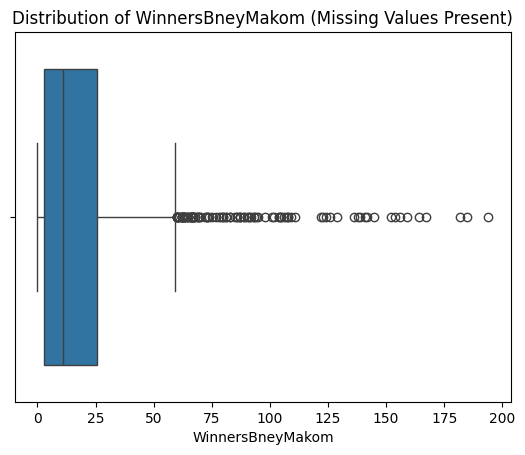

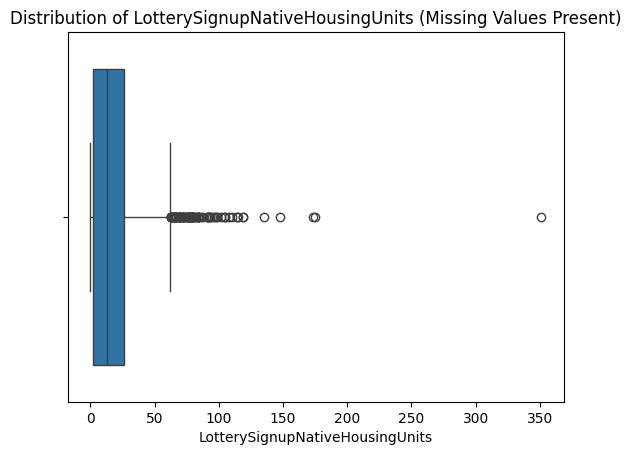

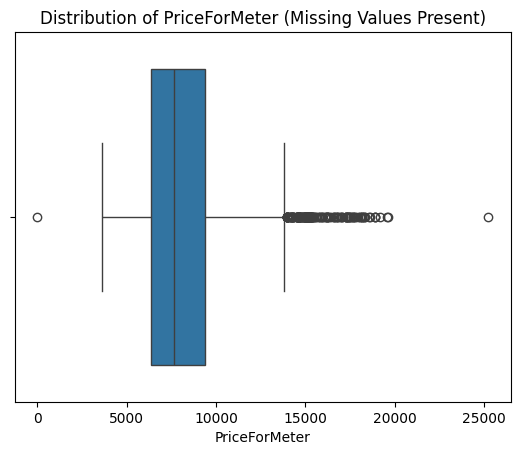

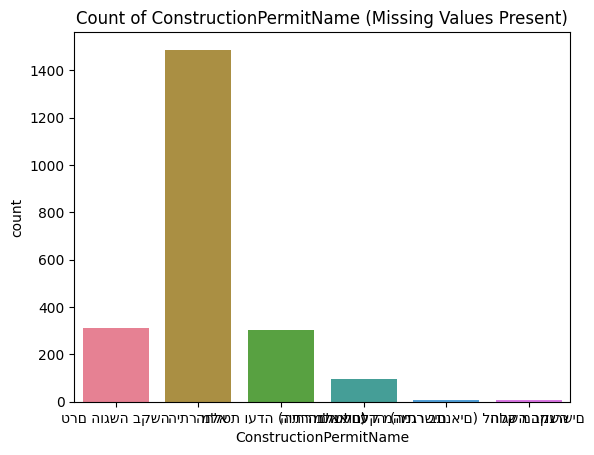

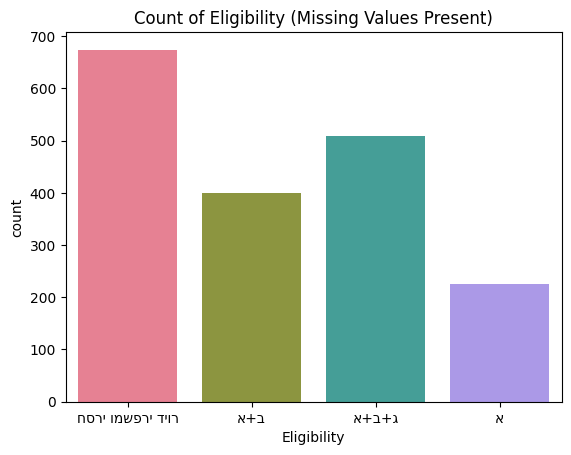

In [66]:
plot_missing(data)

In [67]:
#we can see that for the numeric columns we have many outliers therefore we will fill with the median
#for the categorial columns we will fill with the most frequent value
obj_cols = data.select_dtypes(include='object').columns
for col in obj_cols:
    most_frequent = data[col].mode()[0]
    data[col].fillna(most_frequent, inplace=True)

for i in data.index:
    data['WinnersBneyMakom']=data['WinnersBneyMakom'].fillna(min([data['WinnersBneyMakom'].median(),data.loc[i,'Winners']]))

for i in data.index:
    data['LotterySignupNativeHousingUnits']=data['LotterySignupNativeHousingUnits'].fillna(min([data['LotterySignupNativeHousingUnits'].median(),data.loc[i,'LotterySignupHousingUnits']]))
    
data['PriceForMeter']=data['PriceForMeter'].fillna(data['PriceForMeter'].median())




In [68]:
data[data['WinnersBneyMakom']>data['Winners']]

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
452                    0                 9               0               0   
472                    0                 5               0               0   
473                    0                10               0               0   
691                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
452               9              11.0        9                        0   
472               5              11.0        5                        0   
473              10              11.0       10                        0   
691               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
452                   0                   0  ...            2022-07-25   
472                   0                   0  ...            2022-07-25   
473                   0                   0  ...            2022-07-25   
691                   0                   0  ...            2022-04-26   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
452            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
472            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
473            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
691            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod    CentralizationType  LotteryType  \
452          מחיר למשתכן               21             יולי 2022       ראשונה   
472          מחיר למשתכן               21             יולי 2022       ראשונה   
473          מחיר למשתכן               21             יולי 2022       ראשונה   
691          מחיר למשתכן               21  הגרלה גדולה מרץ 2022       ראשונה   

    LotteryId  
452      2104  
472      2084  
473      2083  
691      1844  

[4 rows x 37 columns]

In [69]:
data[data['LotterySignupNativeHousingUnits']>data['LotterySignupHousingUnits']]

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
83                     0                11               0               0   
328                    0                12               0               0   
452                    0                 9               0               0   
472                    0                 5               0               0   
473                    0                10               0               0   
474                    0                11               0               0   
475                    0                11               0               0   
582                    0                12               0               0   
691                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
83               11              11.0       11                        0   
328              12              11.0       12                        0   
452               9              11.0        9                        0   
472               5              11.0        5                        0   
473              10              11.0       10                        0   
474              11              11.0       11                        0   
475              11              11.0       11                        0   
582              12              11.0       12                        0   
691               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
83                    0                   0  ...            2024-11-11   
328                   0                   0  ...            2023-01-16   
452                   0                   0  ...            2022-07-25   
472                   0                   0  ...            2022-07-25   
473                   0                   0  ...            2022-07-25   
474                   0                   0  ...            2022-07-25   
475                   0                   0  ...            2022-07-25   
582                   0                   0  ...            2022-04-28   
691                   0                   0  ...            2022-04-26   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
83             2024-03-11       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
328            2023-08-01       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
452            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
472            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
473            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
474            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
475            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
582            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   
691            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod         CentralizationType  \
83           מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
328          מחיר למשתכן               23           הגרלת דצמבר 2022   
452          מחיר למשתכן               21                  יולי 2022   
472          מחיר למשתכן               21                  יולי 2022   
473          מחיר למשתכן               21                  יולי 2022   
474          מחיר למשתכן               21                  יולי 2022   
475          מחיר למשתכן               21                  יולי 2022   
582          מחיר למשתכן               21       הגרלה גדולה מרץ 2022   
691          מחיר למשתכן               21       הגרלה גדולה מרץ 2022   

     LotteryType LotteryId  
83        ראשונה      2478  
328       ראשונה      2229  
452       ראשונה      2104  
472       ראשונה      2084  
473       ראשונה      2083  
474       ראשונה      2082

# Handle outliers

firs of all as we can see from the data above there is some impossible rows in the data where for example Winners value isn't the biggest one out of all the winners columns.
lets handle that

In [70]:
rows_not_greater = data[data[['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom']].gt(data['Winners'], axis=0).any(axis=1)]

In [71]:
rows_not_greater

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
452                    0                 9               0               0   
472                    0                 5               0               0   
473                    0                10               0               0   
691                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
452               9              11.0        9                        0   
472               5              11.0        5                        0   
473              10              11.0       10                        0   
691               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
452                   0                   0  ...            2022-07-25   
472                   0                   0  ...            2022-07-25   
473                   0                   0  ...            2022-07-25   
691                   0                   0  ...            2022-04-26   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
452            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
472            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
473            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
691            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod    CentralizationType  LotteryType  \
452          מחיר למשתכן               21             יולי 2022       ראשונה   
472          מחיר למשתכן               21             יולי 2022       ראשונה   
473          מחיר למשתכן               21             יולי 2022       ראשונה   
691          מחיר למשתכן               21  הגרלה גדולה מרץ 2022       ראשונה   

    LotteryId  
452      2104  
472      2084  
473      2083  
691      1844  

[4 rows x 37 columns]

In [72]:
data=data.drop(rows_not_greater.index,axis=0)

In [73]:
data.columns

Index(['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep',
       'MarketingMethodDesc', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId'],
      dtype='object')

In [74]:
rows_not_greater = data[data[['SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom']].gt(data['Subscribers'], axis=0).any(axis=1)]

In [75]:
rows_not_greater

Empty DataFrame
Columns: [WinnersMeshapryDiur, WinnersHasryDiur, WinnersSeriesC, WinnersSeriesB, WinnersSeriesA, WinnersBneyMakom, Winners, SubscribersMeshapryDiur, SubscribersSeriesC, SubscribersSeriesB, SubscribersSeriesA, SubscribersDisabled, SubscribersBenyMakom, Subscribers, LotteryNativeHousingUnits, LotteryHousingUnits, LotterySignupNativeHousingUnits, LotterySignupHousingUnits, PriceForMeter, ConstructionPermitName, ProjectStatus, ProviderName, ProjectName, ProjectId, Neighborhood, LamasName, LamasCode, LotteryExecutionDate, LotteryEndSignupDate, LotteryStatusValue, Eligibility, MarketingRep, MarketingMethodDesc, MarketingMethod, CentralizationType, LotteryType, LotteryId]
Index: []

[0 rows x 37 columns]

In [80]:
rows_not_greater = data[data[['LotteryNativeHousingUnits']].gt(data['LotteryHousingUnits'], axis=0).any(axis=1)]

In [81]:
rows_not_greater[['LotteryHousingUnits','LotteryNativeHousingUnits']]

Empty DataFrame
Columns: [LotteryHousingUnits, LotteryNativeHousingUnits]
Index: []

In [78]:
data=data.drop(rows_not_greater[['LotteryHousingUnits','LotteryNativeHousingUnits']].index,axis=0)

In [40]:
rows_not_greater = data[data[['LotterySignupNativeHousingUnits']].gt(data['LotterySignupHousingUnits'], axis=0).any(axis=1)]

In [82]:
rows_not_greater[['LotterySignupNativeHousingUnits','LotterySignupHousingUnits']]

Empty DataFrame
Columns: [LotterySignupNativeHousingUnits, LotterySignupHousingUnits]
Index: []

In [83]:
data.columns

Index(['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep',
       'MarketingMethodDesc', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId'],
      dtype='object')

In [84]:
data=data.drop(rows_not_greater.index,axis=0)

In [86]:
#lets see the distributions of our columns to detect outliers
def plot_everything(data):
    num_cols = data.select_dtypes(include=np.number).columns.tolist()
    obj_cols = data.select_dtypes(include=object).columns.tolist()
    

    for label in num_cols:
        sns.boxplot(data=data, x=label)
        plt.title(f"Distribution of {label}")
        plt.show()
        
    for label in num_cols:
        sns.histplot(data=data, x=label)
        plt.title(f"Distribution of {label}")
        plt.show()

    for label in obj_cols:
        # מספר הקטגוריות בנתונים
        num_categories = data[label].nunique()
        if num_categories<=10:
            # יצירת פלטת צבעים דינמית בהתאמה למספר הקטגוריות
            custom_colors = sns.color_palette("husl", num_categories)  # "husl" נותן צבעים מגוונים
            sns.countplot(data=data, x=label, palette=custom_colors)
            plt.title(f"Count of {label}")
            plt.show()
    

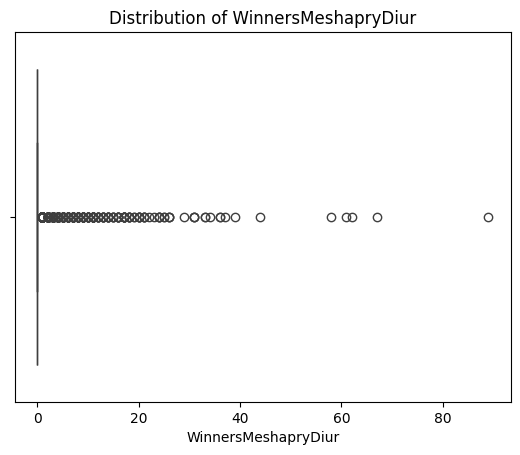

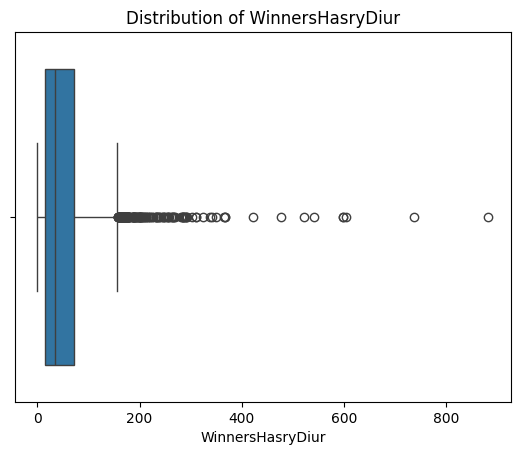

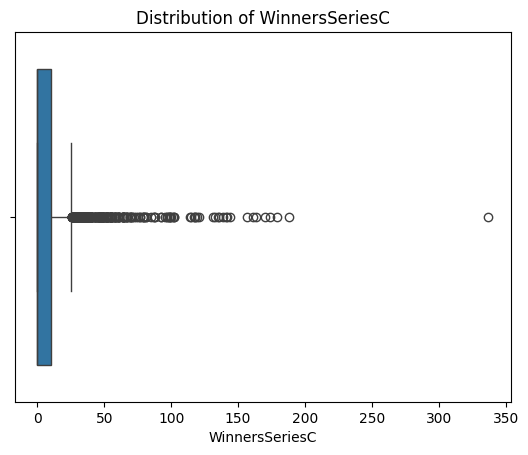

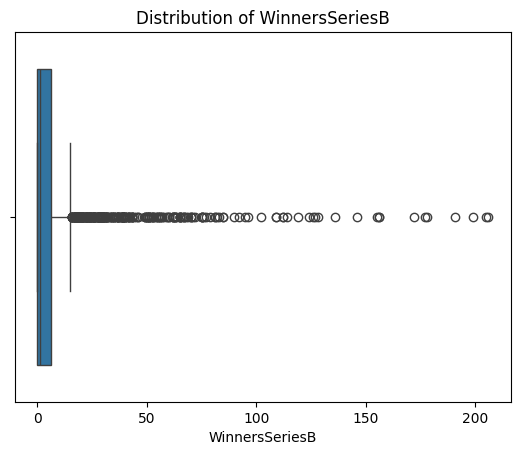

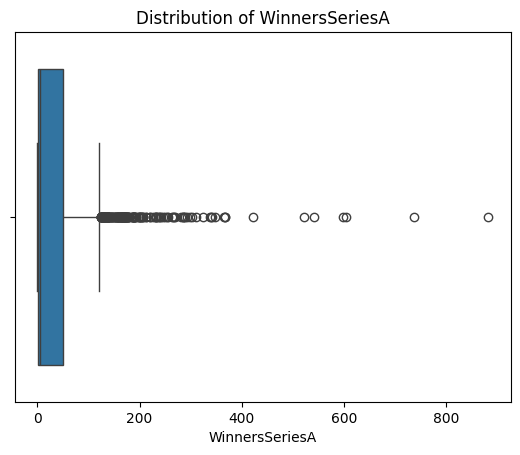

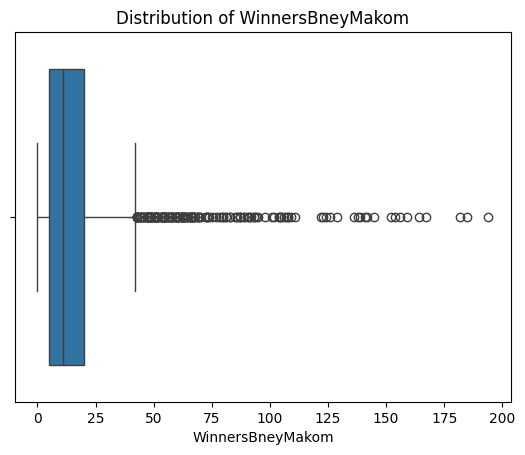

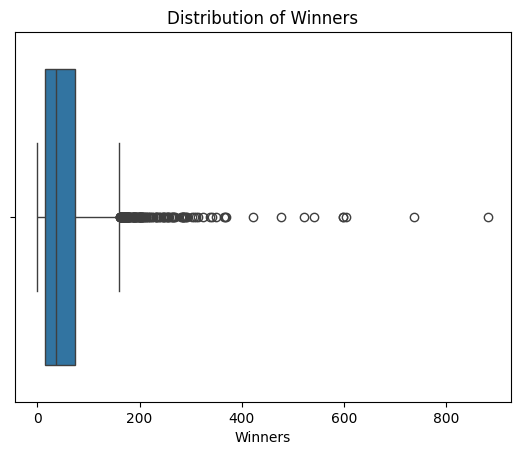

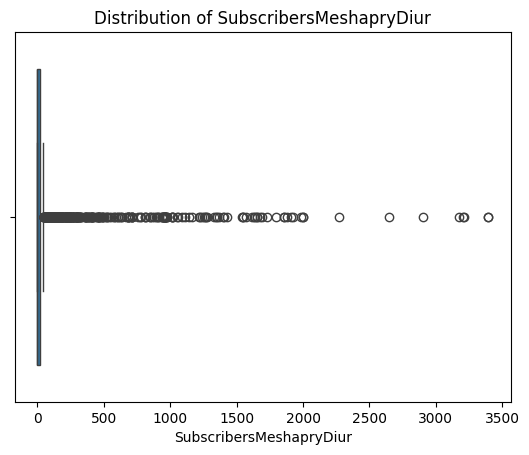

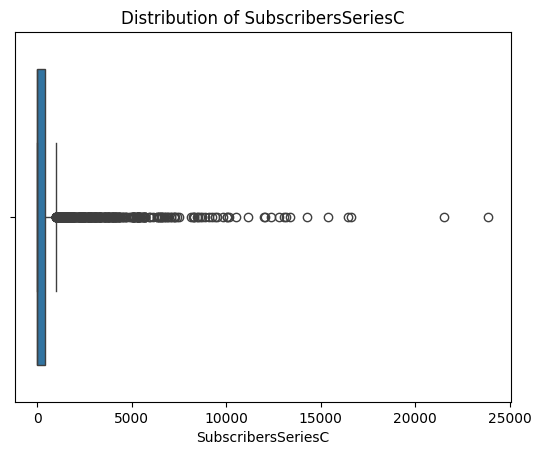

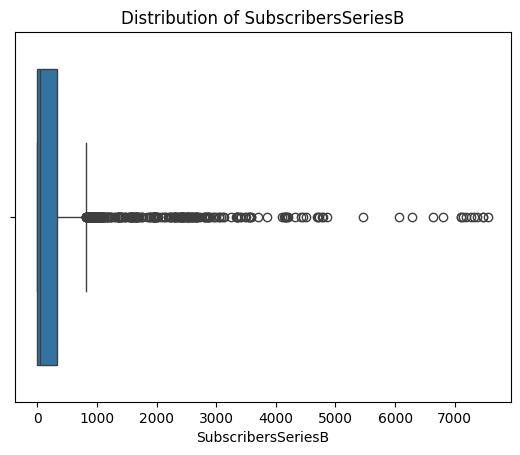

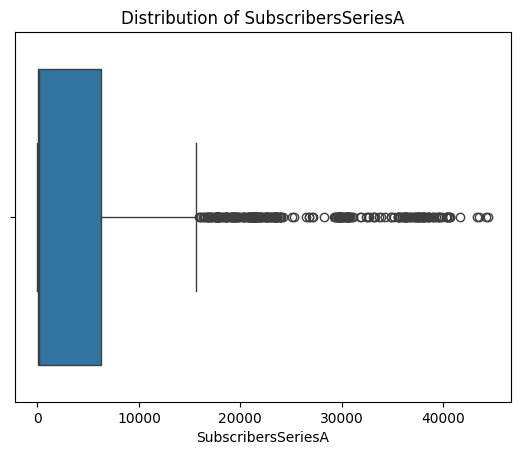

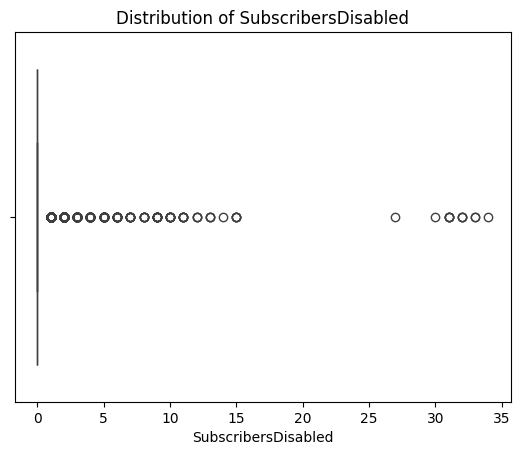

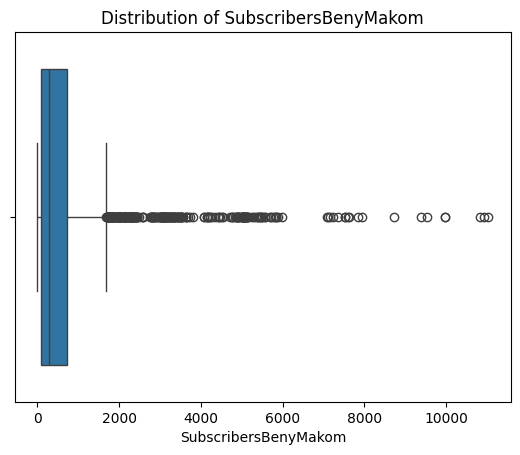

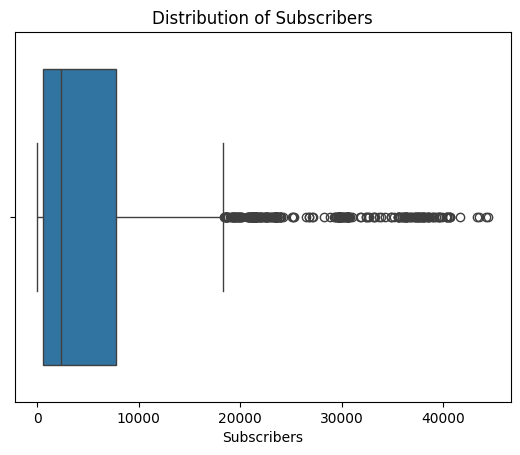

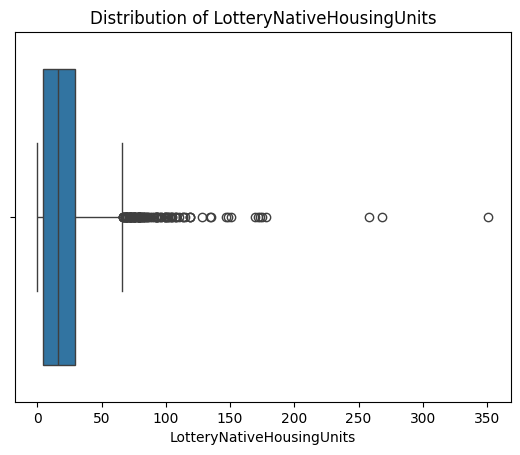

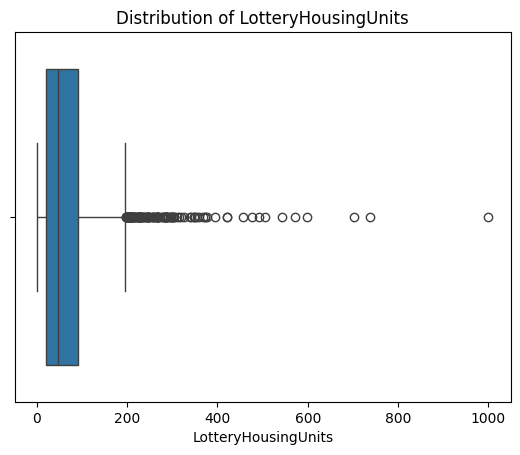

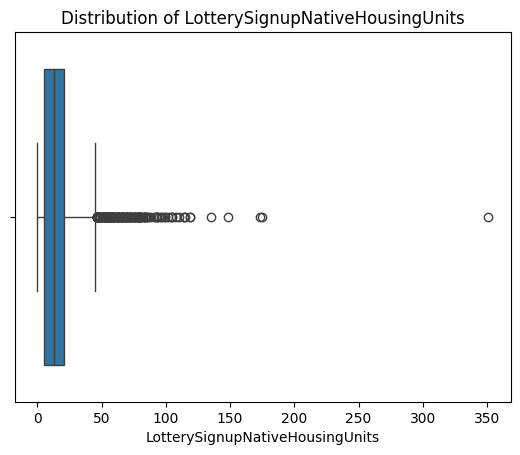

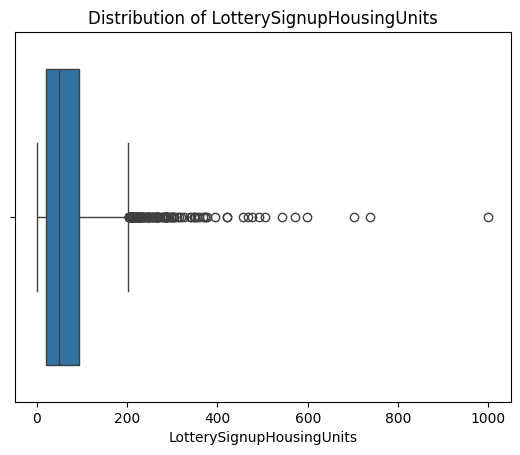

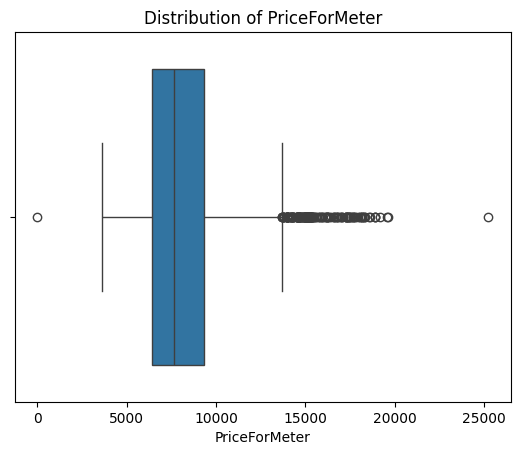

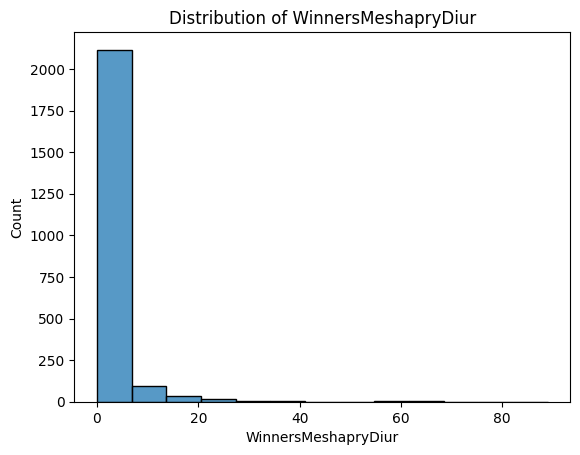

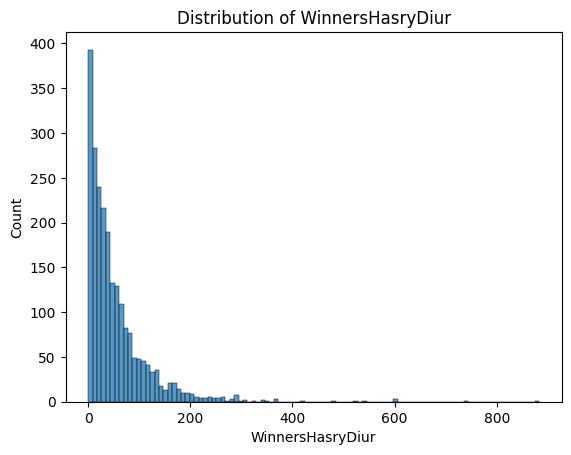

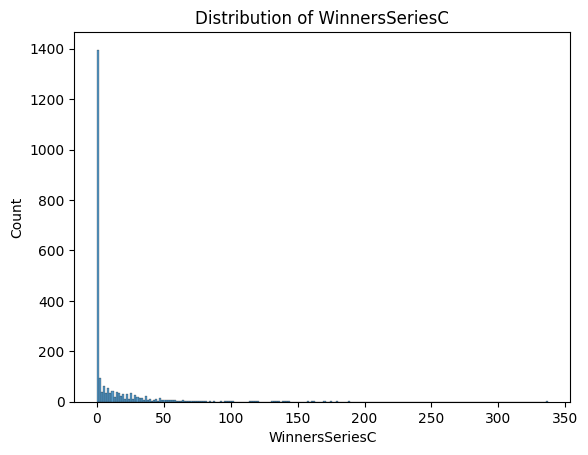

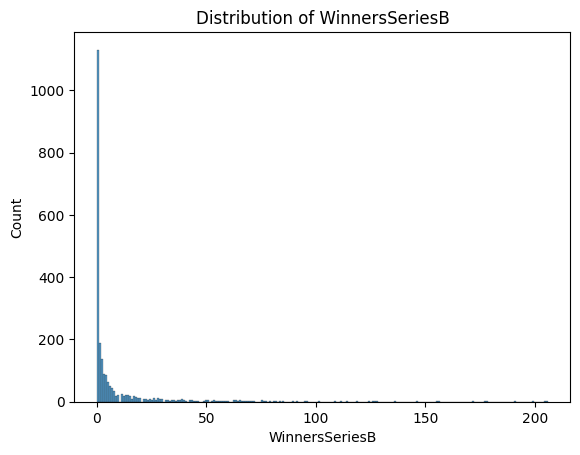

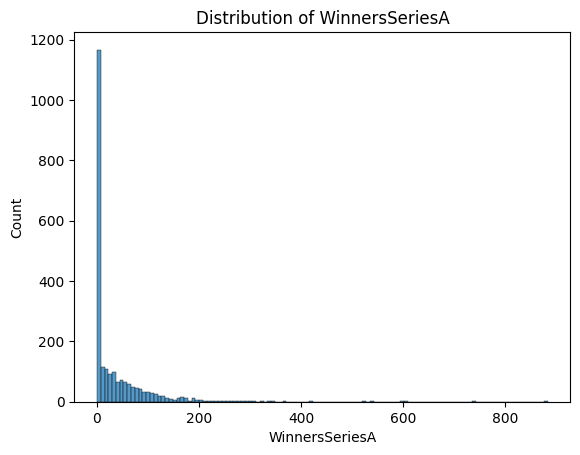

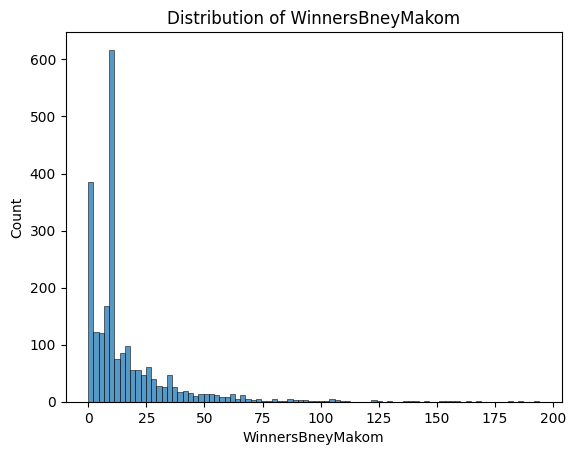

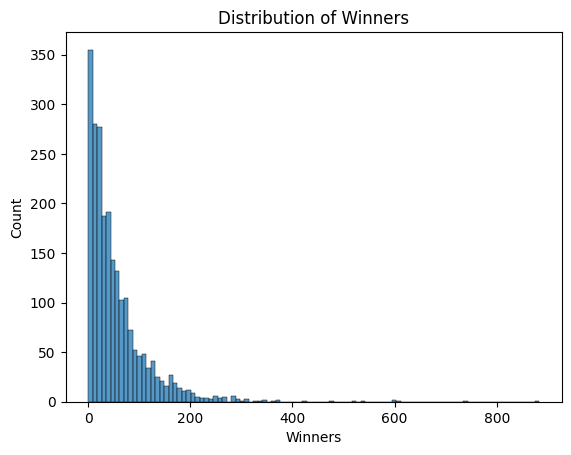

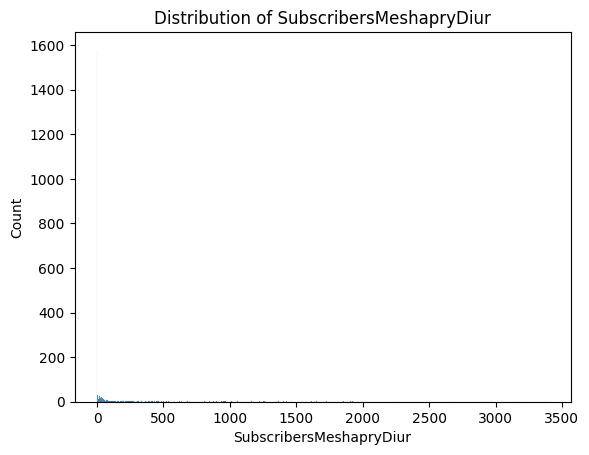

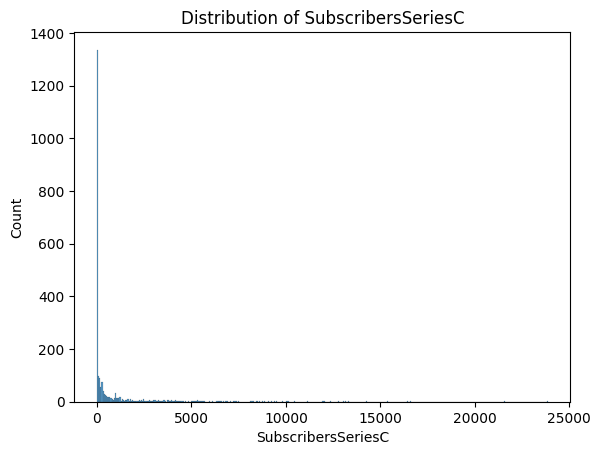

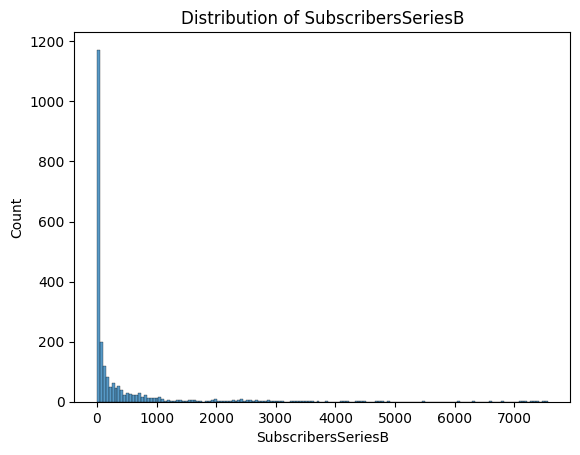

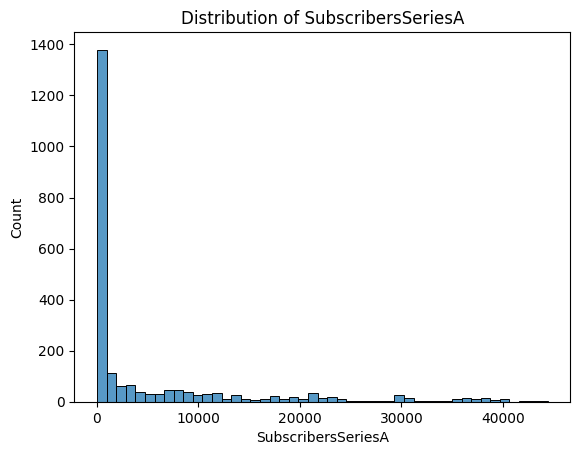

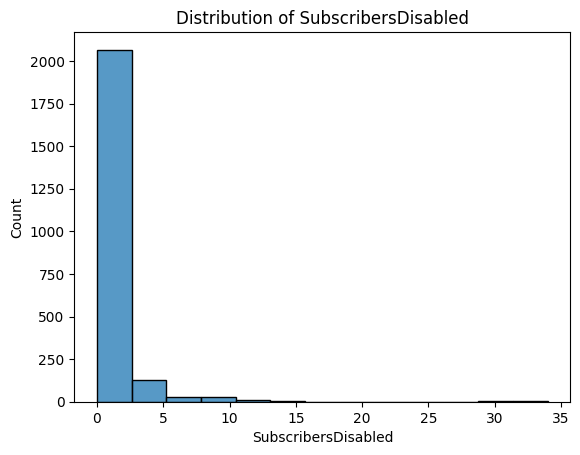

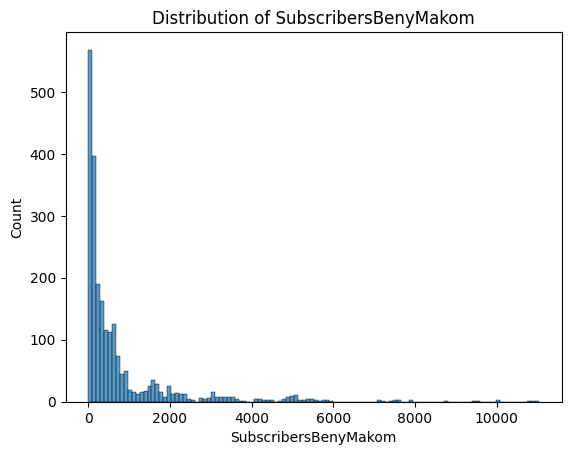

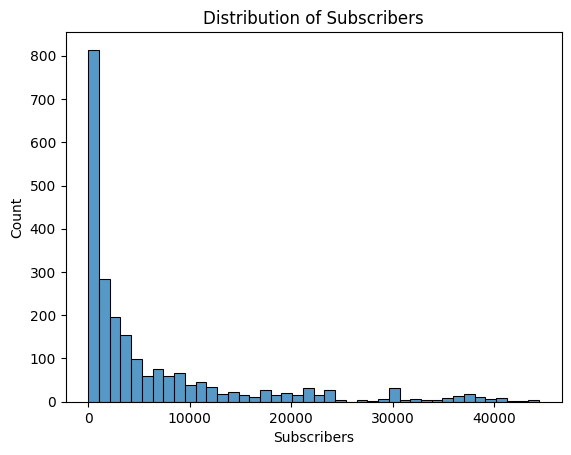

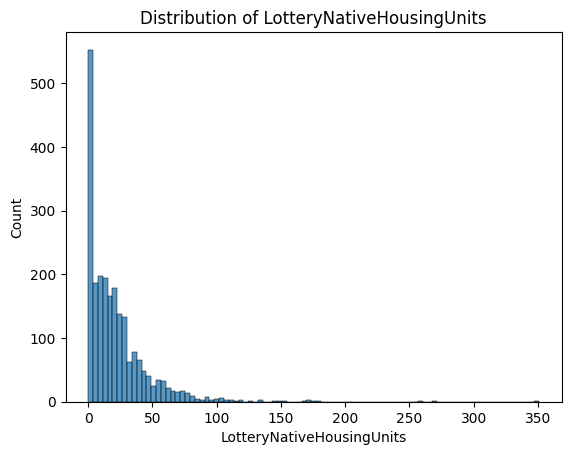

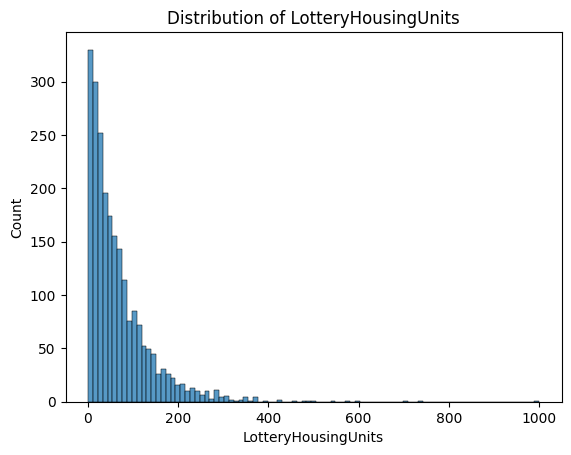

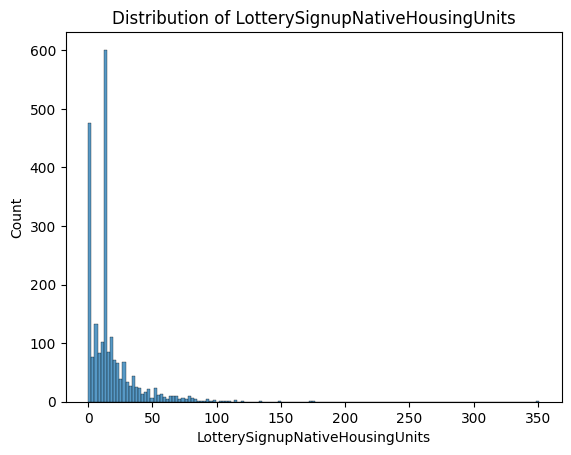

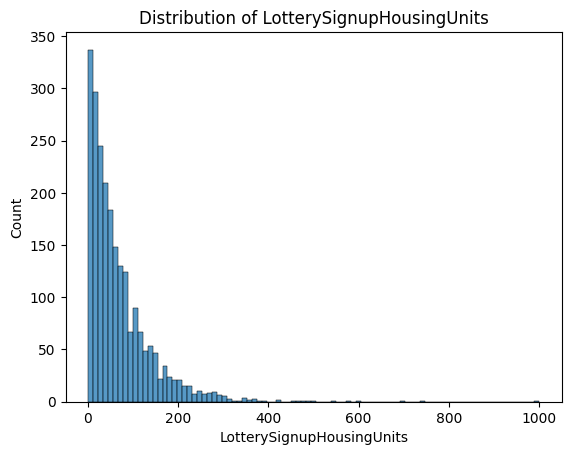

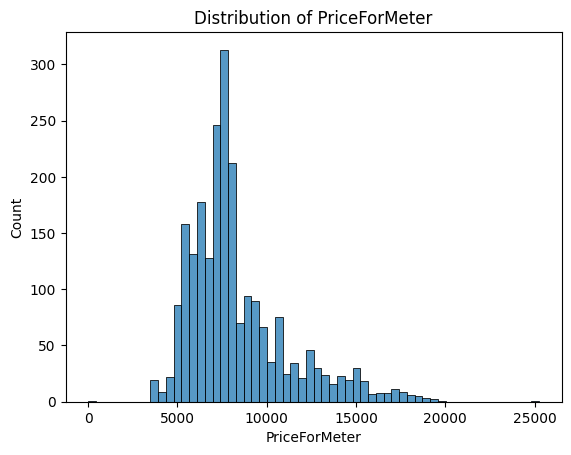

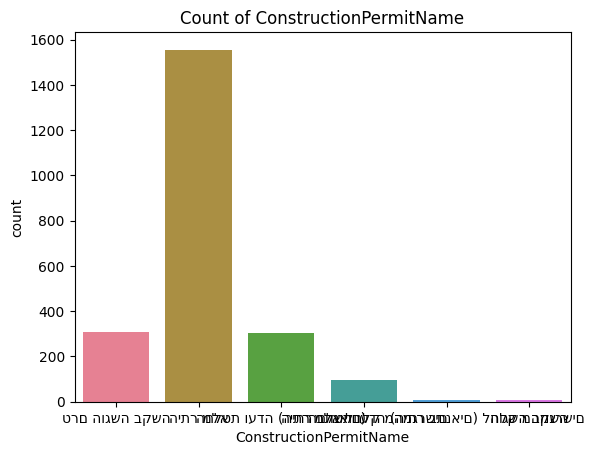

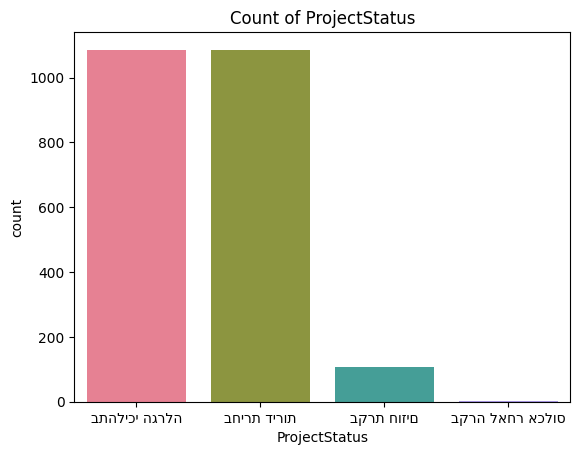

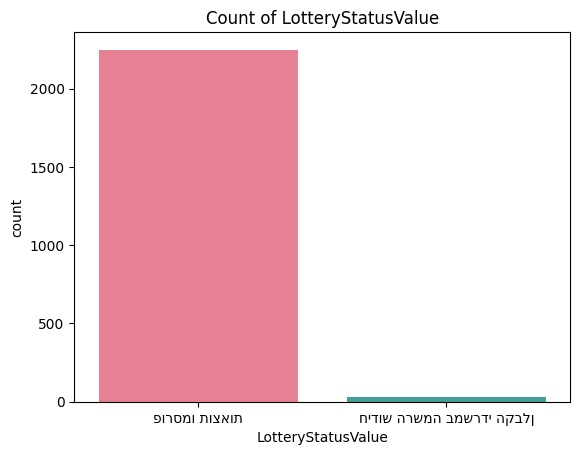

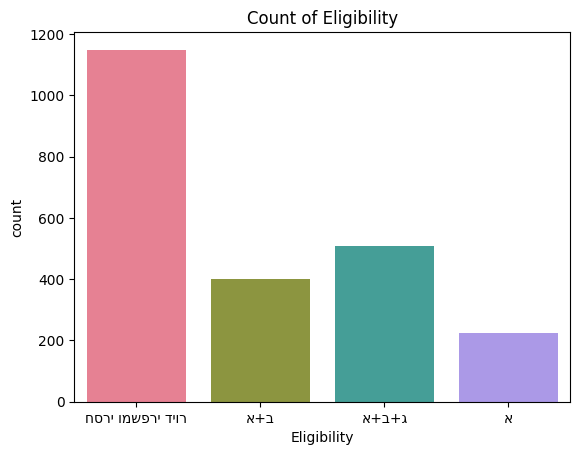

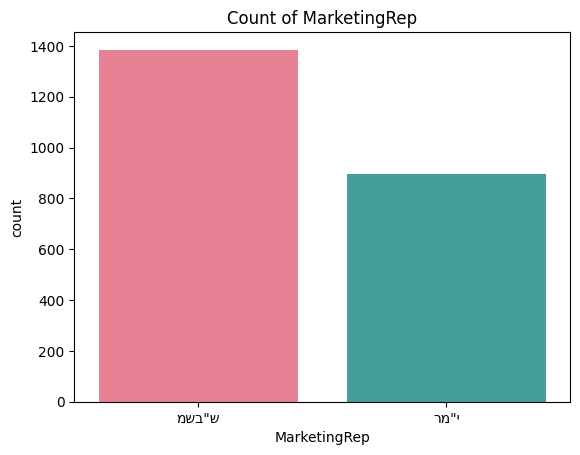

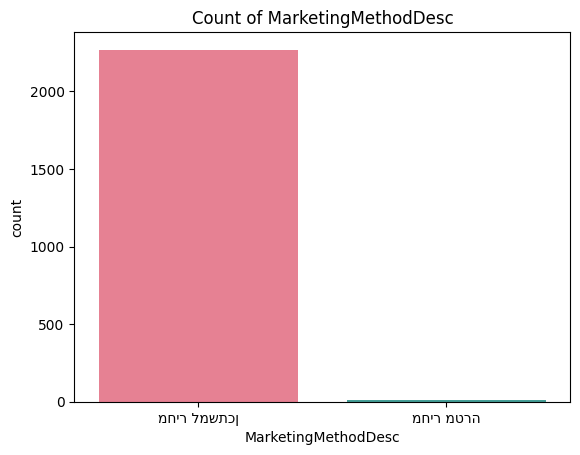

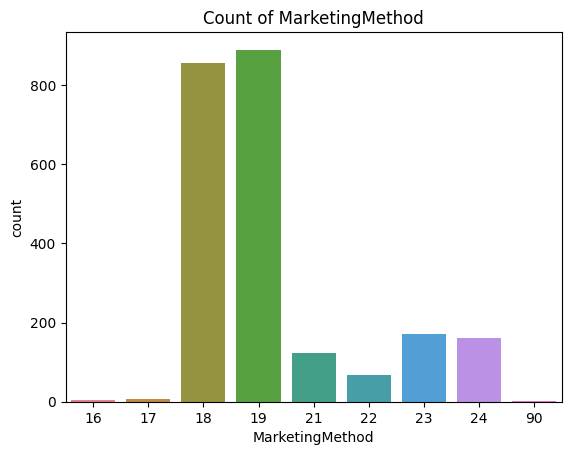

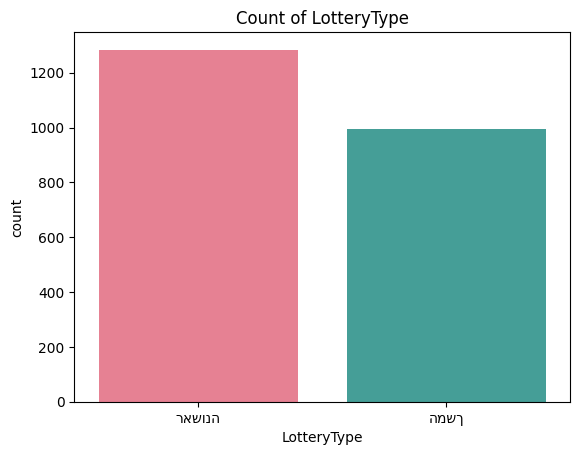

In [87]:
plot_everything(data)

In [88]:
num_cols=data.select_dtypes(include=[np.number]).columns

## detecting general outliers based 3 different models (Isolation Forest, OneClassSVM, LOF). and plotting the outliers only if all of the models detected them as outliers

In [98]:
def process_and_identify_outliers(data, contamination=0.06):
    # Step 1: Fill missing values with median for numeric and mode for categorical
    def fill_missing_values(df):
        for col in df.columns:
            if df[col].dtype in ['int64', 'float64']:  # Numeric column
                df[col].fillna(df[col].median(), inplace=True)
            else:  # Categorical column
                df[col].fillna(df[col].mode()[0], inplace=True)
        return df
    
    data = fill_missing_values(data)
    
    # Step 2: Convert datetime columns to categorical (object)
    def convert_datetime_columns(df):
        for col in df.select_dtypes(include=['datetime64[ns]']).columns:
            df[col] = df[col].astype('object')  # Convert datetime columns to categorical
        return df

    data = convert_datetime_columns(data)
    
    # Step 3: Separate numeric and categorical columns
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    
    # Save original data for later
    original_data = data.copy()  # Save original data
    
    # Step 4: Apply get_dummies to categorical columns to convert to one-hot encoding
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
    
    # Step 5: Normalize the numeric data
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])  # Normalize numeric columns
    
    # Step 6: Apply PCA to reduce dimensionality to 2 components
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(data[numeric_cols])
    
    # Step 7: Apply outlier detection models
    outliers_if = IsolationForest(contamination=contamination)
    outliers_svm = OneClassSVM(nu=1 - contamination)
    outliers_lof = LocalOutlierFactor(n_neighbors=10, contamination=contamination)
    
    # Predict outliers
    outliers_if_pred = outliers_if.fit_predict(data[num_cols]) == -1
    outliers_svm_pred = outliers_svm.fit_predict(data[num_cols]) == -1
    outliers_lof_pred = outliers_lof.fit_predict(data[num_cols]) == -1
    
    # Combine outlier predictions using AND (only mark as outliers if they are detected by all models)
    combined_outliers = outliers_if_pred & outliers_svm_pred & outliers_lof_pred
    
    # Step 8: Plot the PCA components and highlight the outliers
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_components[:, 0], pca_components[:, 1], c=combined_outliers, cmap='coolwarm', edgecolors='k', s=60)
    plt.title("PCA Plot with Outliers Highlighted")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Outlier Status")
    plt.show()
    
    # Return the indices of the outliers
    outlier_indices = data.index[combined_outliers].tolist()

    # Step 9: Return the original data (non-normalized) with original columns
    # Reverse normalization and get the original data
    data[numeric_cols] = scaler.inverse_transform(data[numeric_cols])  # Return normalized columns to original
    data = original_data  # Restore the data to its original form, non-normalized

    return outlier_indices, data




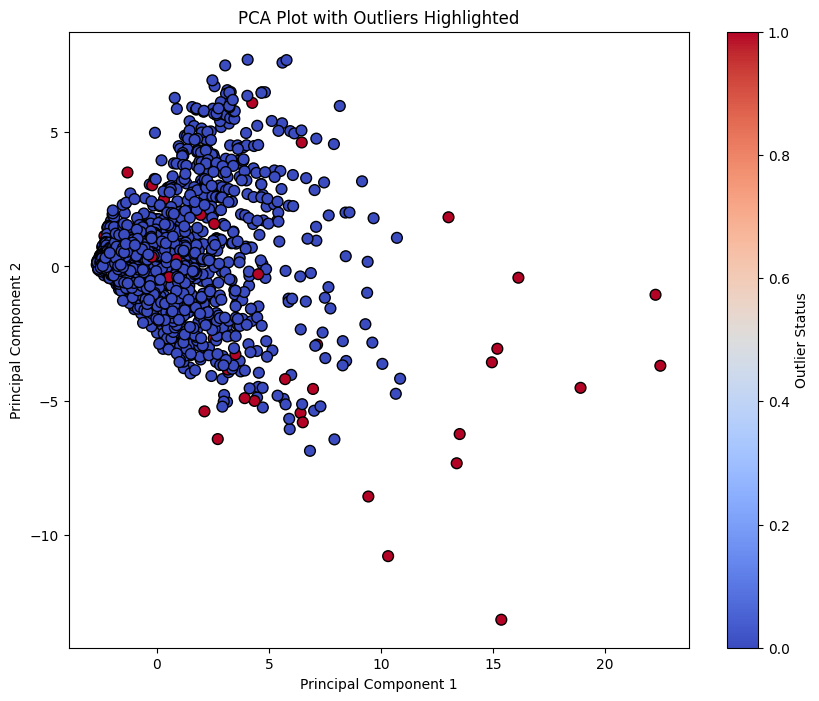

In [99]:
outliers_indexes,no_outliers=process_and_identify_outliers(data)

#### Creating a new dataframe without the outliers

In [100]:
no_outliers=data.drop(outliers_indexes)

In [101]:
num_cols=no_outliers.select_dtypes(include=np.number).columns

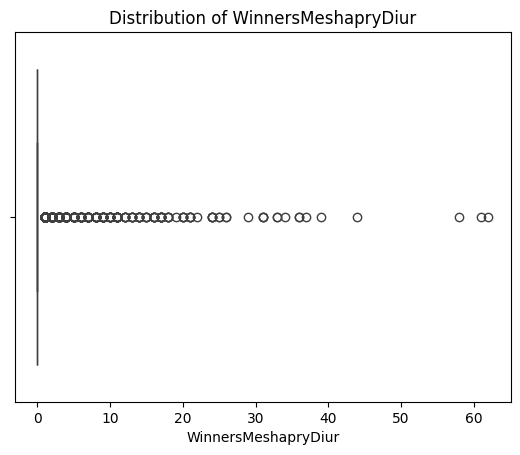

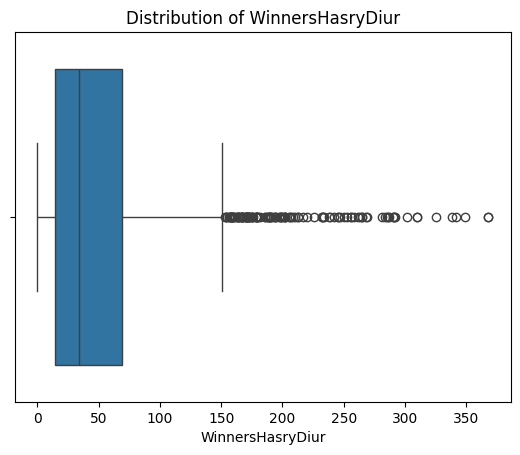

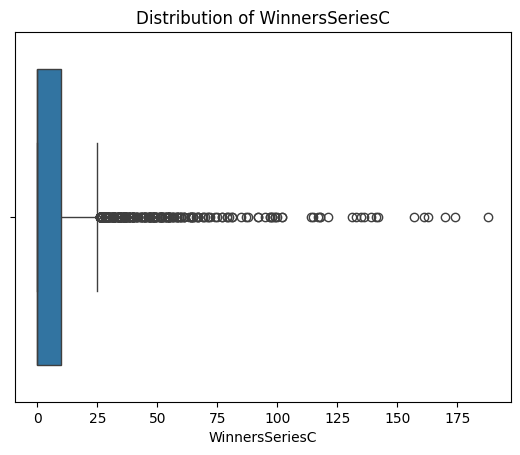

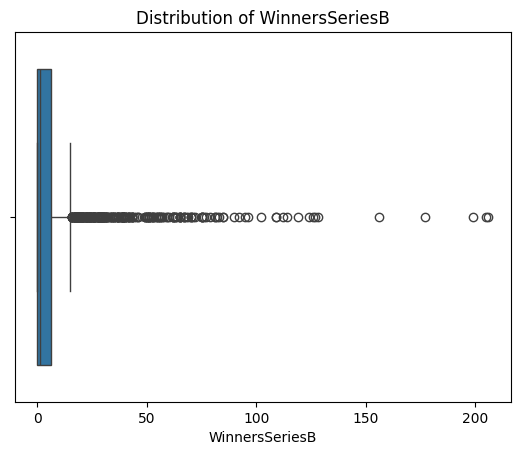

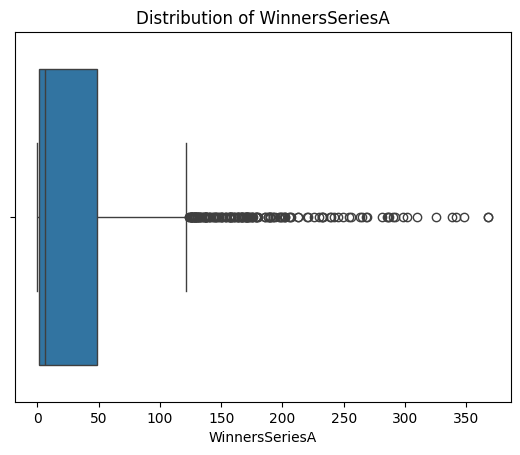

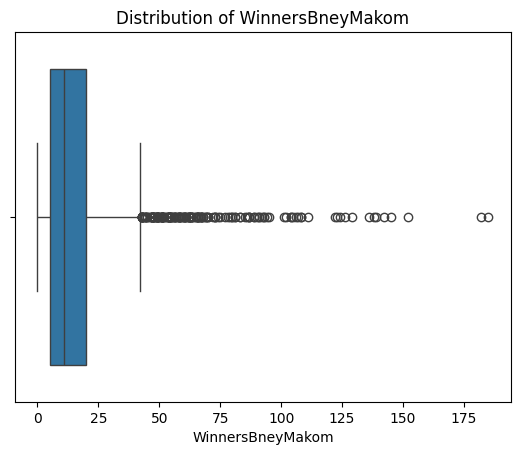

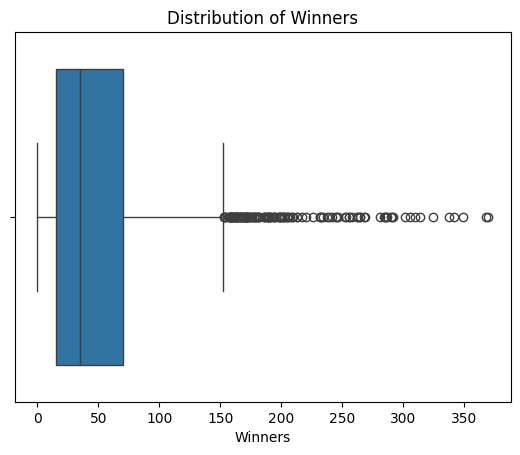

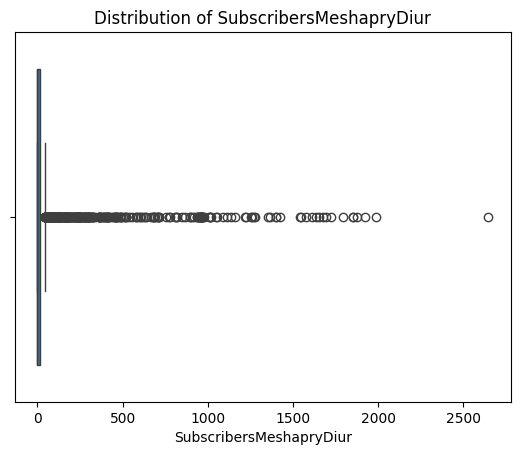

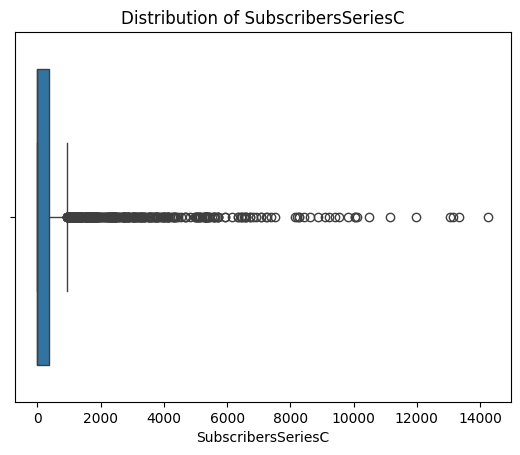

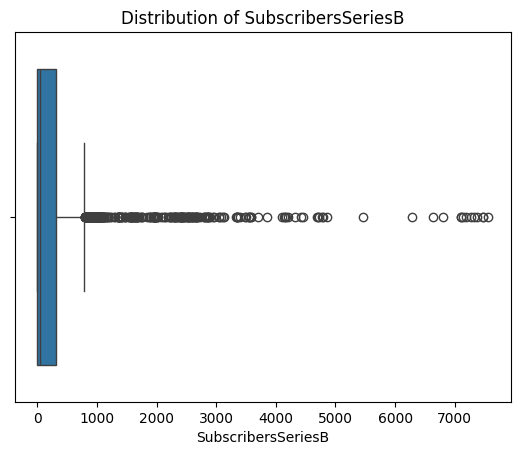

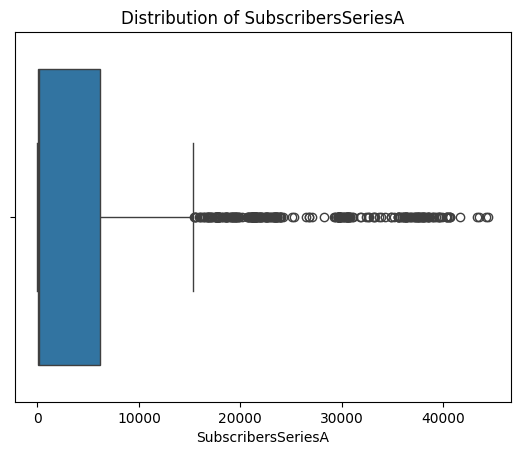

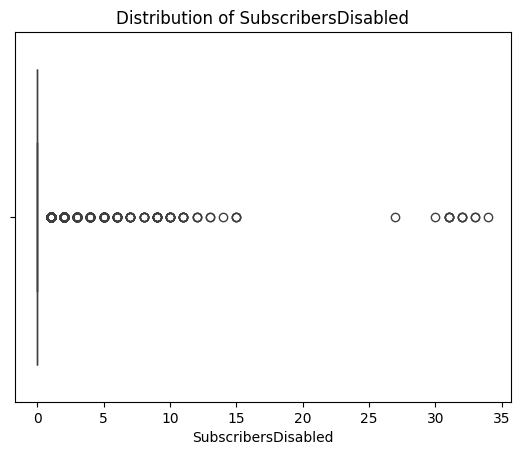

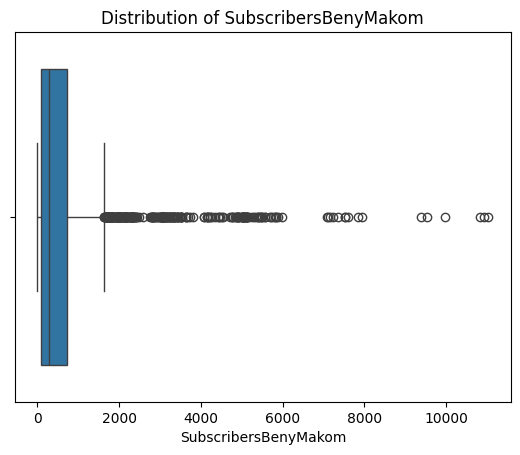

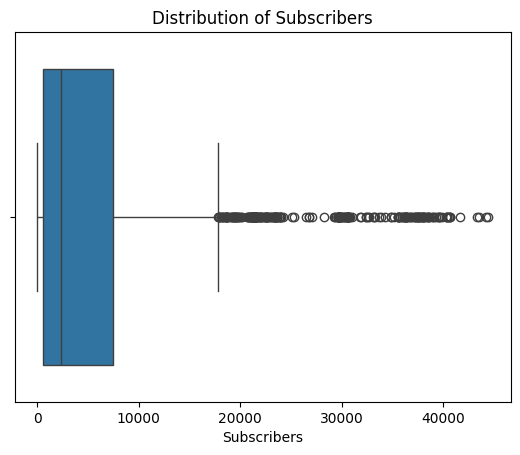

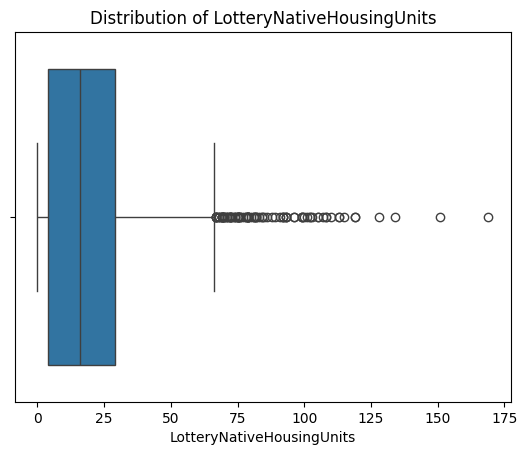

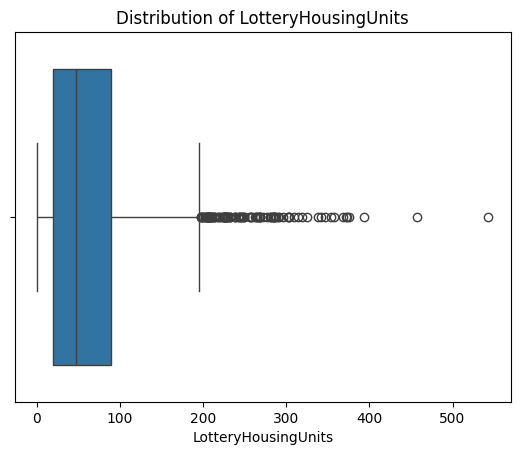

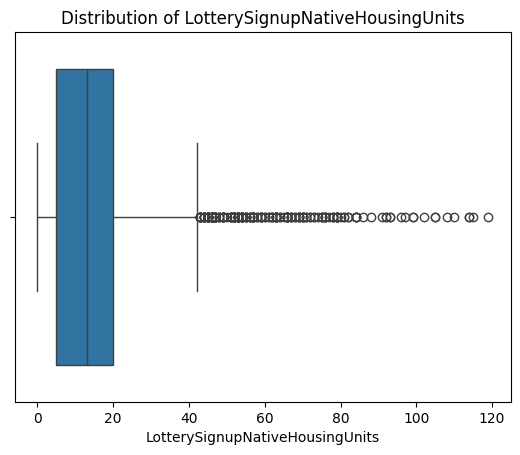

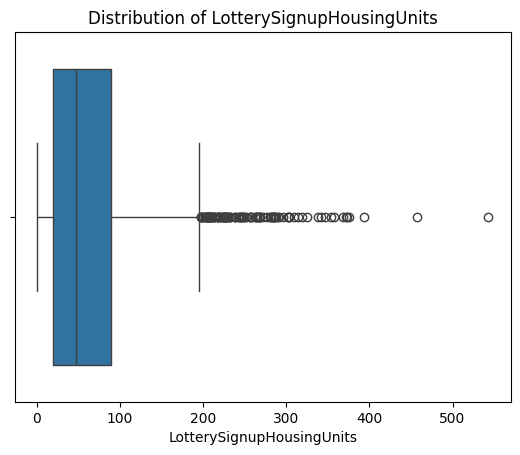

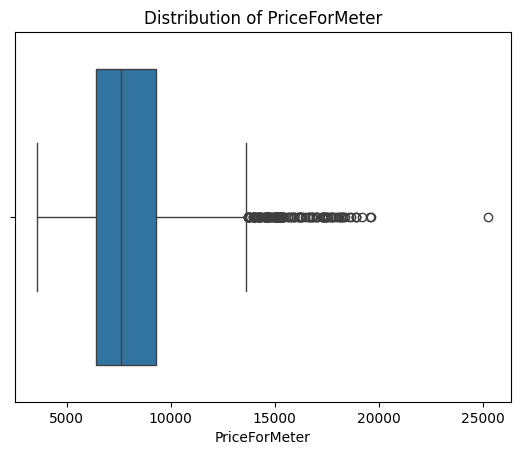

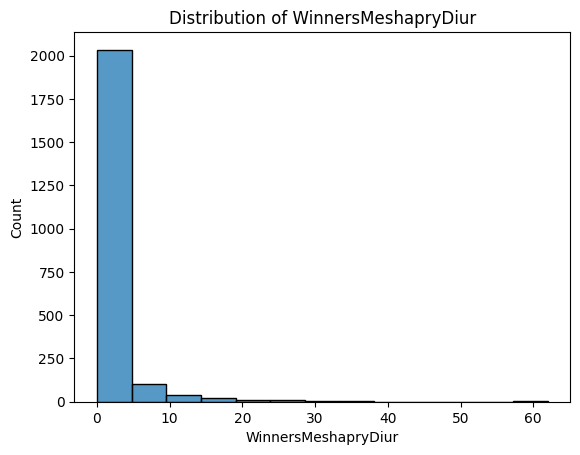

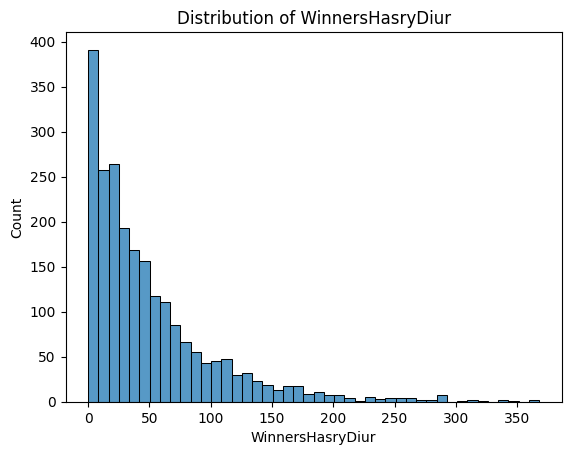

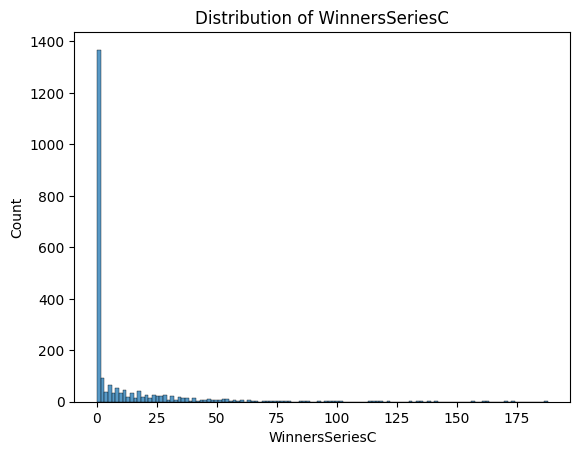

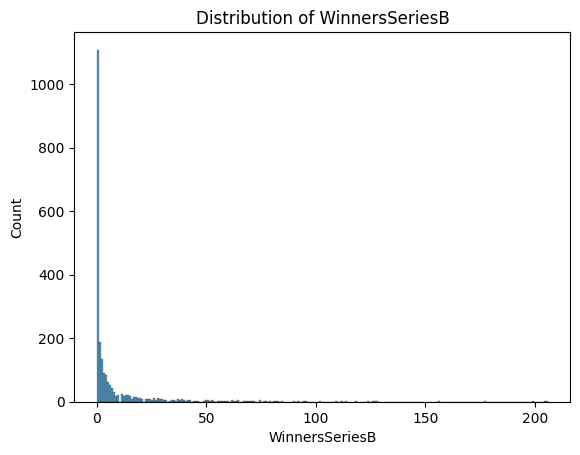

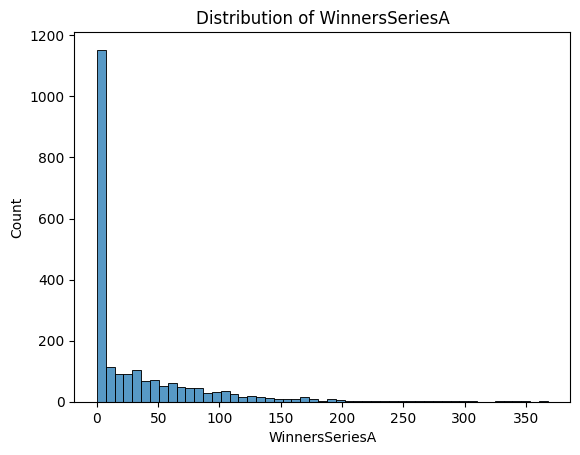

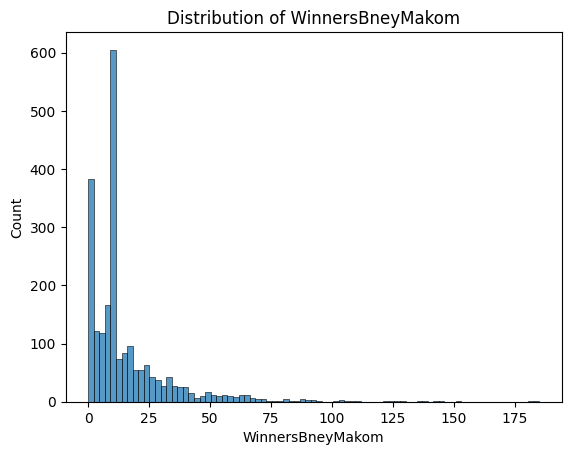

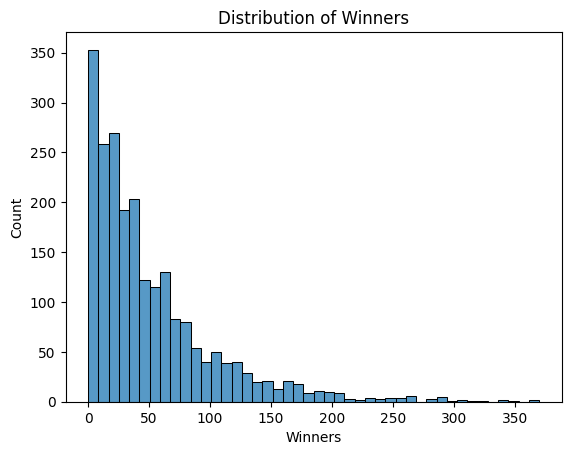

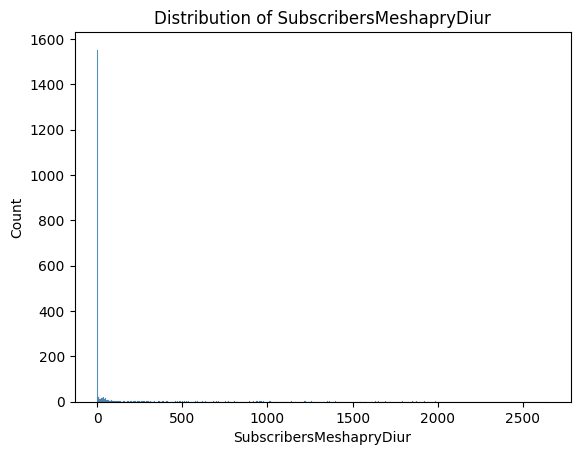

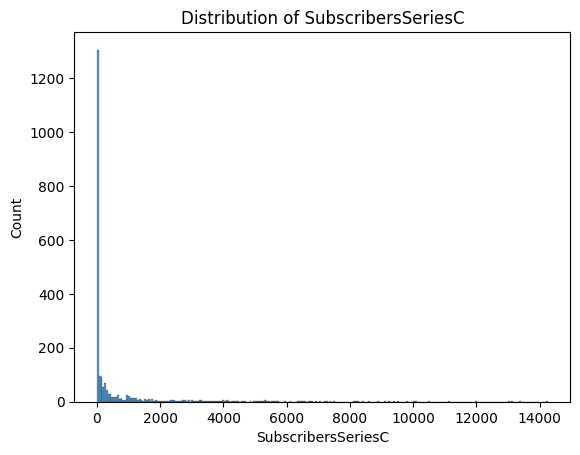

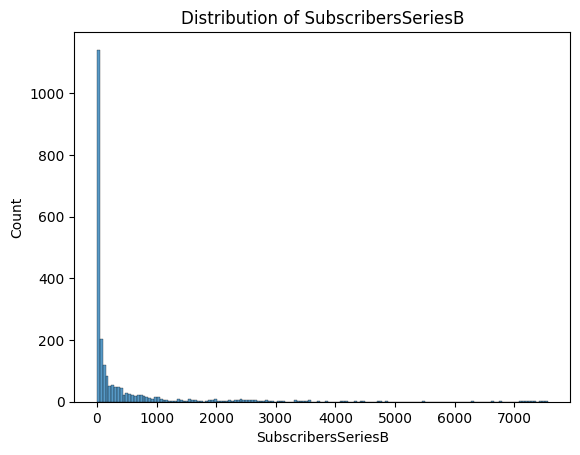

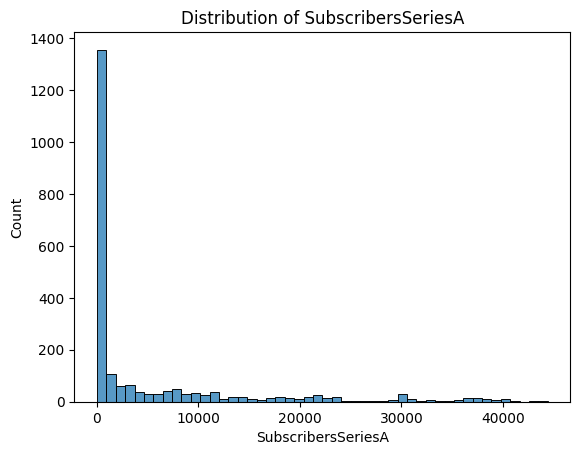

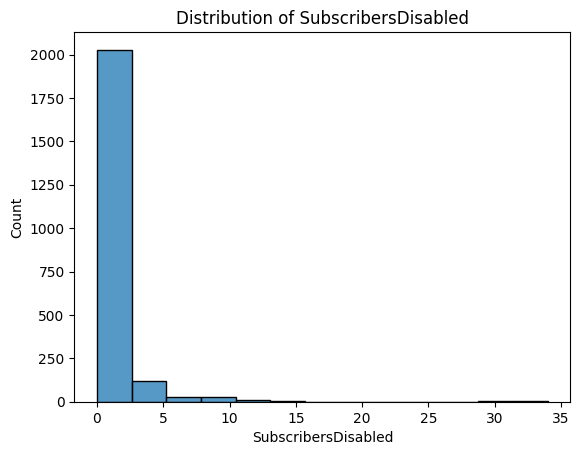

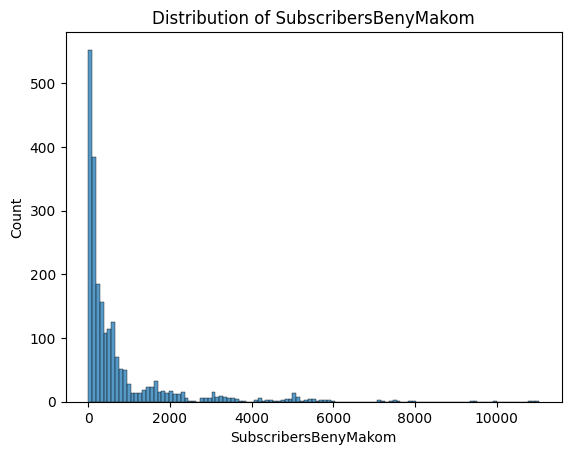

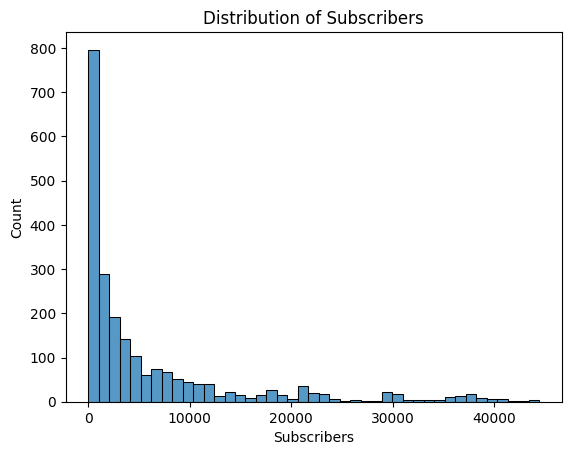

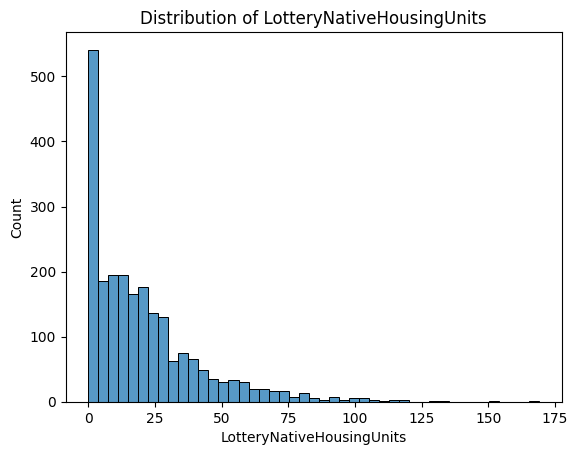

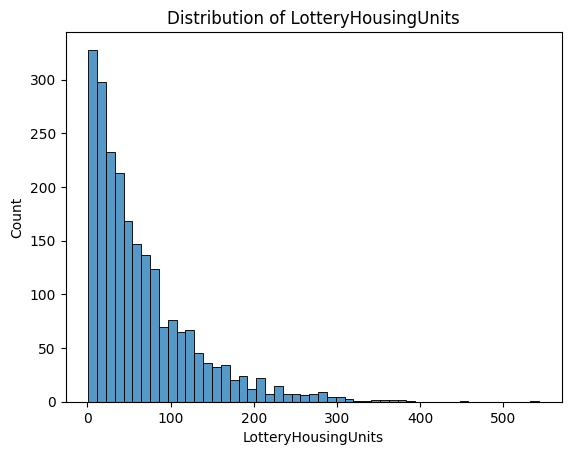

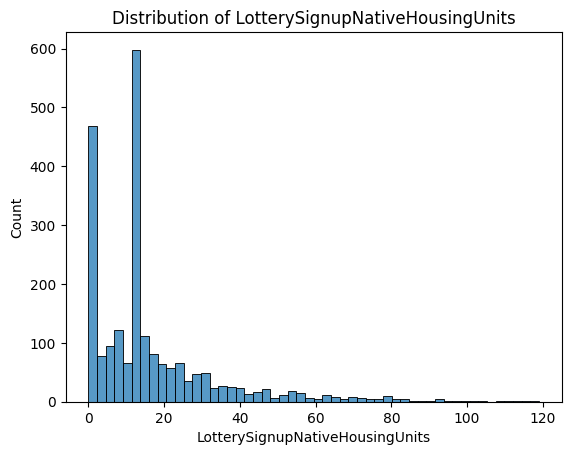

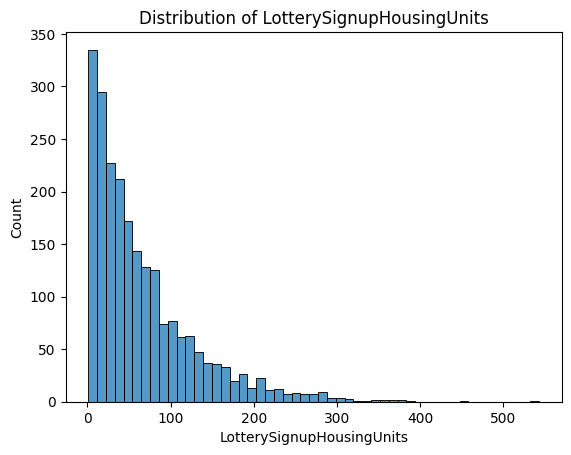

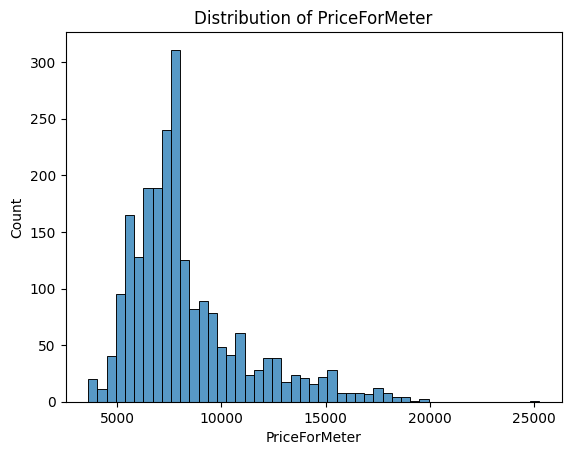

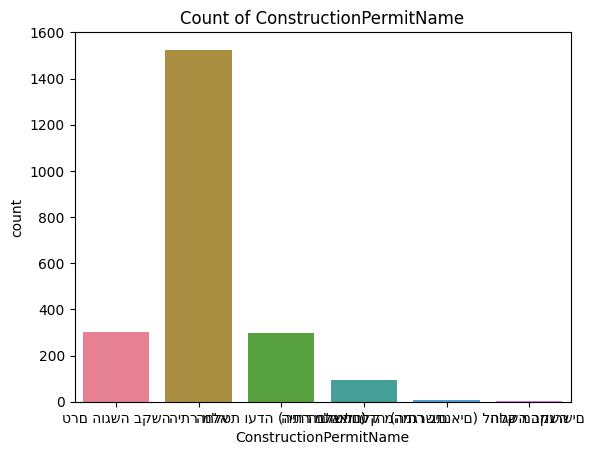

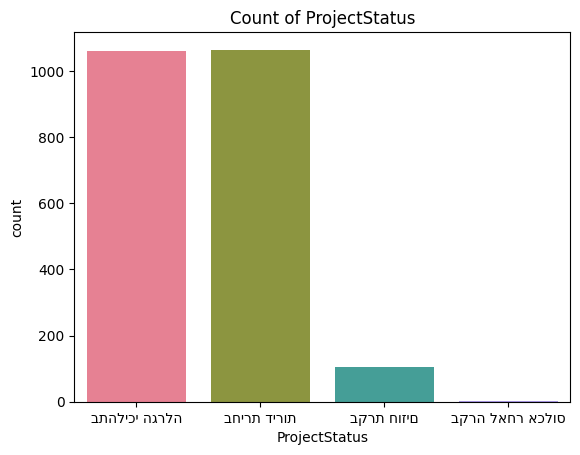

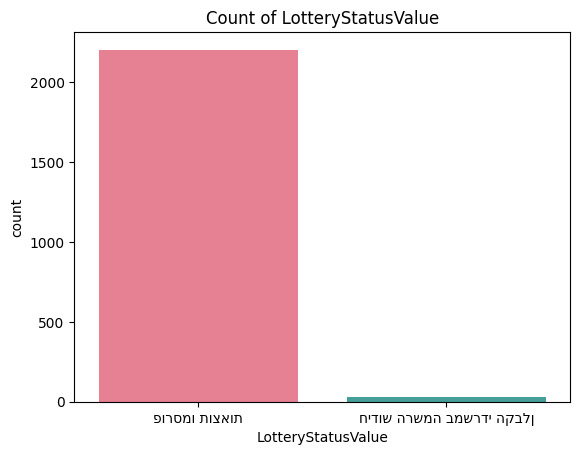

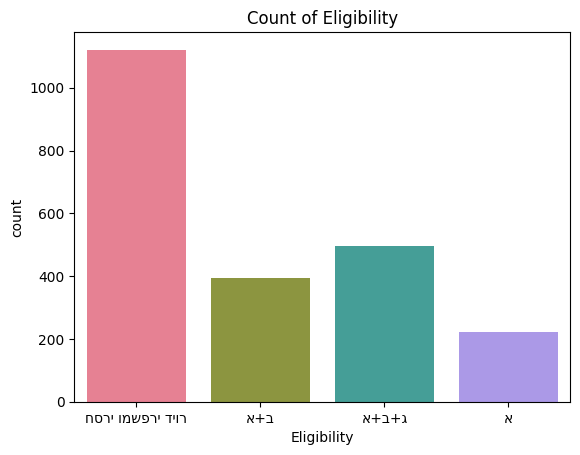

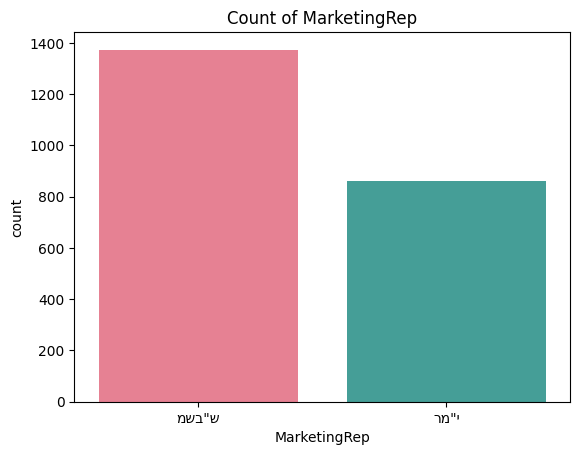

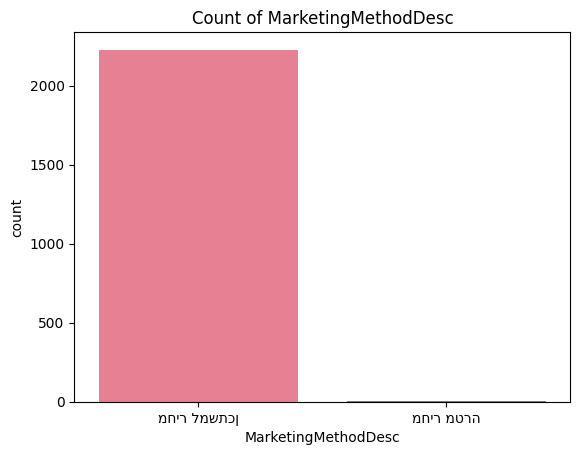

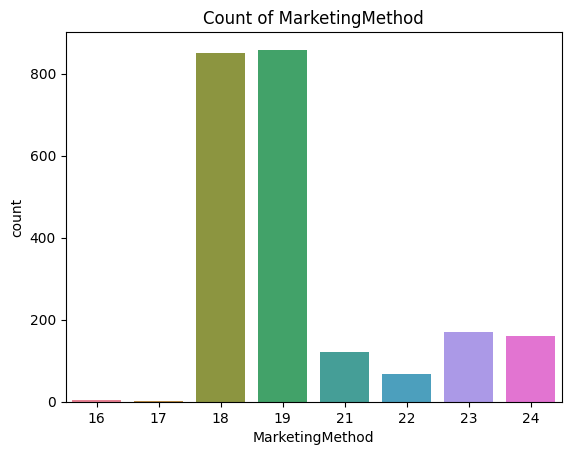

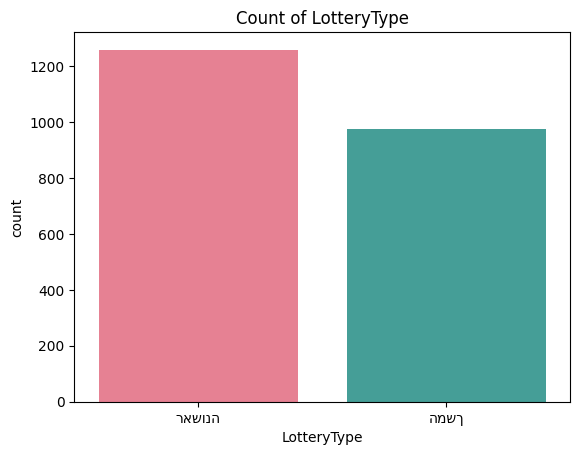

In [102]:
plot_everything(no_outliers)

### Dropping big outliers in each column with Isolation Forest 

In [103]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

def remove_extreme_outliers(data, contamination=0.001):
    """
    Detect and remove extreme outliers using Isolation Forest.
    Only removes outliers that are very different from the rest of the column.
    :param data: DataFrame with numeric columns
    :param contamination: Fraction of outliers in the data
    :return: DataFrame with outliers removed
    """
    clean_data = data.copy()
    original_data = clean_data.copy()  # שמור עותק של הנתונים המקוריים
    outliers_removed = {col: 0 for col in clean_data.select_dtypes(include=[np.number]).columns}

    # Iterate through all numeric columns
    for col in clean_data.select_dtypes(include=[np.number]).columns:
        column_data = clean_data[col].dropna()  # Drop NA values
        
        # Check if the column contains numeric data
        if not pd.api.types.is_numeric_dtype(column_data):
            print(f"Column '{col}' contains non-numeric values. Skipping...")
            continue

        # Use Isolation Forest to detect extreme outliers
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        outliers_iforest = iso_forest.fit_predict(column_data.values.reshape(-1, 1)) == -1
        outlier_count = np.sum(outliers_iforest)
        outliers_removed[col] += outlier_count
        clean_data = clean_data.loc[~outliers_iforest, :]  # Remove extreme outliers
        print(f"Column '{col}' extreme outliers removed using Isolation Forest: {outlier_count} removed.")

    # החזרת הערכים המקוריים לעמודות
    clean_data = original_data.loc[clean_data.index]  # החזרת הנתונים המקוריים

    # Return the cleaned data and the outliers removed information
    return clean_data, outliers_removed



In [104]:
# הדאטה שלך
cleaned_data, outliers_info = remove_extreme_outliers(no_outliers[num_cols], contamination=0.01)
print(f"Outliers removed: {outliers_info}")


Column 'WinnersMeshapryDiur' extreme outliers removed using Isolation Forest: 23 removed.
Column 'WinnersHasryDiur' extreme outliers removed using Isolation Forest: 23 removed.
Column 'WinnersSeriesC' extreme outliers removed using Isolation Forest: 22 removed.
Column 'WinnersSeriesB' extreme outliers removed using Isolation Forest: 21 removed.
Column 'WinnersSeriesA' extreme outliers removed using Isolation Forest: 22 removed.
Column 'WinnersBneyMakom' extreme outliers removed using Isolation Forest: 22 removed.
Column 'Winners' extreme outliers removed using Isolation Forest: 21 removed.
Column 'SubscribersMeshapryDiur' extreme outliers removed using Isolation Forest: 21 removed.
Column 'SubscribersSeriesC' extreme outliers removed using Isolation Forest: 21 removed.
Column 'SubscribersSeriesB' extreme outliers removed using Isolation Forest: 21 removed.
Column 'SubscribersSeriesA' extreme outliers removed using Isolation Forest: 20 removed.
Column 'SubscribersDisabled' extreme outli

In [105]:
len(cleaned_data)

1844

In [106]:
cleaned_data.columns

Index(['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter'],
      dtype='object')

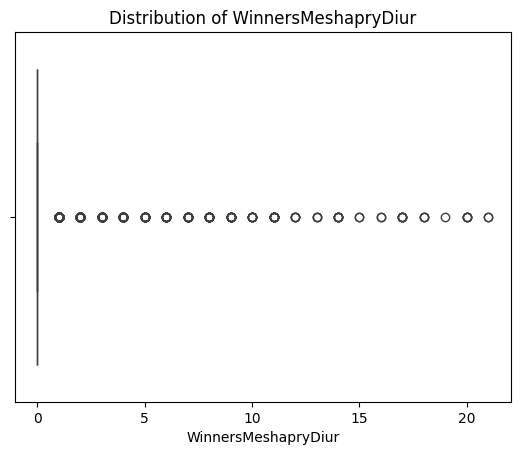

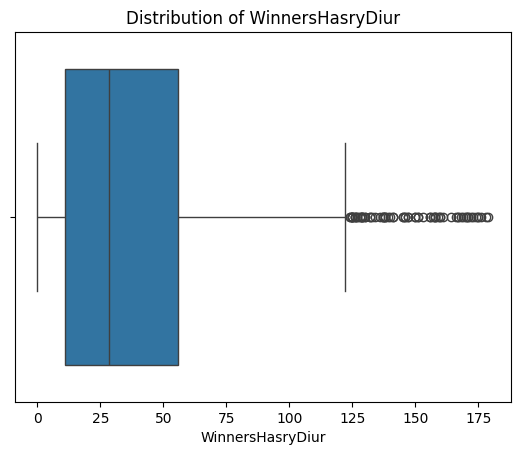

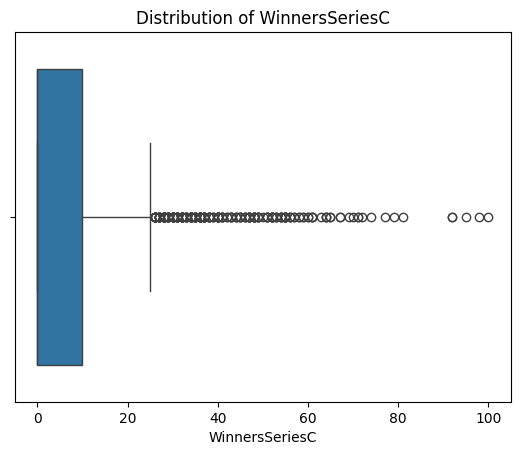

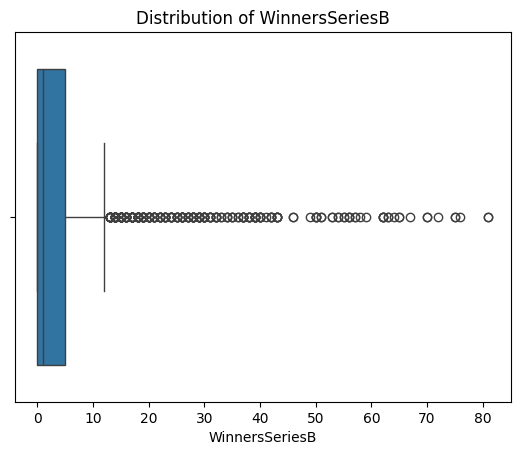

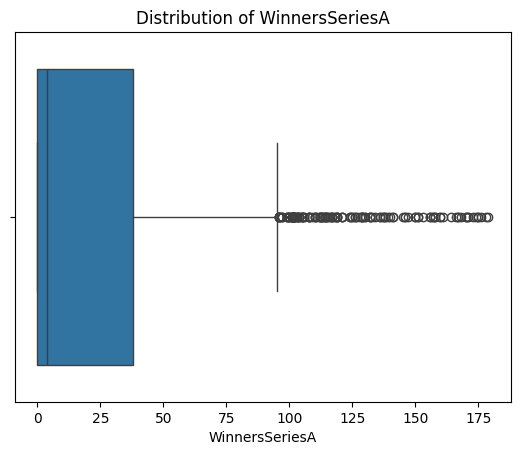

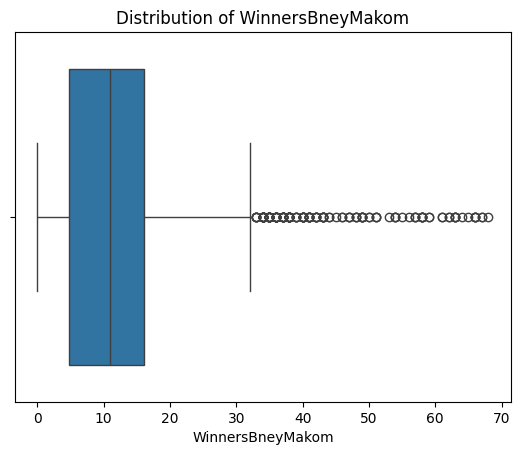

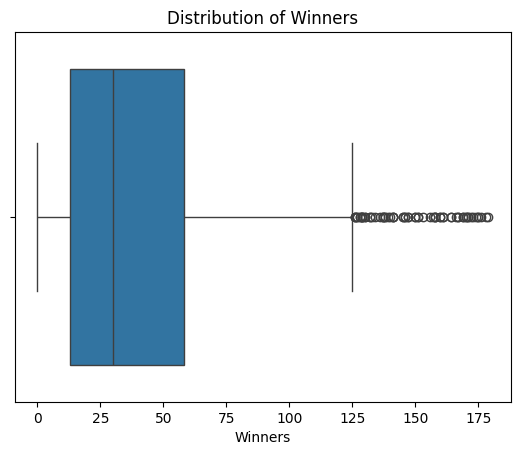

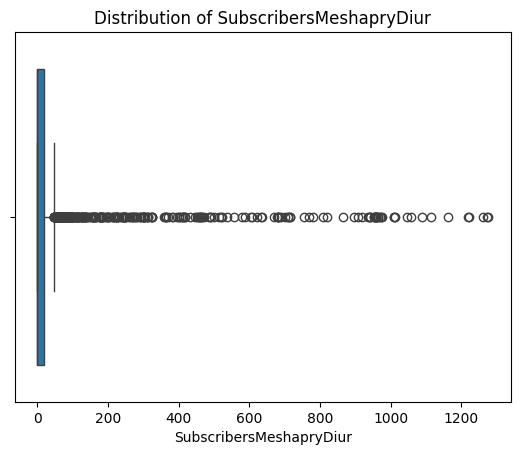

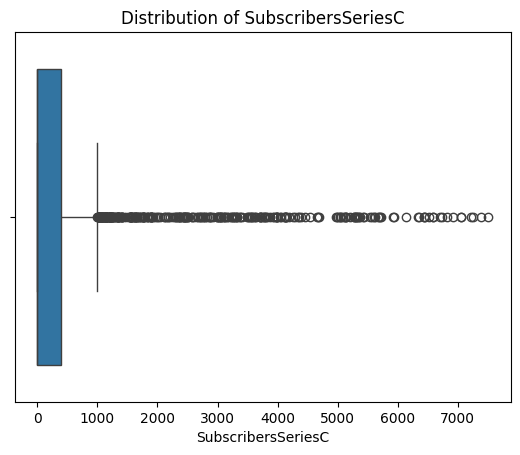

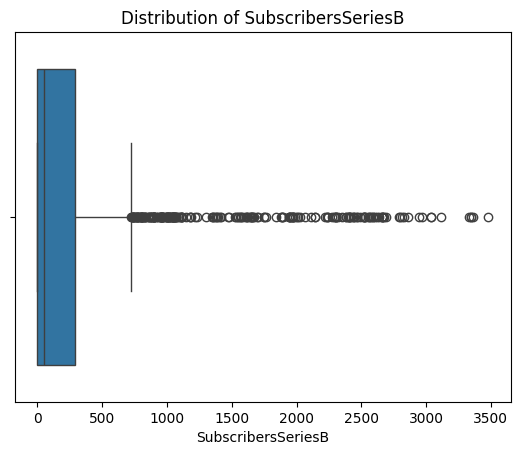

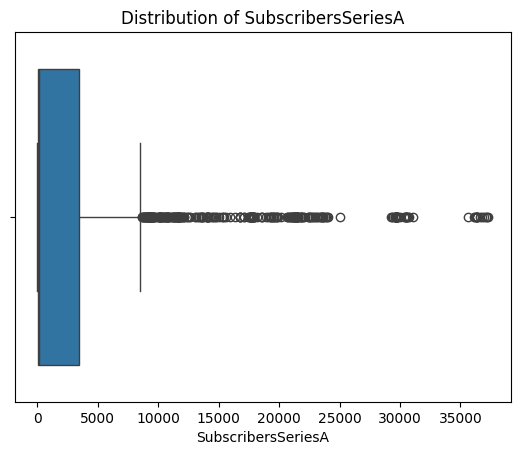

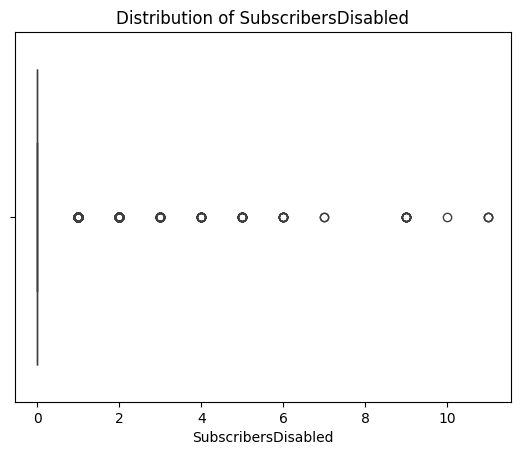

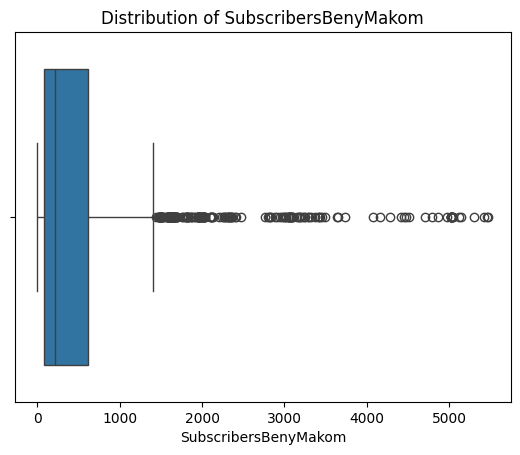

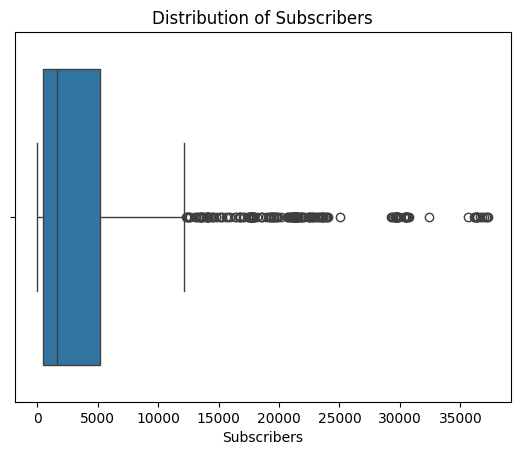

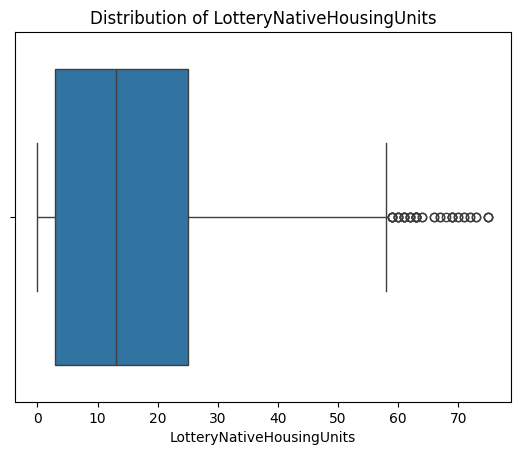

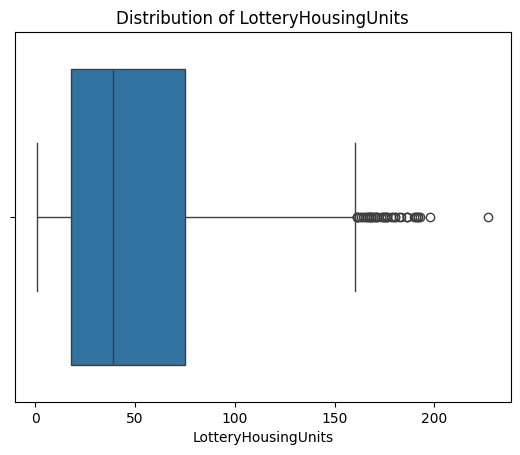

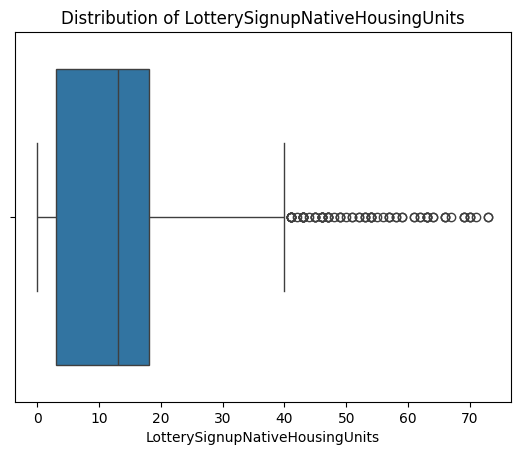

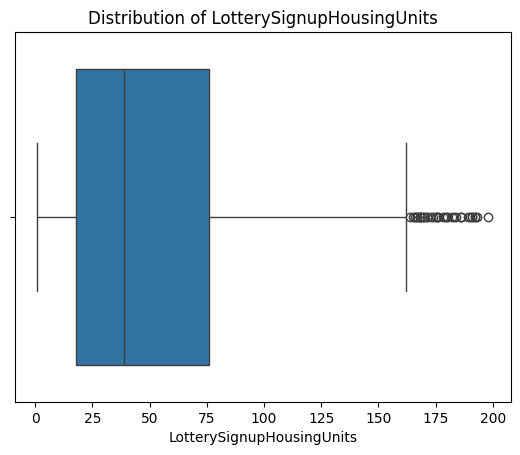

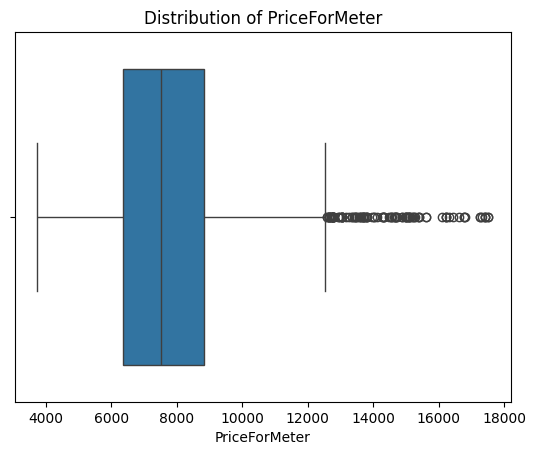

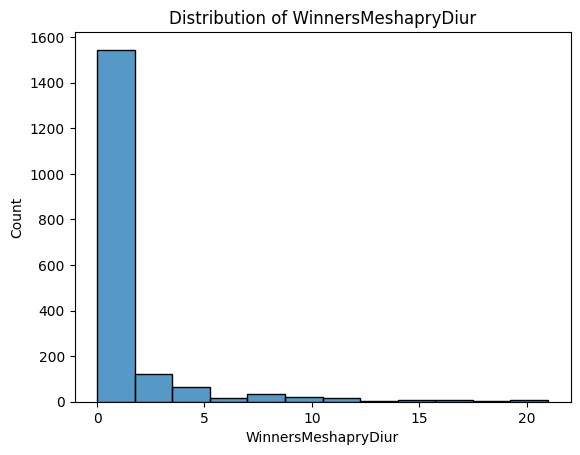

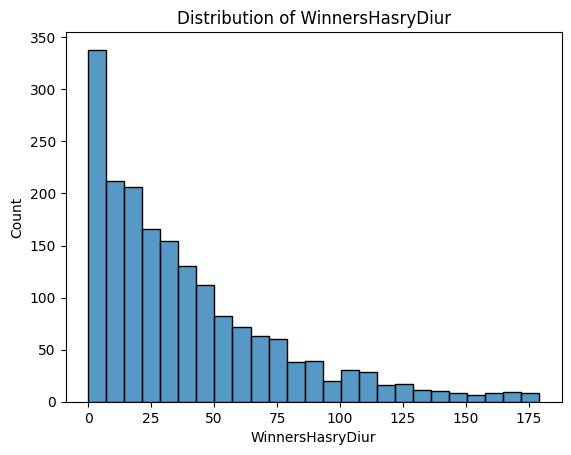

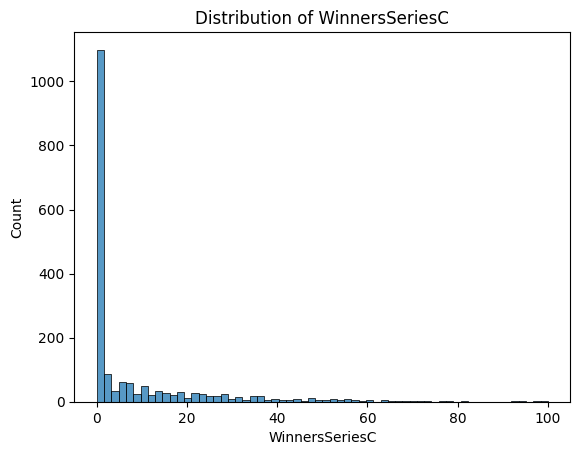

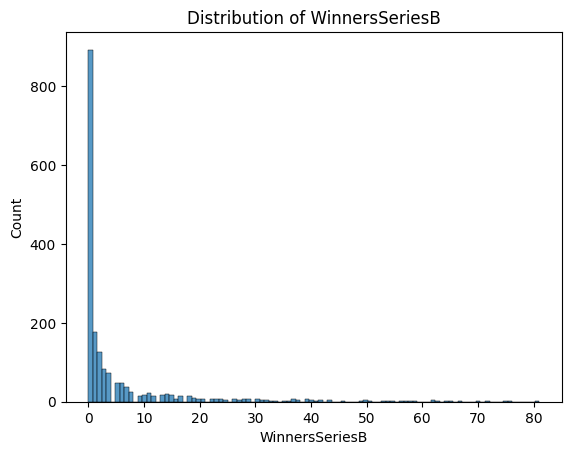

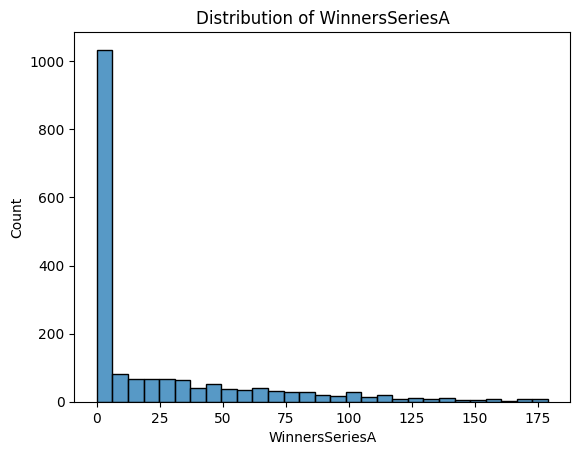

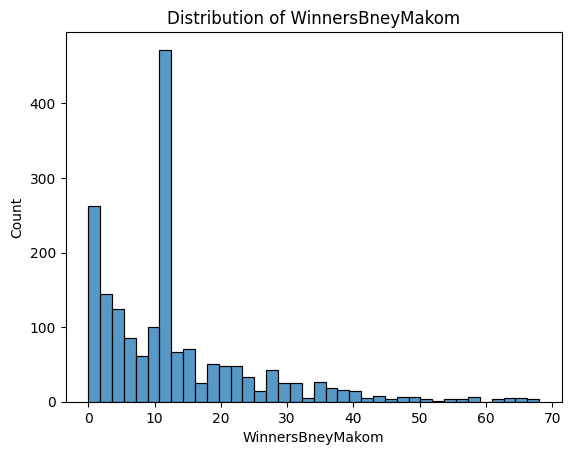

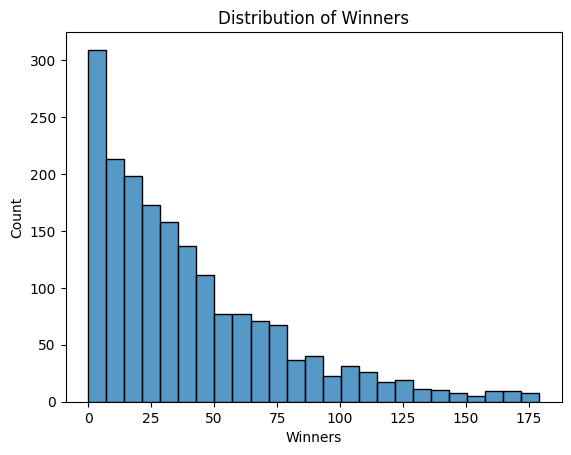

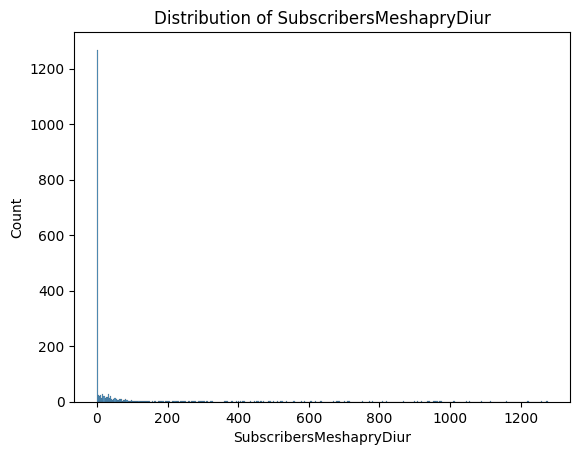

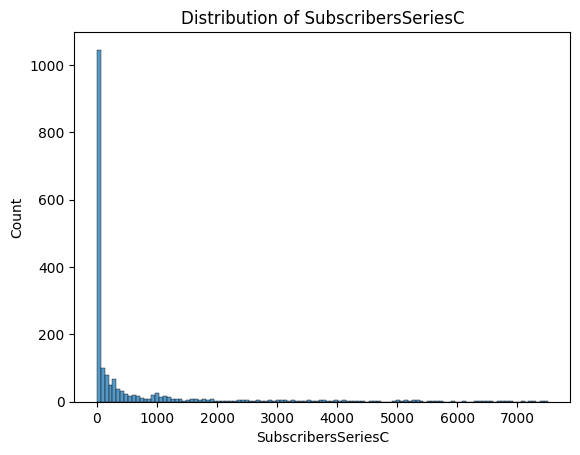

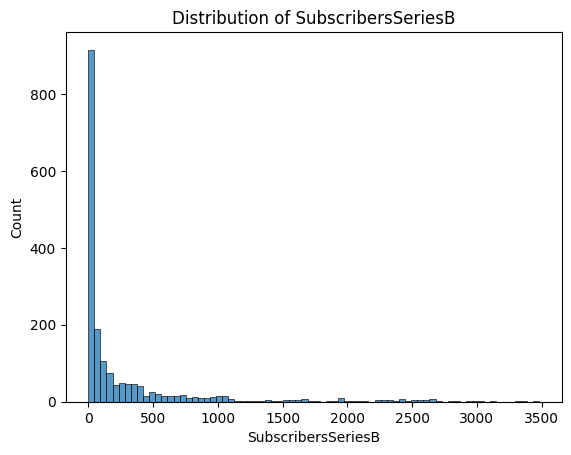

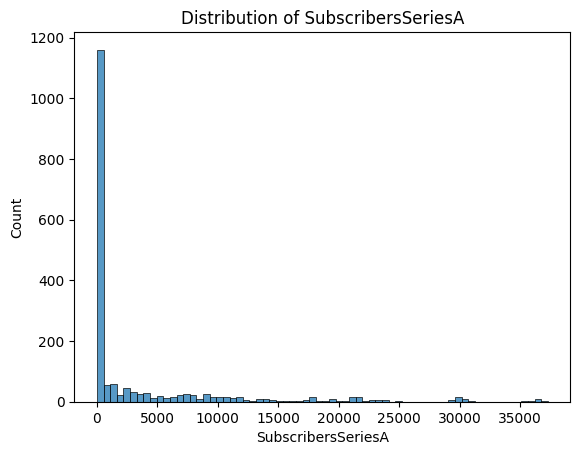

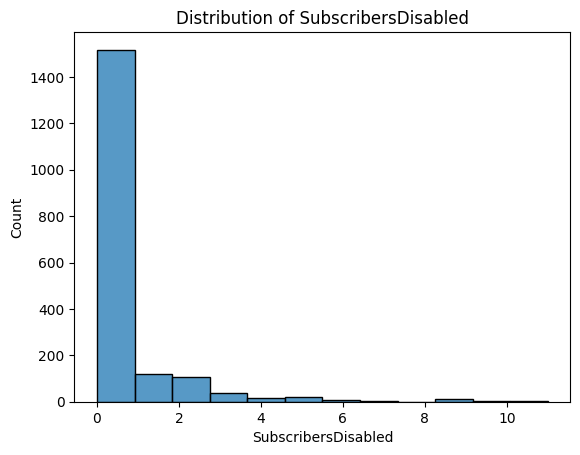

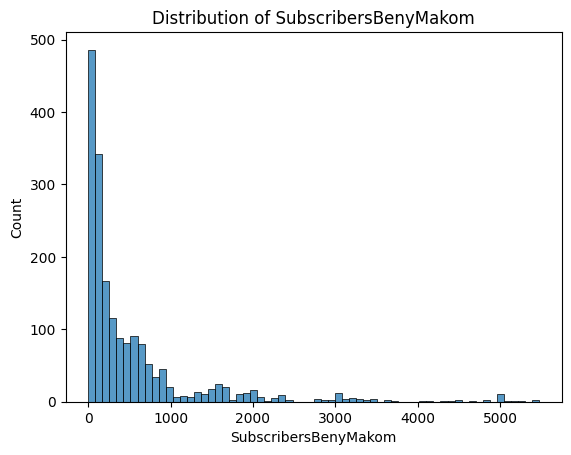

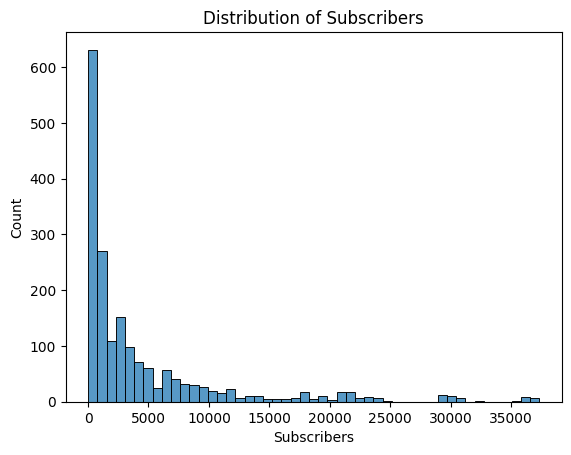

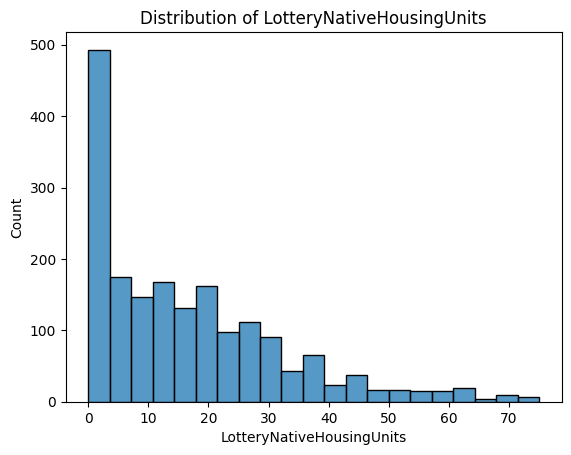

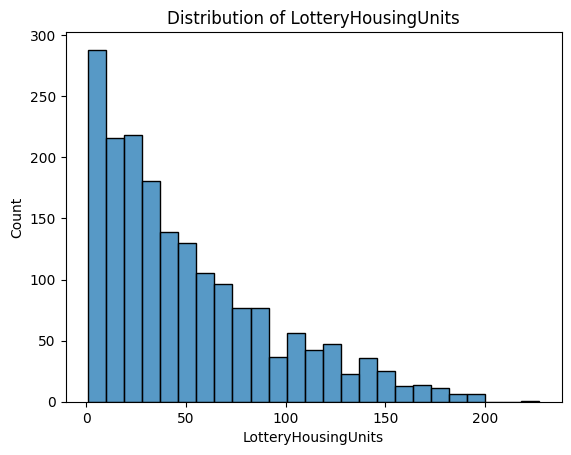

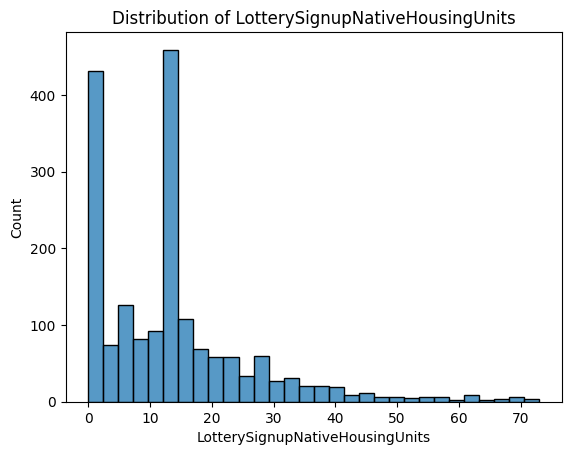

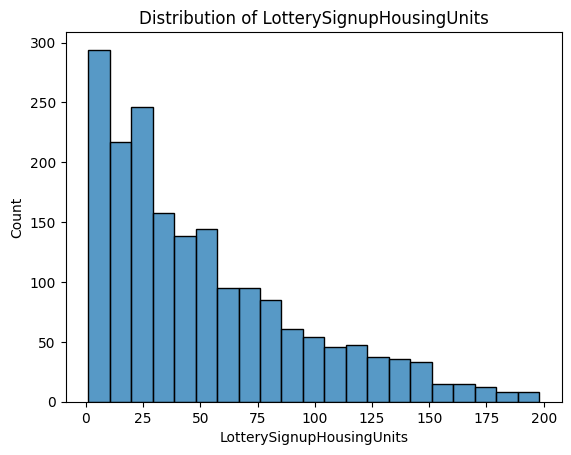

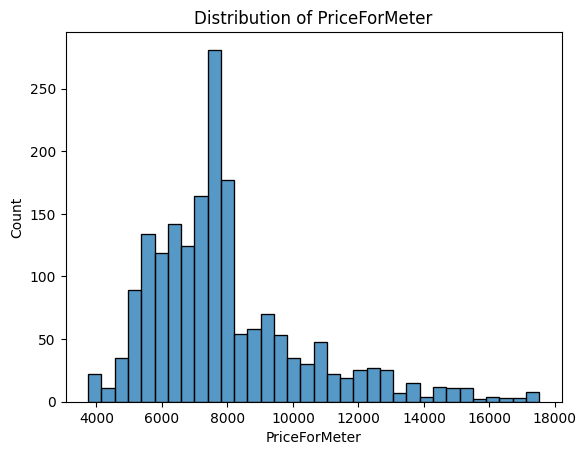

In [107]:
plot_everything(cleaned_data)

In [108]:
#dropping columns with almost only 1 value
cleaned_data=cleaned_data.drop(['WinnersMeshapryDiur','SubscribersDisabled','SubscribersMeshapryDiur'],axis=1)


In [109]:
#outliers in object columns:
object_cols=data.select_dtypes(include=['object','datetime64[ns]']).columns

In [110]:
cleaned_data.head()

WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  WinnersSeriesA  \
58                29               0               0              29   
59                29               0               0              29   
60                37               0               0              37   
61                38               0               0              38   
62                58               0               0              58   

    WinnersBneyMakom  Winners  SubscribersSeriesC  SubscribersSeriesB  \
58              11.0       29                   0                   0   
59              11.0       29                   0                   0   
60              11.0       37                   0                   0   
61              11.0       38                   0                   0   
62              11.0       58                   0                   0   

    SubscribersSeriesA  SubscribersBenyMakom  Subscribers  \
58               21197                   110        21197   
59               21278                   112        21278   
60               21120                   109        21120   
61               21259                   110        21259   
62               21346                   109        21346   

    LotteryNativeHousingUnits  LotteryHousingUnits  \
58                         10                   29   
59                         10                   29   
60                         12                   37   
61                         13                   38   
62                         20                   58   

    LotterySignupNativeHousingUnits  LotterySignupHousingUnits  PriceForMeter  
58                             13.0                         29        12659.0  
59                             13.0                         29        12282.0  
60                             13.0                         37        13050.0  
61                             13.0                         38        12659.0  
62                             13.0                         58        12598.0

### combine the numeric columns with the object columns together again after taking care of outliers

In [111]:
no_outliers= cleaned_data.join(data[object_cols])


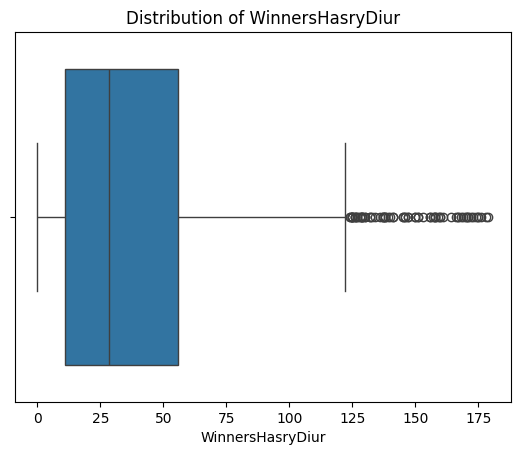

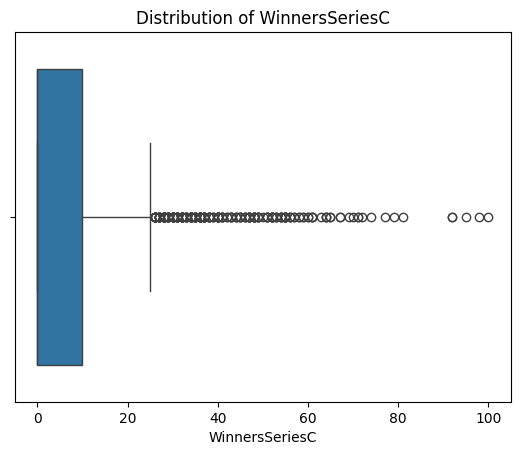

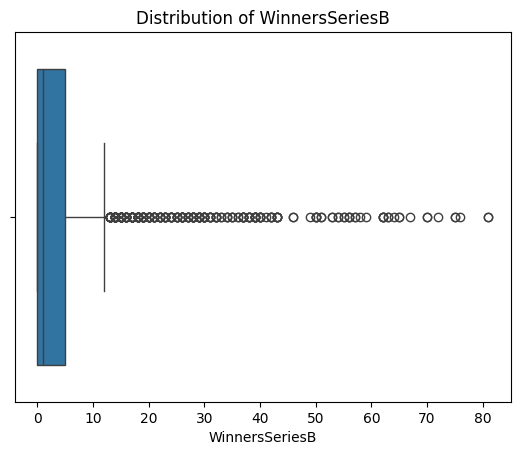

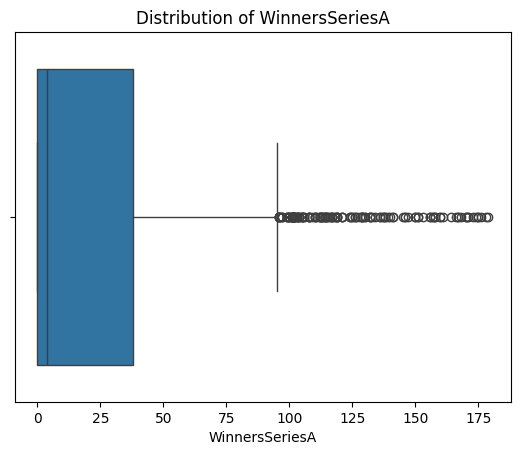

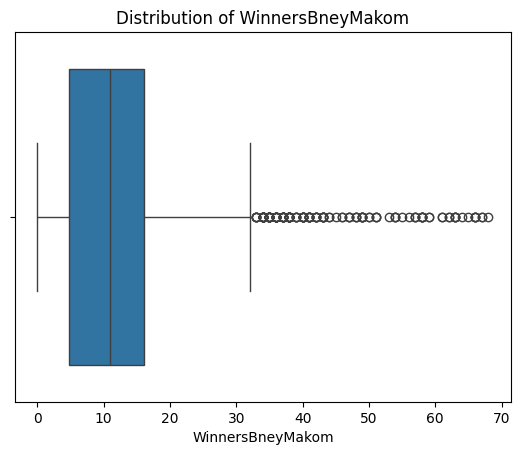

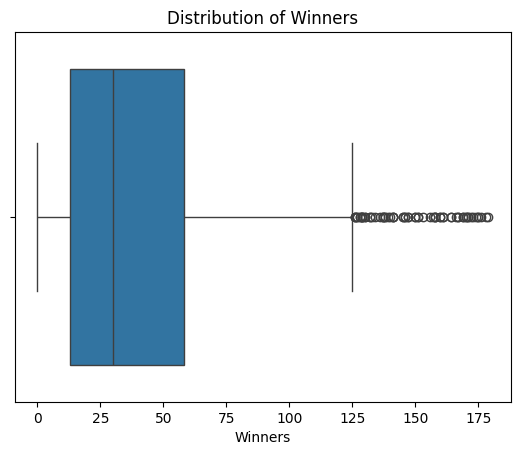

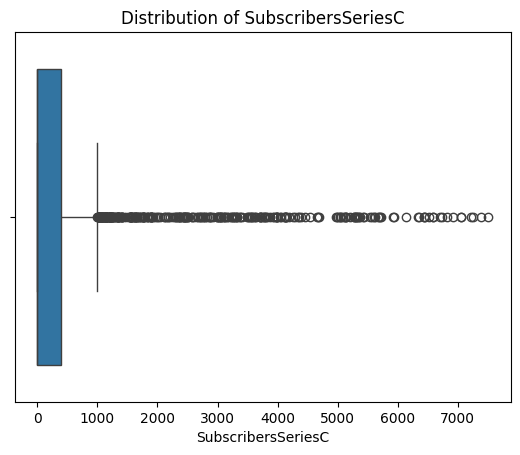

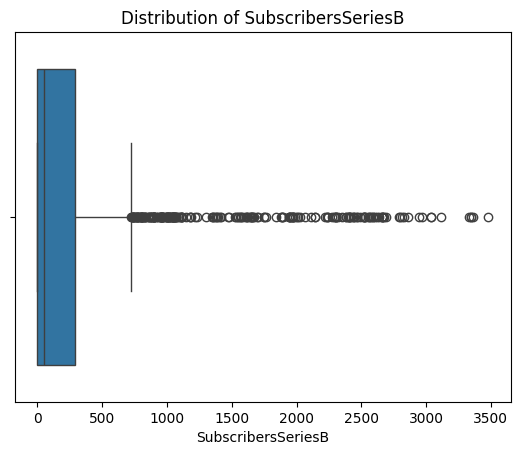

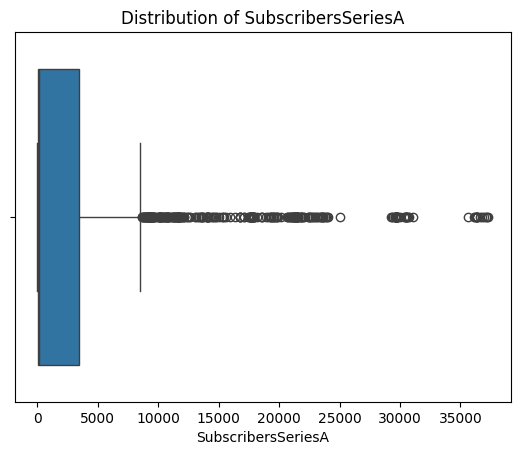

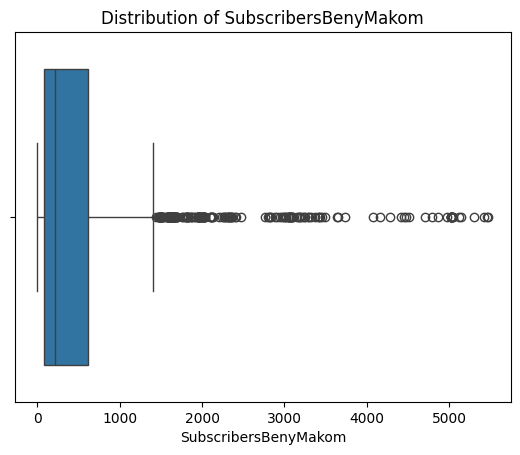

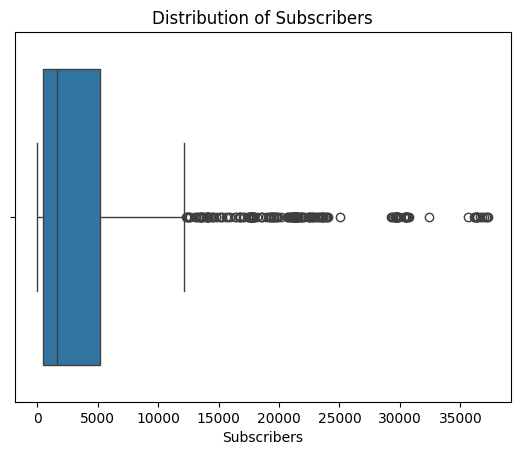

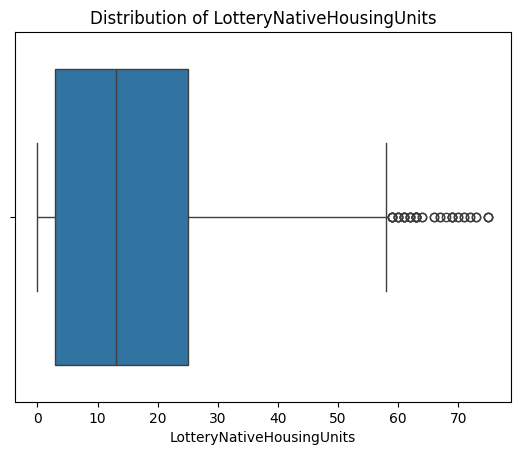

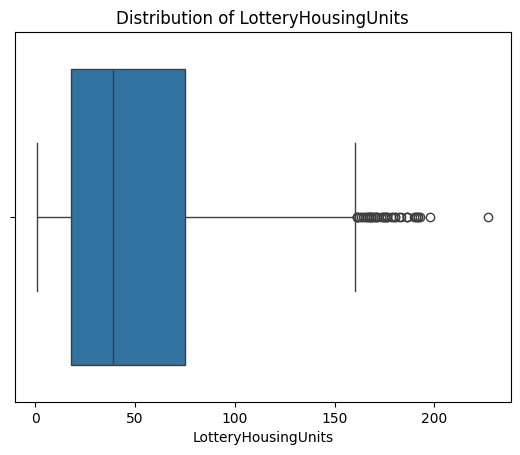

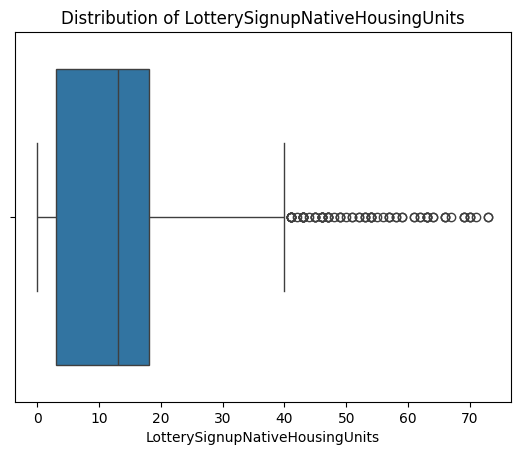

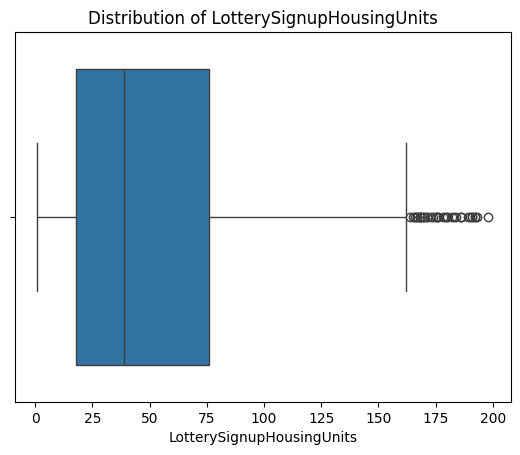

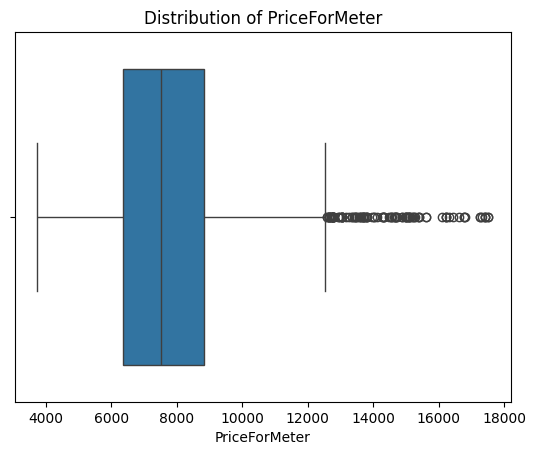

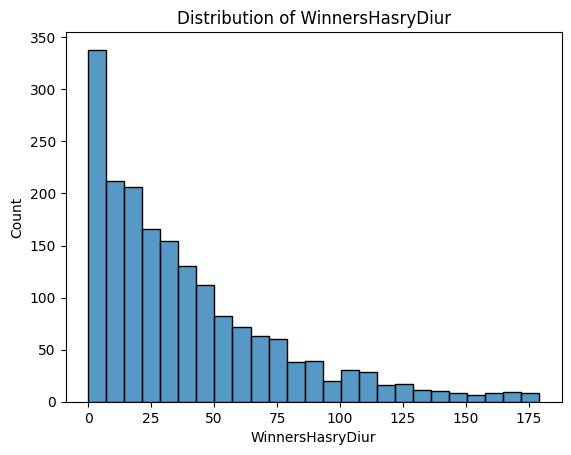

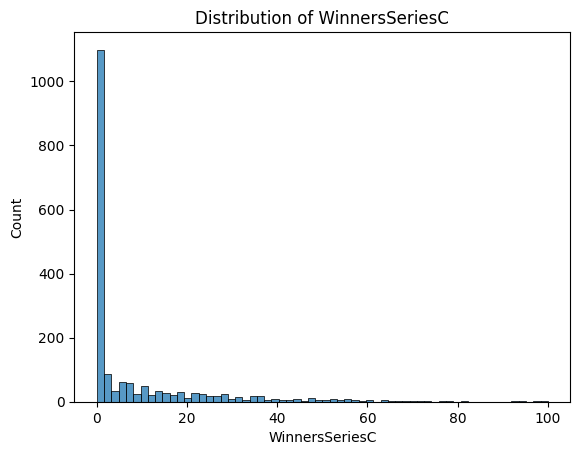

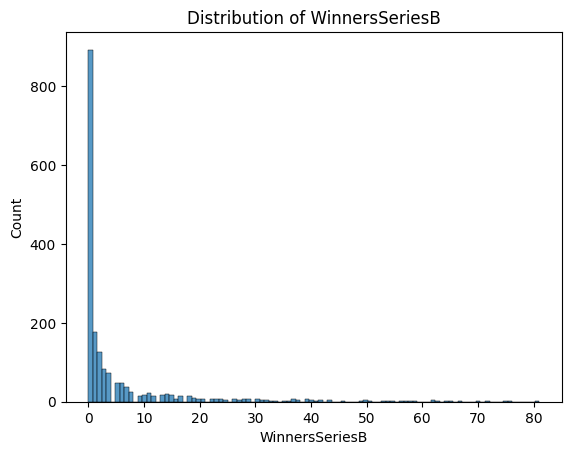

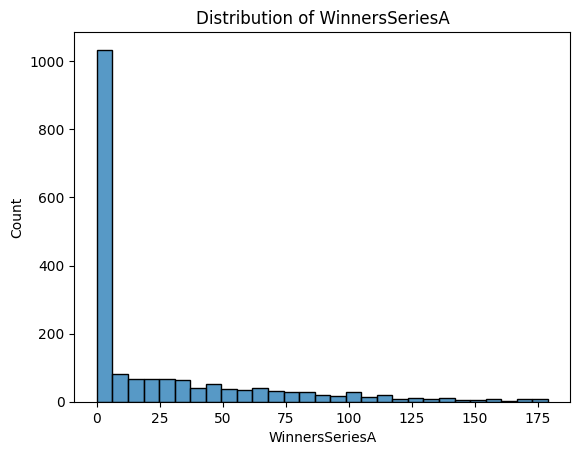

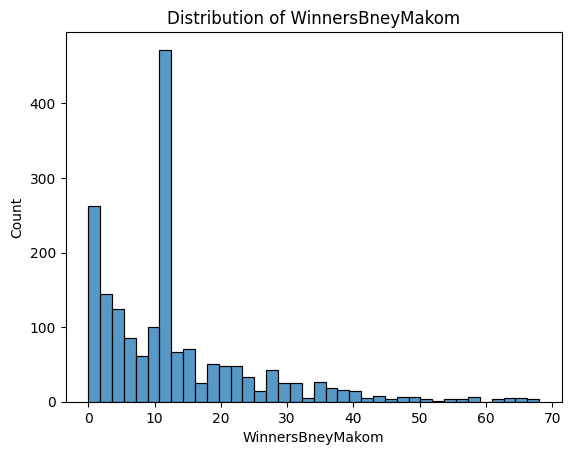

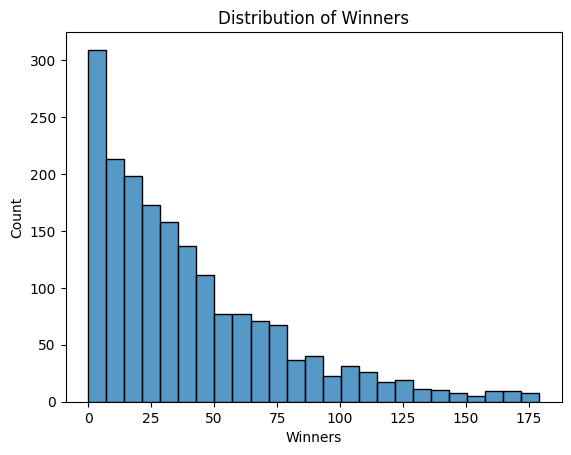

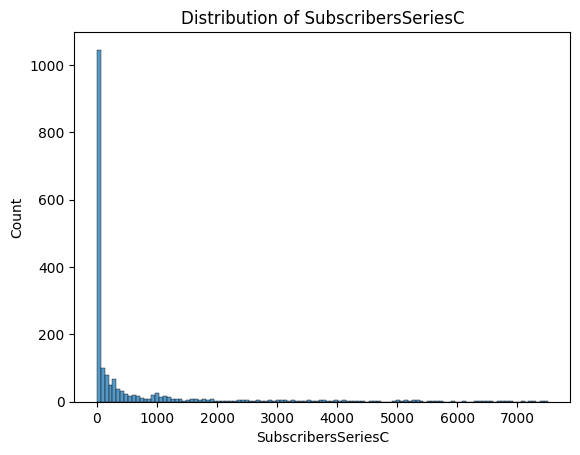

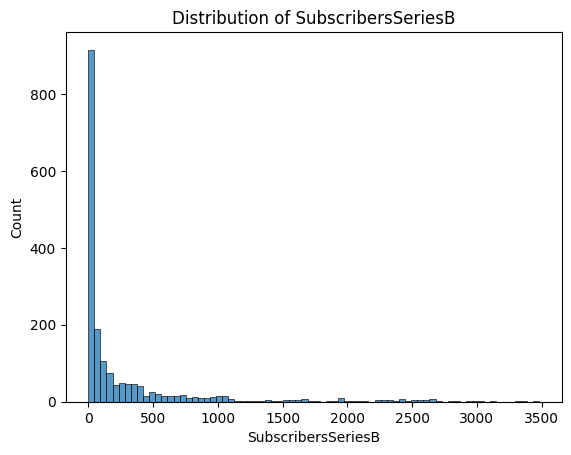

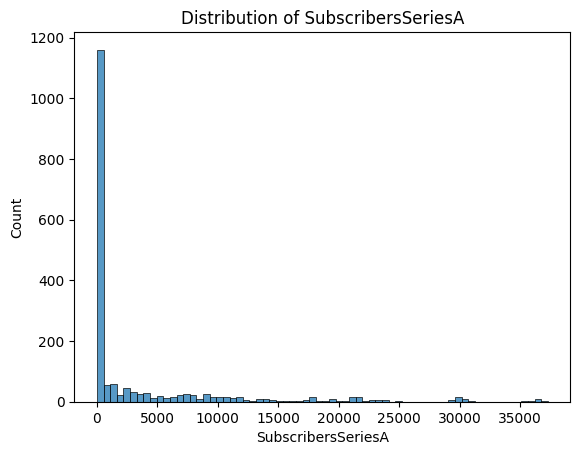

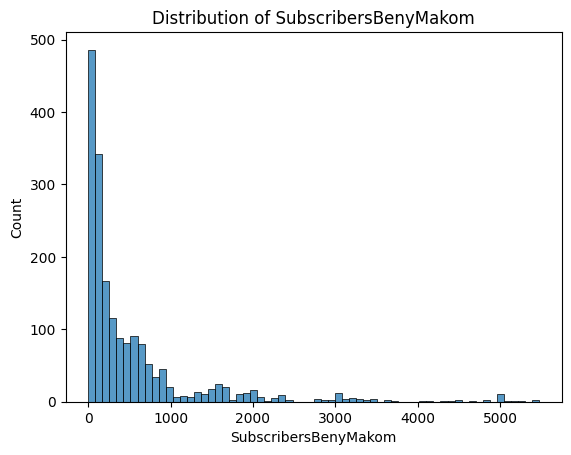

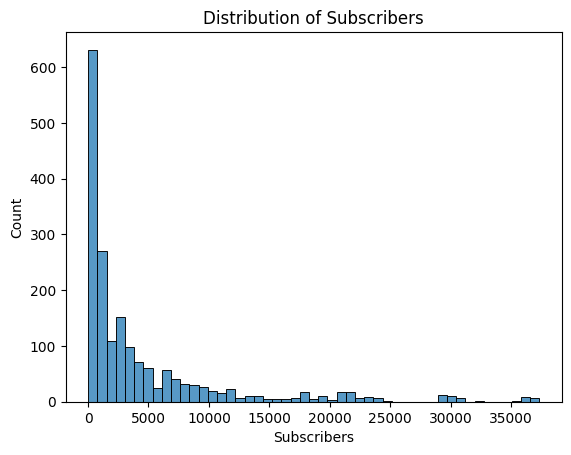

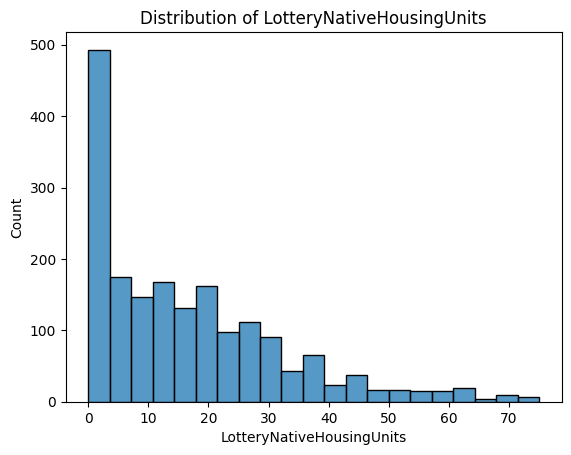

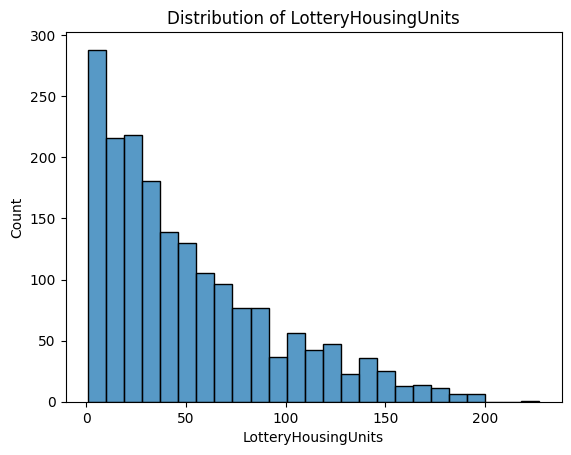

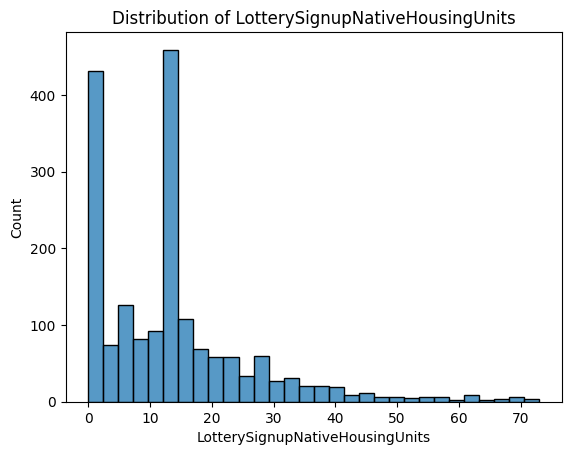

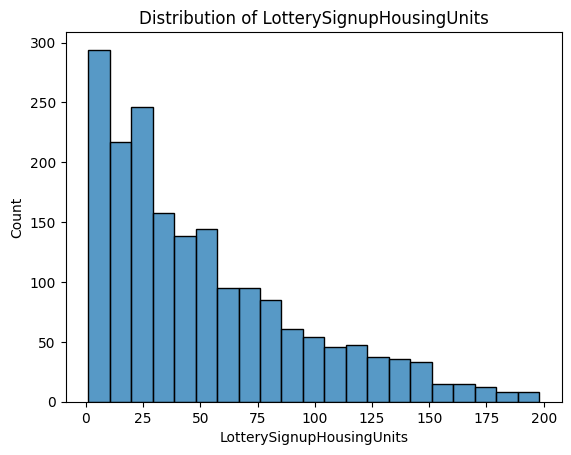

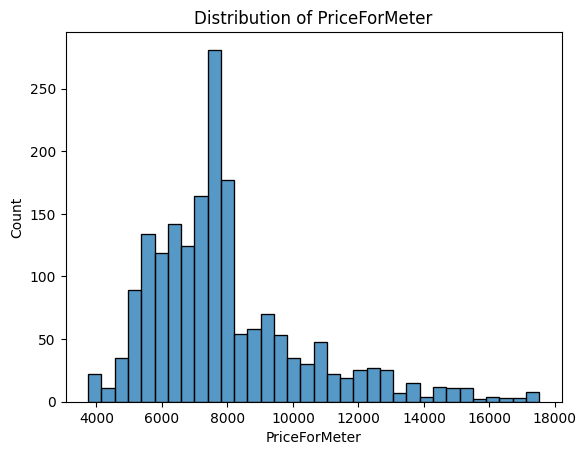

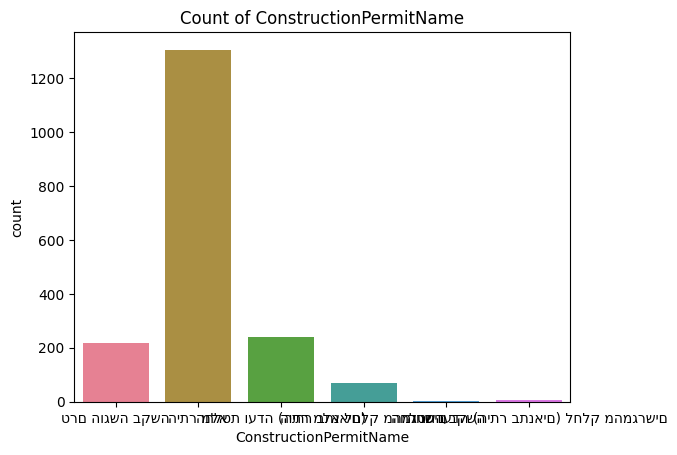

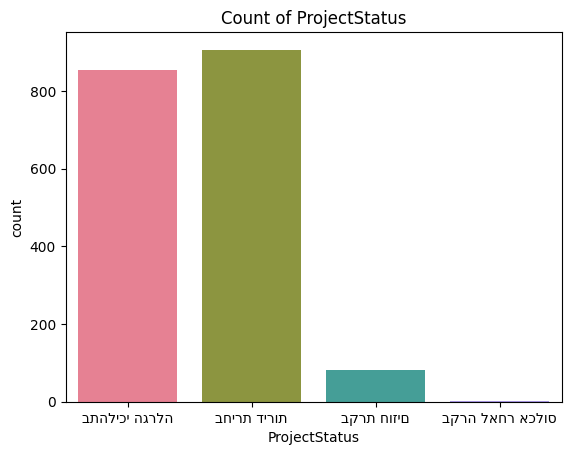

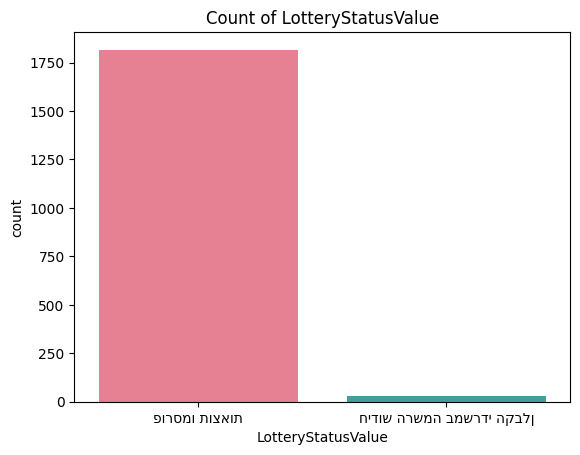

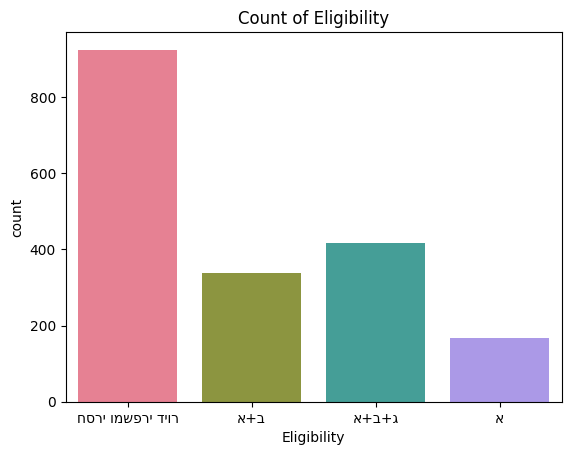

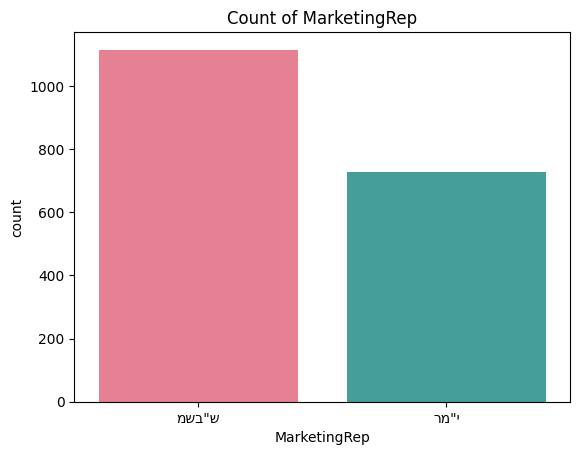

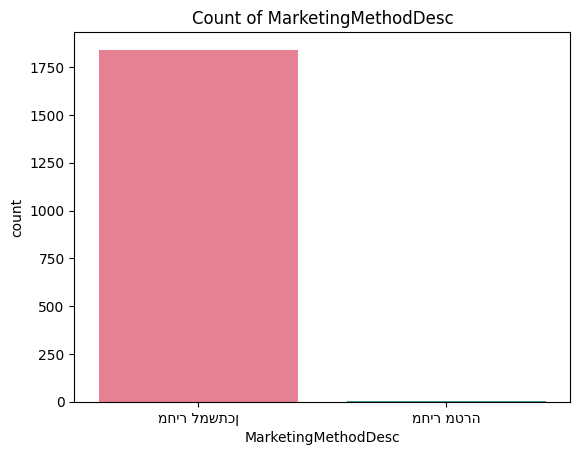

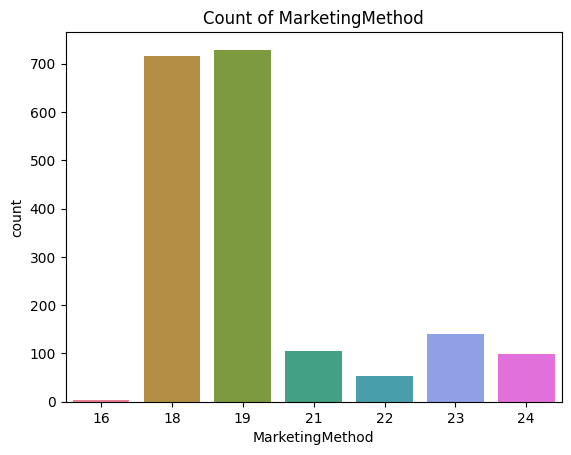

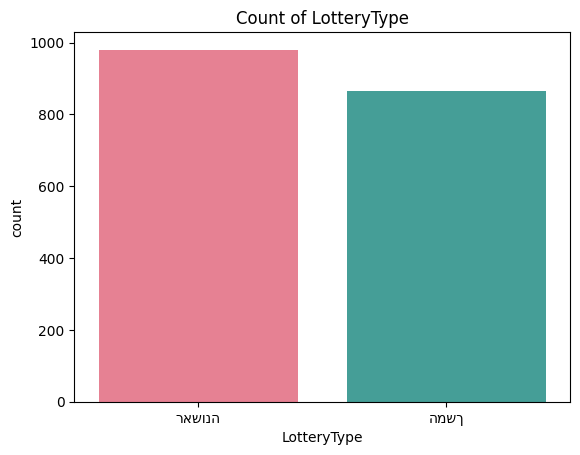

In [112]:
plot_everything(no_outliers)

## handle object outliers

In [113]:
#almost only 1 specific value
no_outliers=no_outliers.drop('MarketingMethodDesc',axis=1)

In [114]:
no_outliers['LotteryStatusValue'].value_counts()

LotteryStatusValue
פורסמו תוצאות               1816
חידוש הרשמה במשרדי הקבלן      28
Name: count, dtype: int64

In [115]:
no_outliers['ProjectStatus'].value_counts()

ProjectStatus
בחירת דירות        906
בתהליכי הגרלה      854
בקרת חוזים          82
בקרה לאחר אכלוס      2
Name: count, dtype: int64

In [116]:
no_outliers=no_outliers.drop(no_outliers[no_outliers['ProjectStatus']=='בקרה לאחר אכלוס'].index)

In [117]:
no_outliers['ConstructionPermitName'].value_counts()

ConstructionPermitName
היתר מלא                                  1303
החלטת ועדה (היתר בתנאים)                   241
טרם הוגשה בקשה                             218
היתר מלא לחלק מהמגרשים                      70
החלטת ועדה (היתר בתנאים) לחלק מהמגרשים       6
הוגשה בקשה                                   4
Name: count, dtype: int64

In [118]:
no_outliers=no_outliers.drop(no_outliers[no_outliers['ConstructionPermitName']=='הוגשה בקשה'].index)
no_outliers=no_outliers.drop(no_outliers[no_outliers['ConstructionPermitName']=='החלטת ועדה (היתר בתנאים) לחלק מהמגרשים'].index)

In [119]:
len(no_outliers)/len(data)

0.8035087719298246

# Feature Engeneering

### new column which represent the number of days between the end of singnup the the lottery execution date

In [120]:
# Ensure both columns are in datetime format
no_outliers['LotteryExecutionDate'] = pd.to_datetime(no_outliers['LotteryExecutionDate'])
no_outliers['LotteryEndSignupDate'] = pd.to_datetime(no_outliers['LotteryEndSignupDate'])

# Calculate the difference in days
no_outliers['num_of_days_between'] = (no_outliers['LotteryExecutionDate'] - no_outliers['LotteryEndSignupDate']).dt.days


### lotteries happened before sing up date is over for over then 50%!

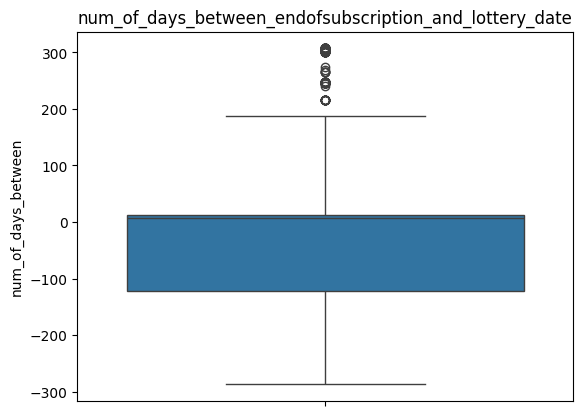

In [121]:
#we can see that most of the lotteries been done before the Endsignup dates
sns.boxplot(data=no_outliers,y='num_of_days_between')
plt.title('num_of_days_between_endofsubscription_and_lottery_date')
plt.show()

In [122]:
#it might cause because over subscription rate, lets check that:
no_outliers['OversubscriptionRate'] = no_outliers['Subscribers'] / no_outliers['LotteryHousingUnits']

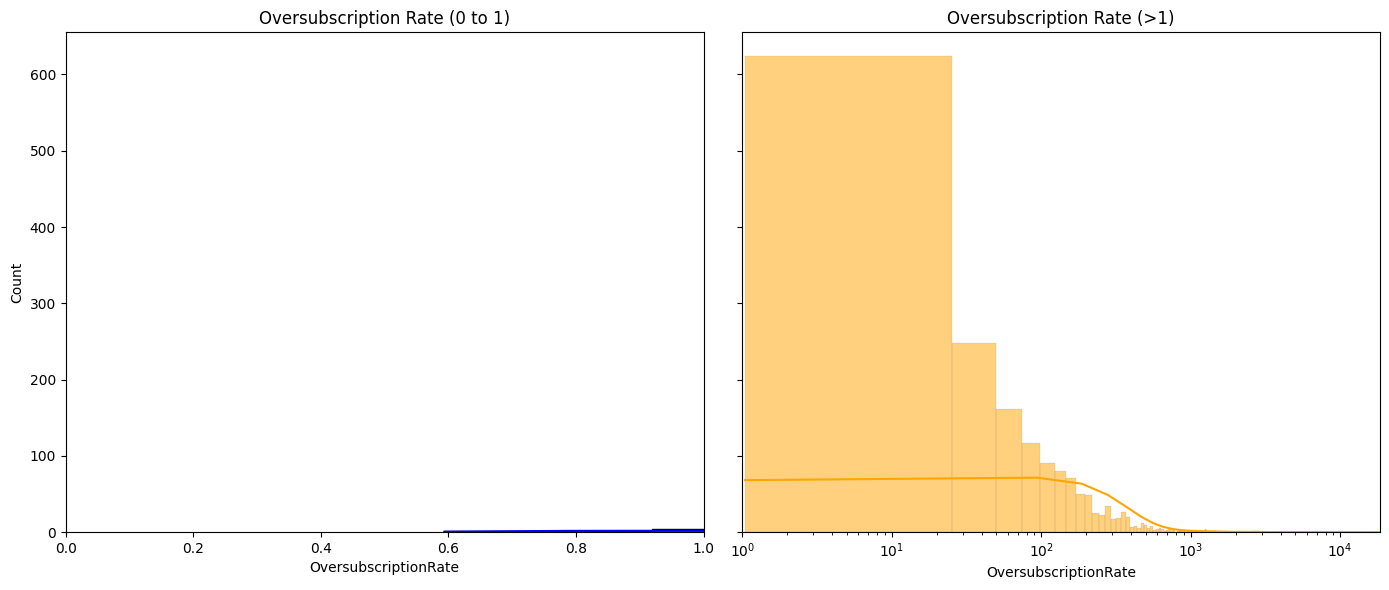

In [123]:
# Create two subsets based on the OversubscriptionRate values
below_one = no_outliers[no_outliers['OversubscriptionRate'] <= 1]
above_one = no_outliers[no_outliers['OversubscriptionRate'] > 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the distribution for values between 0 and 1
sns.histplot(data=below_one, x='OversubscriptionRate', kde=True, ax=axes[0], color="blue")
axes[0].set_title('Oversubscription Rate (0 to 1)')
axes[0].set_xlim(0, 1)

# Plot the distribution for values above 1
sns.histplot(data=above_one, x='OversubscriptionRate', kde=True, ax=axes[1], color="orange")
axes[1].set_title('Oversubscription Rate (>1)')
axes[1].set_xlim(1, above_one['OversubscriptionRate'].max())
axes[1].set_xscale('log')
# Display the plots
plt.tight_layout()
plt.show()



### we can clearly see that we have way too many subscribers that might cause the date of the lottery to be before the signupdate ends

### we are going to predict if we will have houses left after a lottery or not, this is an importent prediction which will indicate if that will happen and what are the couses for that:
### first i will plot a time plot of the winners and the houses we have for each lottery

In [124]:
# Group by month and calculate the sum of relevant columns
monthly_data = (
    no_outliers.groupby(no_outliers['LotteryExecutionDate'].dt.to_period('M'))[[ 'Winners', 'LotteryHousingUnits']]
    .sum()
    .reset_index()
)
monthly_data['LotteryExecutionDate'] = monthly_data['LotteryExecutionDate'].dt.to_timestamp()

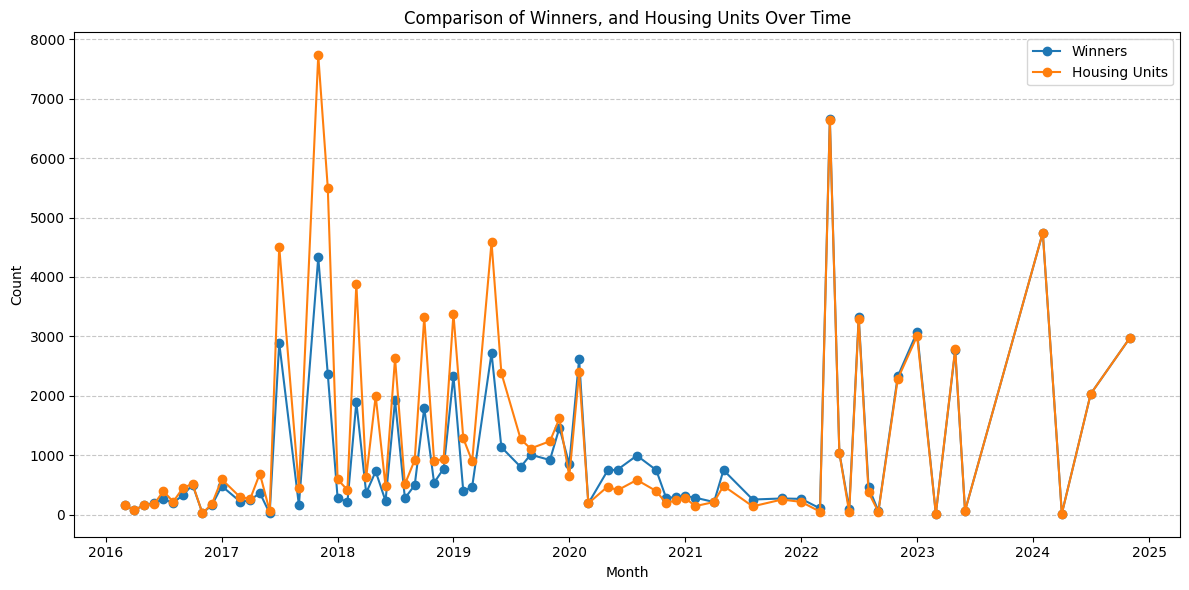

In [125]:
# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['LotteryExecutionDate'], monthly_data['Winners'], label='Winners', marker='o')
plt.plot(monthly_data['LotteryExecutionDate'], monthly_data['LotteryHousingUnits'], label='Housing Units', marker='o')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Comparison of Winners, and Housing Units Over Time')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('winners_and_housing_units_trends.png', dpi=300)  # שמירה כקובץ PNG

# Show the plot
plt.show()


overall we can see that the numbers are close. however we can see that in the past we had way more houses left then today which can indicate that year might affect the model

In [126]:
df_model=no_outliers.copy()

In [127]:
#building new column of (is there any houses left after the lottery (1=yes,0=no)):
lily=[]
for i in df_model.index:
    if df_model.loc[i,'Winners']>=df_model.loc[i,'LotteryHousingUnits']:
        lily.append(0)
    else:
        lily.append(1)
df_model['is_house_left']  =lily  

is house left is our target column for the supervised model

In [128]:
df_model['month'] = df_model['LotteryExecutionDate'].dt.month
df_model['year'] = df_model['LotteryExecutionDate'].dt.year

In [129]:
df_model.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners', 'SubscribersSeriesC',
       'SubscribersSeriesB', 'SubscribersSeriesA', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep', 'MarketingMethod',
       'CentralizationType', 'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate', 'is_house_left', 'month', 'year'],
      dtype='object')

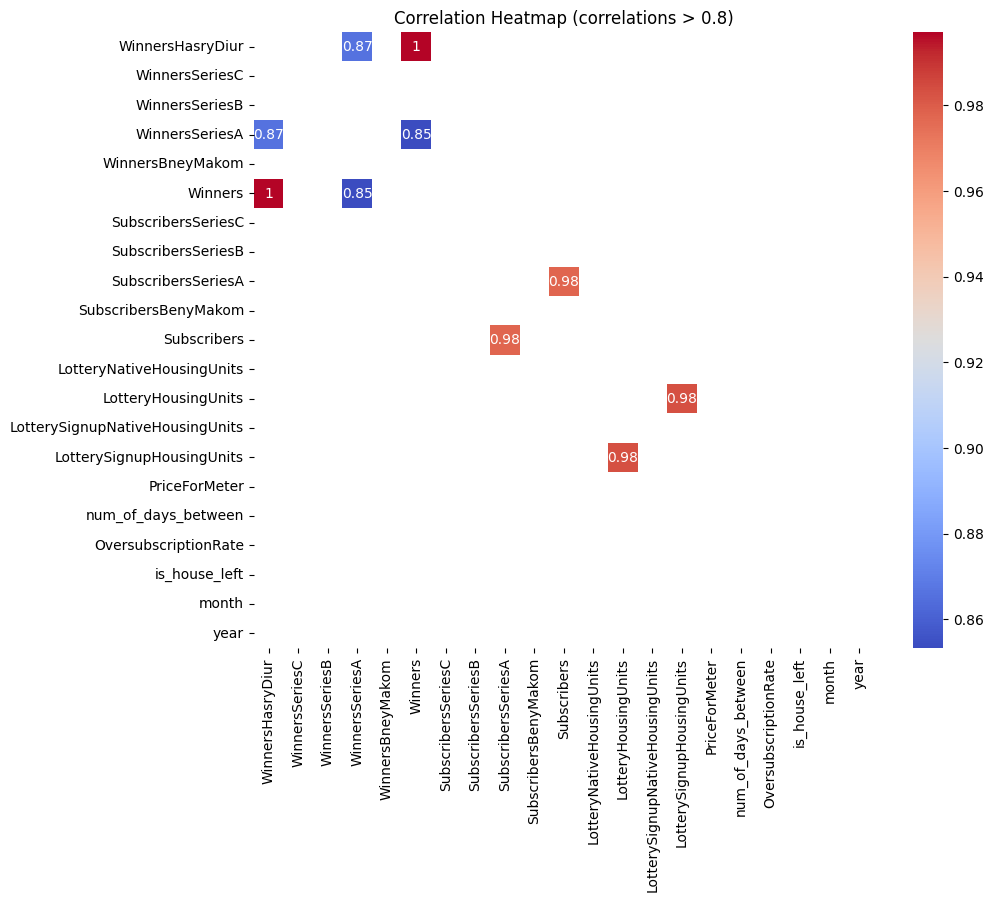

In [130]:
num_cols=df_model.select_dtypes(include=[np.number]).columns
# Compute the correlation matrix
corr_matrix = df_model[num_cols].corr()

# Filter correlations greater than 0.8
filtered_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix != 1)]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", mask=filtered_corr.isnull(), cbar=True)
plt.title("Correlation Heatmap (correlations > 0.8)")
plt.show()


In [131]:
#dropping the columns we sayed at the beggining or columns with high correlation to different columns
df_model=df_model.drop(['WinnersHasryDiur','WinnersBneyMakom','Winners','SubscribersBenyMakom','Subscribers','LotterySignupNativeHousingUnits','LotterySignupHousingUnits','OversubscriptionRate'],axis=1)

In [132]:
#drop the dates columns:
df_model=df_model.drop(['LotteryExecutionDate','LotteryEndSignupDate'],axis=1)

In [133]:
df_model.columns

Index(['WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA',
       'SubscribersSeriesC', 'SubscribersSeriesB', 'SubscribersSeriesA',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits', 'PriceForMeter',
       'ConstructionPermitName', 'ProjectStatus', 'ProviderName',
       'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName', 'LamasCode',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep', 'MarketingMethod',
       'CentralizationType', 'LotteryType', 'LotteryId', 'num_of_days_between',
       'is_house_left', 'month', 'year'],
      dtype='object')

# Prediction model

LogisticRegression - Average Cross-Validation Accuracy: 0.8930
LogisticRegression - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       202
           1       0.90      0.92      0.91       165

    accuracy                           0.92       367
   macro avg       0.92      0.92      0.92       367
weighted avg       0.92      0.92      0.92       367

DecisionTreeClassifier - Average Cross-Validation Accuracy: 0.8586
DecisionTreeClassifier - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       202
           1       0.85      0.87      0.86       165

    accuracy                           0.87       367
   macro avg       0.87      0.87      0.87       367
weighted avg       0.87      0.87      0.87       367

XGBClassifier - Average Cross-Validation Accuracy: 0.8952
XGBClassifier - Classification Report:
              precision    

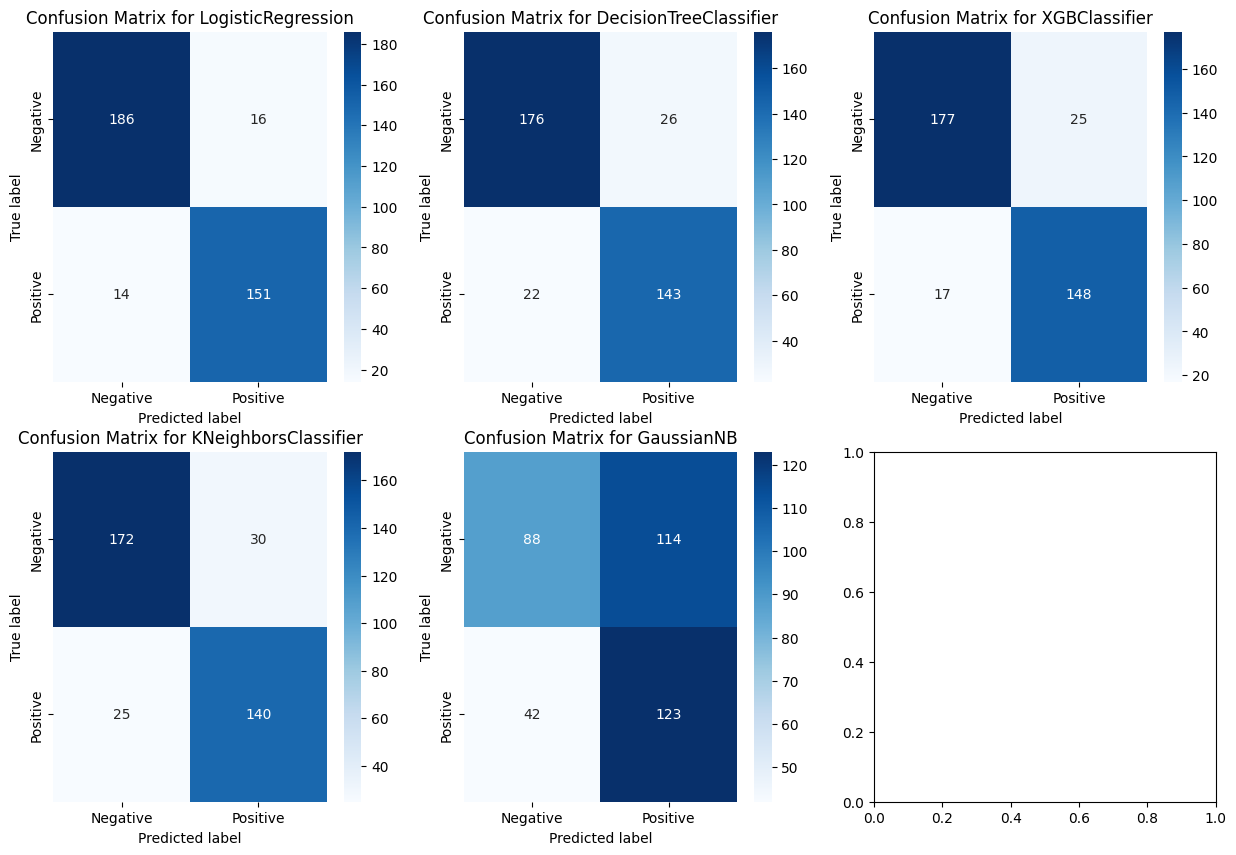

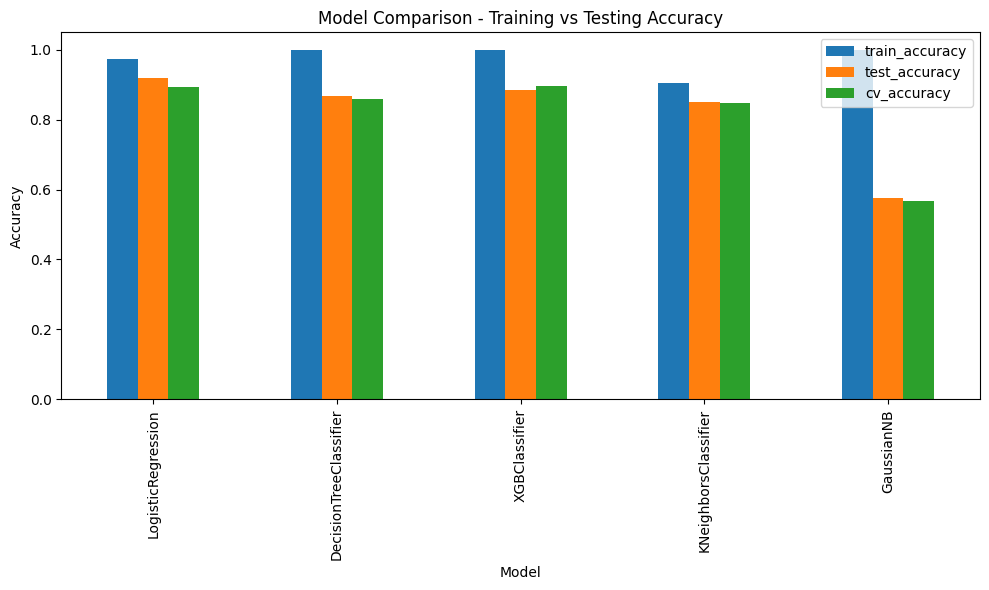

The best model based on cross-validation accuracy is: XGBClassifier


In [134]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd  # להמיר ל-DataFrame

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

def build_and_train_model(X, y):
    """
    בונה מודל, מאמן אותו עם קרוס-וולידציה ומחזיר את המודל הטוב ביותר.
    כולל הצגת קונפוזיציה מטריקס לכל מודל עם דיוק על קבוצות האימון והבדיקה.
    """
    # הגדרת הפייפליין
    categorical_features = X.select_dtypes(include=['object']).columns
    numeric_features = X.select_dtypes(exclude=['object']).columns

    # הגדרת העיבוד לנתונים
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
        ])`

    # הגדרת המודלים
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "XGBClassifier": XGBClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GaussianNB": GaussianNB(),
    }

    # קרוס-וולידציה 10 קיפולים
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    model_comparison = {
        'model': [],
        'train_accuracy': [],
        'test_accuracy': [],
        'cv_accuracy': [],
        'best_model': None
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(15,10))  # גודל של 2 שורות ו-3 עמודות עבור כל המטריצות
    axes = axes.ravel()  # flatten the axes array for easy indexing

    for i, (model_name, model) in enumerate(models.items()):
        # יצירת פייפליין עם טרנספורמטור ומודל
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        # חישוב קרוס-וולידציה
        cross_val_results = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
        model_comparison['cv_accuracy'].append(np.mean(cross_val_results))
        print(f"{model_name} - Average Cross-Validation Accuracy: {np.mean(cross_val_results):.4f}")

        # חישוב דיוק על קבוצת האימון ובדיקת האוברפיטינג
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        pipeline.fit(X_train, y_train)
        train_score = pipeline.score(X_train, y_train)  # דיוק על קבוצת האימון
        test_score = pipeline.score(X_test, y_test)    # דיוק על קבוצת הבדיקה

        # שמירת התוצאות להשוואה
        model_comparison['model'].append(model_name)
        model_comparison['train_accuracy'].append(train_score)
        model_comparison['test_accuracy'].append(test_score)

        # קונפוזיציה מטריקס
        y_pred = pipeline.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # הצגת קונפוזיציה מטריקס בתוך הגרפים
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {model_name}')
        axes[i].set_xlabel('Predicted label')
        axes[i].set_ylabel('True label')

        # הצגת דו"ח סיווג (classification report) עם דיוק על האימון והבדיקה
        print(f"{model_name} - Classification Report:\n{classification_report(y_test, y_pred)}")

    # הצגת גרף השוואת דיוק
    comparison_df = pd.DataFrame(model_comparison)
    comparison_df.set_index('model', inplace=True)

    # גרף השוואת דיוק
    comparison_df.plot(kind='bar', figsize=(10,6))
    plt.title('Model Comparison - Training vs Testing Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()

    # החזרת המודל הטוב ביותר על בסיס דיוק הקרוס-וולידציה
    best_model_index = np.argmax(model_comparison['cv_accuracy'])
    best_model_name = model_comparison['model'][best_model_index]
    print(f"The best model based on cross-validation accuracy is: {best_model_name}")
    best_model = models[best_model_name]

    

    return best_model



# חיבור לפונקציה עם הנתונים
X = df_model.drop(['is_house_left','WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA'], axis=1)
y = df_model['is_house_left']

# הרצת המודל עם קרוס-וולידציה והחזרת המודל הטוב ביותר + הנתונים המקודדים
best_model = build_and_train_model(X, y)

# X_transformed_df הוא DataFrame עם שמות העמודות



## Feature importence on the best model

In [135]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

def preprocess_and_predict(X, y, model):
    # מקודד את העמודות הקטגוריאליות עם get_dummies
    X_encoded = pd.get_dummies(X, drop_first=True)
    
    # שומר את שמות העמודות המקודדות
    encoded_columns = X_encoded.columns
    
    # המרת הנתונים לסוג int
    X_encoded = X_encoded.astype(int)
    
    # מנרמל את הנתונים
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)
    
    # מאמן את המודל ומבצע את הניבוי
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    
    # מחשב את הדיוק
    accuracy = accuracy_score(y, y_pred)
    
    # מחזיר את הנתונים כדאטה פריים עם שמות העמודות המקודדות
    X_final = pd.DataFrame(X_scaled, columns=encoded_columns)
    
    # מחזיר את הנתונים, הדיוק והמודל המאומן
    return X_final, accuracy, model



In [136]:
X_df,accuracy,model=preprocess_and_predict(X,y,best_model)

In [137]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

def explain_model_with_shap(model, X):
    """
    ניתוח SHAP עם גרפים נוספים והסבר האם כל פיצ'ר דוחף לכיוון 1 או 0.
    """
    try:
        # בודק את סוג המודל ומחלק אותו לפי הסוג
        if isinstance(model, LogisticRegression):
            # שימוש ב-LinearExplainer עבור מודלים לינאריים כמו LogisticRegression
            explainer = shap.LinearExplainer(model, X)
            shap_values = explainer.shap_values(X)
        
        elif isinstance(model, DecisionTreeClassifier) or isinstance(model, XGBClassifier):
            # שימוש ב-TreeExplainer עבור מודלים מבוססי עצים
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)
        
        else:
            raise ValueError(f"מודל לא נתמך: {type(model)}")
        
        # גרף סיכום SHAP
        print("Feature importence:")
        plt.figure(figsize=(8, 5))  # גודל הגרף
        shap.summary_plot(shap_values, X, show=False)
        plt.tight_layout()
        plt.subplots_adjust(left=0.1)  # התאמה לרוחב הפיצ'רים
        plt.show()

        

    except Exception as e:
        print(f"שגיאה ביצירת ניתוח SHAP: {e}")


Feature importence:


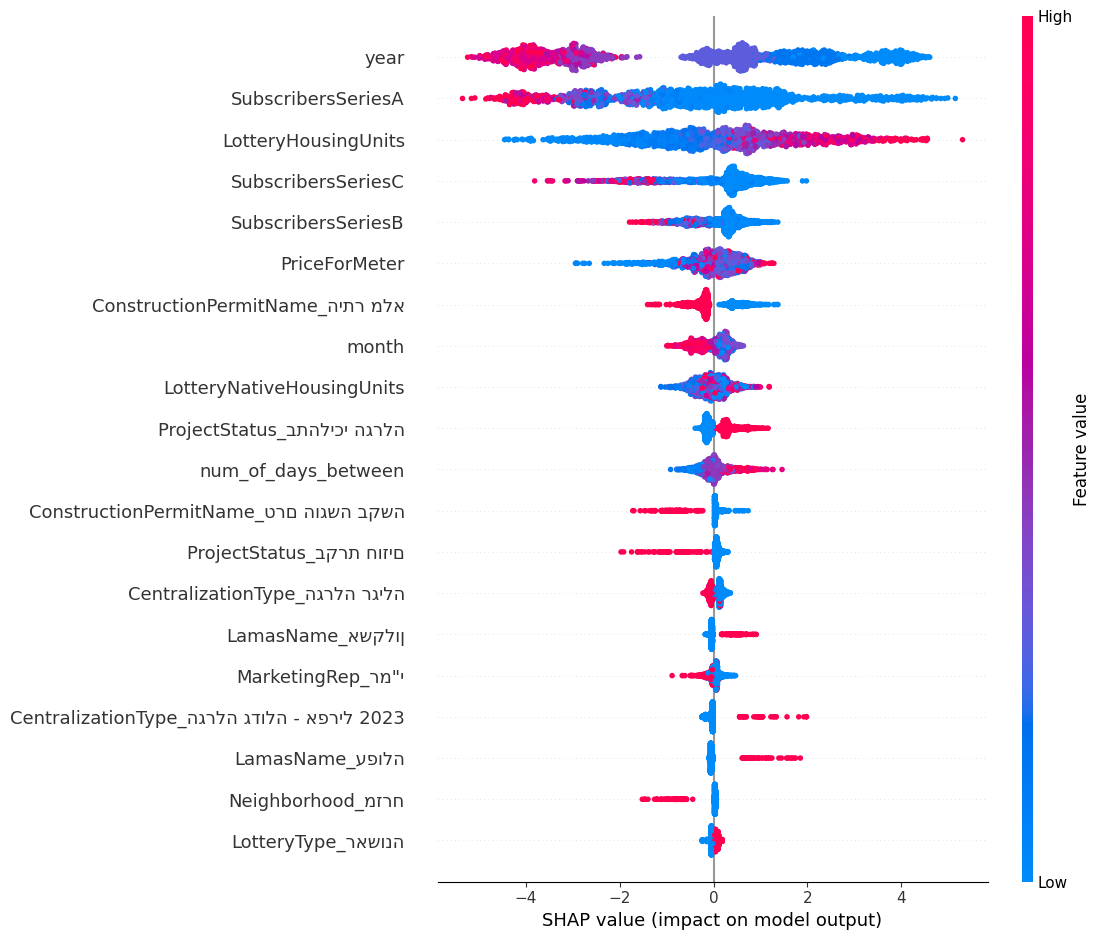

In [138]:
explain_model_with_shap(model,X_df)

### הסבר על הגרף 

הגרף מציג את מידת ההשפעה של כל פיצר על ערך החיזוי
ראשית כל שורה מדברת על פיצר מסויים
כל נקודה מדברת על דגימה מסויימת
צבע הנקודה מצביע על ערך הפיצר (לדוגמא במשתנים קטגוריאלים אדום זה 1 וכחול זה 0)
המיקום על ציר האיקס מצביע על כמה זה תרם לגדילה (בכיוון ימין) או לדעיכה (בכיוון שמאל) של ערך החיזוי.
לדוגמא אפשר לראות מהגרף שהשנה משפיעה ביחס הפוך על הסיכוי שישארו דירות ריקות-זאת אומרת שככל שערך הפיצר גדול יותר (אדום) כך הסיכוי שישארו דירות ריקות קטן יותר

# Clustering

## feature engeneering for the clustering

In [145]:
no_outliers.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners', 'SubscribersSeriesC',
       'SubscribersSeriesB', 'SubscribersSeriesA', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep', 'MarketingMethod',
       'CentralizationType', 'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate', 'days_since_end'],
      dtype='object')

In [146]:
new_data=no_outliers

In [147]:
# המרת העמודה 'LotteryExecutionDate' לפורמט תאריך
new_data['LotteryExecutionDate'] = pd.to_datetime(new_data['LotteryExecutionDate'])

# קביעת תאריך ההגרלה האחרון
end_date = new_data['LotteryExecutionDate'].max()
# חישוב הימים מאז ההגרלה האחרונה
new_data['days_since_end'] = (end_date - new_data['LotteryExecutionDate']).dt.days

In [151]:
new_data=new_data.drop(['LotteryExecutionDate','LotteryEndSignupDate'],axis=1)

In [152]:
new_data.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners', 'SubscribersSeriesC',
       'SubscribersSeriesB', 'SubscribersSeriesA', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ProjectStatus', 'ProjectName', 'LamasName',
       'LamasCode', 'LotteryStatusValue', 'Eligibility', 'MarketingRep',
       'MarketingMethod', 'LotteryType', 'num_of_days_between',
       'OversubscriptionRate', 'days_since_end'],
      dtype='object')

non importent columns for the clustering

In [149]:
new_data=new_data.drop(['LotteryId','Neighborhood','ProjectId','ProviderName','ConstructionPermitName','CentralizationType'],axis=1)

In [153]:
# 1. Encoding לנתונים קטגוריאליים
encoded_data = pd.get_dummies(new_data)

# 2. נרמול הנתונים
scaler = StandardScaler()
normalized_data = scaler.fit_transform(encoded_data)

visualization with T-sne

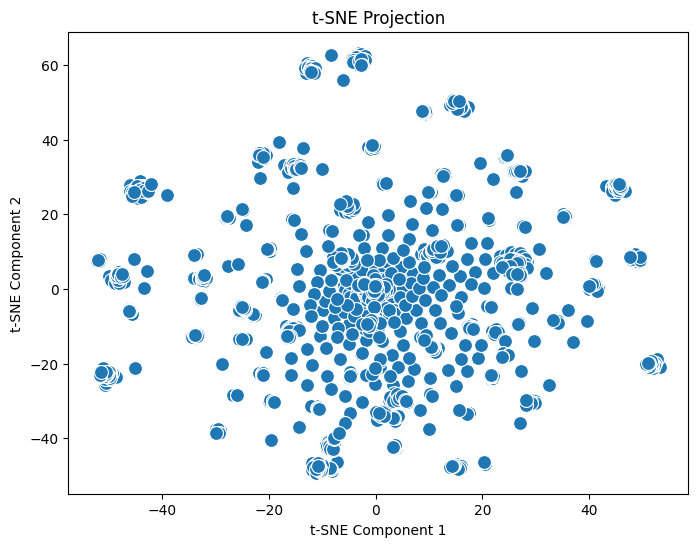

In [154]:
# 1. t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(normalized_data)

# 2. גרף תוצאות
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], s=100)
plt.title("t-SNE Projection")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


## The models we will compare is K-Means,GaussianMixture,AgglomerativeClustering,Birch

### for each algoritm we will find the optimal parameters and will run the algoritm with the optimal parameters

### compering the models:

Best parameters for KMeans: {'n_clusters': 2}
Best parameters for Gaussian Mixture: {'n_components': 2}
Best parameters for Agglomerative Clustering: {'n_clusters': 2}
Best parameters for birch: {'n_clusters': 2}


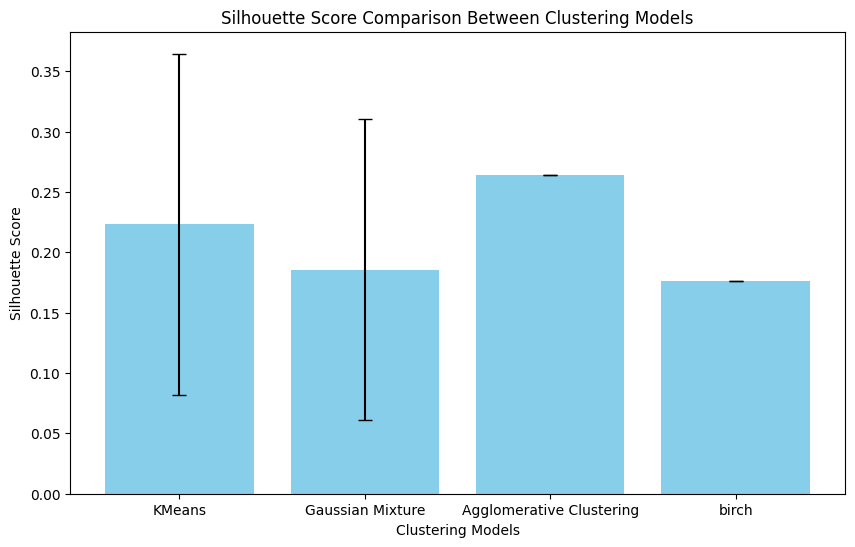

The best model is Agglomerative Clustering with score: 0.2642598917916716
Best parameters: {'n_clusters': 2}


In [155]:
# פרמטרים אופטימליים עבור כל מודל, נבצע חיפוש פרמטרים על מנת למצוא את הטובים ביותר
optimal_params = {
    "KMeans": {"n_clusters": [2, 3, 4, 5, 6]},  
    "Gaussian Mixture": {"n_components": [2, 3, 4, 5]},  
    "Agglomerative Clustering": {"n_clusters": [2, 3, 4, 5, 6]},  
    "birch": {"n_clusters": [2, 3, 4, 5]}  
}

# מודלים להשוואה
models = {
    "KMeans": KMeans(),
    "Gaussian Mixture": GaussianMixture(),
    "Agglomerative Clustering": AgglomerativeClustering(),
    "birch": Birch()
}

# הגדרת פונקציית Scorer לחישוב Silhouette Score
silhouette_scorer = make_scorer(silhouette_score, metric='euclidean')

# חישוב silhouette score לכל מודל עם הרצה מספר פעמים
sil_scores = {}
sil_mean = {}
sil_std = {}

best_model = None
best_model_name = None
best_params = None
best_score = -1  # נתחיל עם ערך קטן כדי למצוא את המודל הכי טוב

for model_name, model in models.items():
    # ביצוע חיפוש פרמטרים אופטימליים
    grid_search = GridSearchCV(model, optimal_params[model_name], cv=3, scoring=silhouette_scorer)
    grid_search.fit(normalized_data)
    
    best_model_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_model_params}")
    
    # הגדרת המודל עם הפרמטרים האופטימליים
    model.set_params(**best_model_params)

    # הרצת המודל מספר פעמים ושמירת ה-Silhouette Score
    scores = []
    for _ in range(10):  # הרצה 10 פעמים
        labels = model.fit_predict(normalized_data)
        score = silhouette_score(normalized_data, labels)
        scores.append(score)

    sil_scores[model_name] = scores
    sil_mean[model_name] = np.mean(scores)
    sil_std[model_name] = np.std(scores)

    # בדיקת המודל עם ה-Silhouette Score הכי גבוה
    if sil_mean[model_name] > best_score:
        best_score = sil_mean[model_name]
        best_model = model
        best_model_name = model_name
        best_params = best_model_params

# הצגת התוצאות בגרף
plt.figure(figsize=(10, 6))

# ציור התוצאות עבור כל המודלים
for model_name, mean_score in sil_mean.items():
    plt.bar(model_name, mean_score, yerr=sil_std[model_name], color='skyblue', capsize=5)

plt.title("Silhouette Score Comparison Between Clustering Models")
plt.xlabel("Clustering Models")
plt.ylabel("Silhouette Score")
plt.show()

# הצגת המודל הכי טוב
print(f"The best model is {best_model_name} with score: {best_score}")
print(f"Best parameters: {best_params}")



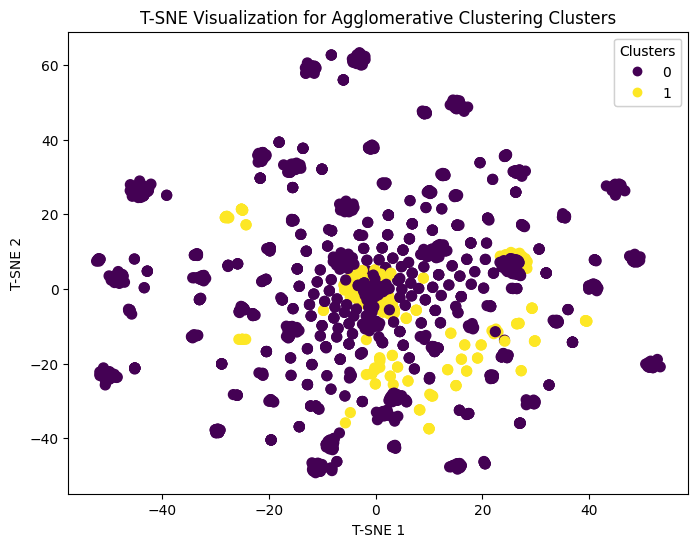

In [156]:
import matplotlib.colors as mcolors
# נניח שכבר יש לך את המודל הכי טוב עם הפרמטרים הכי טובים
# (best_model, best_model_name, best_params, best_score)

# הרצת המודל עם הנתונים הנורמליים
labels = best_model.fit_predict(normalized_data)

# הפחתת ממדים באמצעות T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(normalized_data)

# יצירת גרף T-SNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=50)

# הוספת כותרת ותגיות לצירים
plt.title(f"T-SNE Visualization for {best_model_name} Clusters")
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")

# הצגת מקרא עם צבעים המתאימים לכל קלאסטר
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)


# הקצאת הצבעים לקטגוריות
unique_labels = np.unique(labels)
cmap = plt.cm.viridis  # השתמש ב-colormap שאתה משתמש בו ב-T-SNE

# שמירה על הצבעים שמוקצים לכל קלאסטר
colors = [cmap(label / len(unique_labels)) for label in unique_labels]

# המרת הצבעים לערכים HEX
hex_colors = [mcolors.rgb2hex(color) for color in colors]


# הצגת הגרף
plt.show()



### feature importence on the clustering

In [157]:
normalized_df = pd.DataFrame(normalized_data, columns=encoded_data.columns)

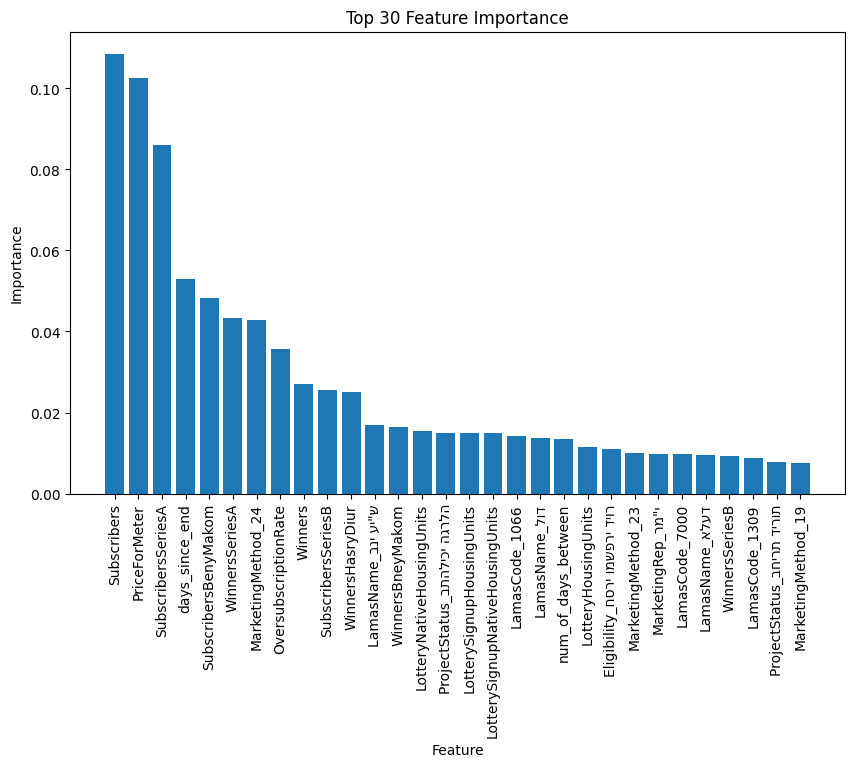

In [158]:
# שימוש ב-Random Forest כדי לחשב את ה-feature importance
X = normalized_df  # הנתונים שלך
y = labels  # הקלאסטרים שהתקבלו

# חצי מהנתונים לאימון וחצי לבדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# אימון המודל
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# הוצאת ה-feature importance
importances = rf.feature_importances_

# סדר את התכונות לפי החשיבות
indices = importances.argsort()[::-1]

# הצגת ה-10 פיצ'רים הכי משפיעים
top_n = 30
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importance")
plt.bar(range(top_n), importances[indices][:top_n], align="center")
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


נתמקד בהשוואות סטטיסטיות בין ה4 פיצרים הכי משפיעים על החלוקה על מנת להציג תובנות משום שהם הכי משפיעים בפער


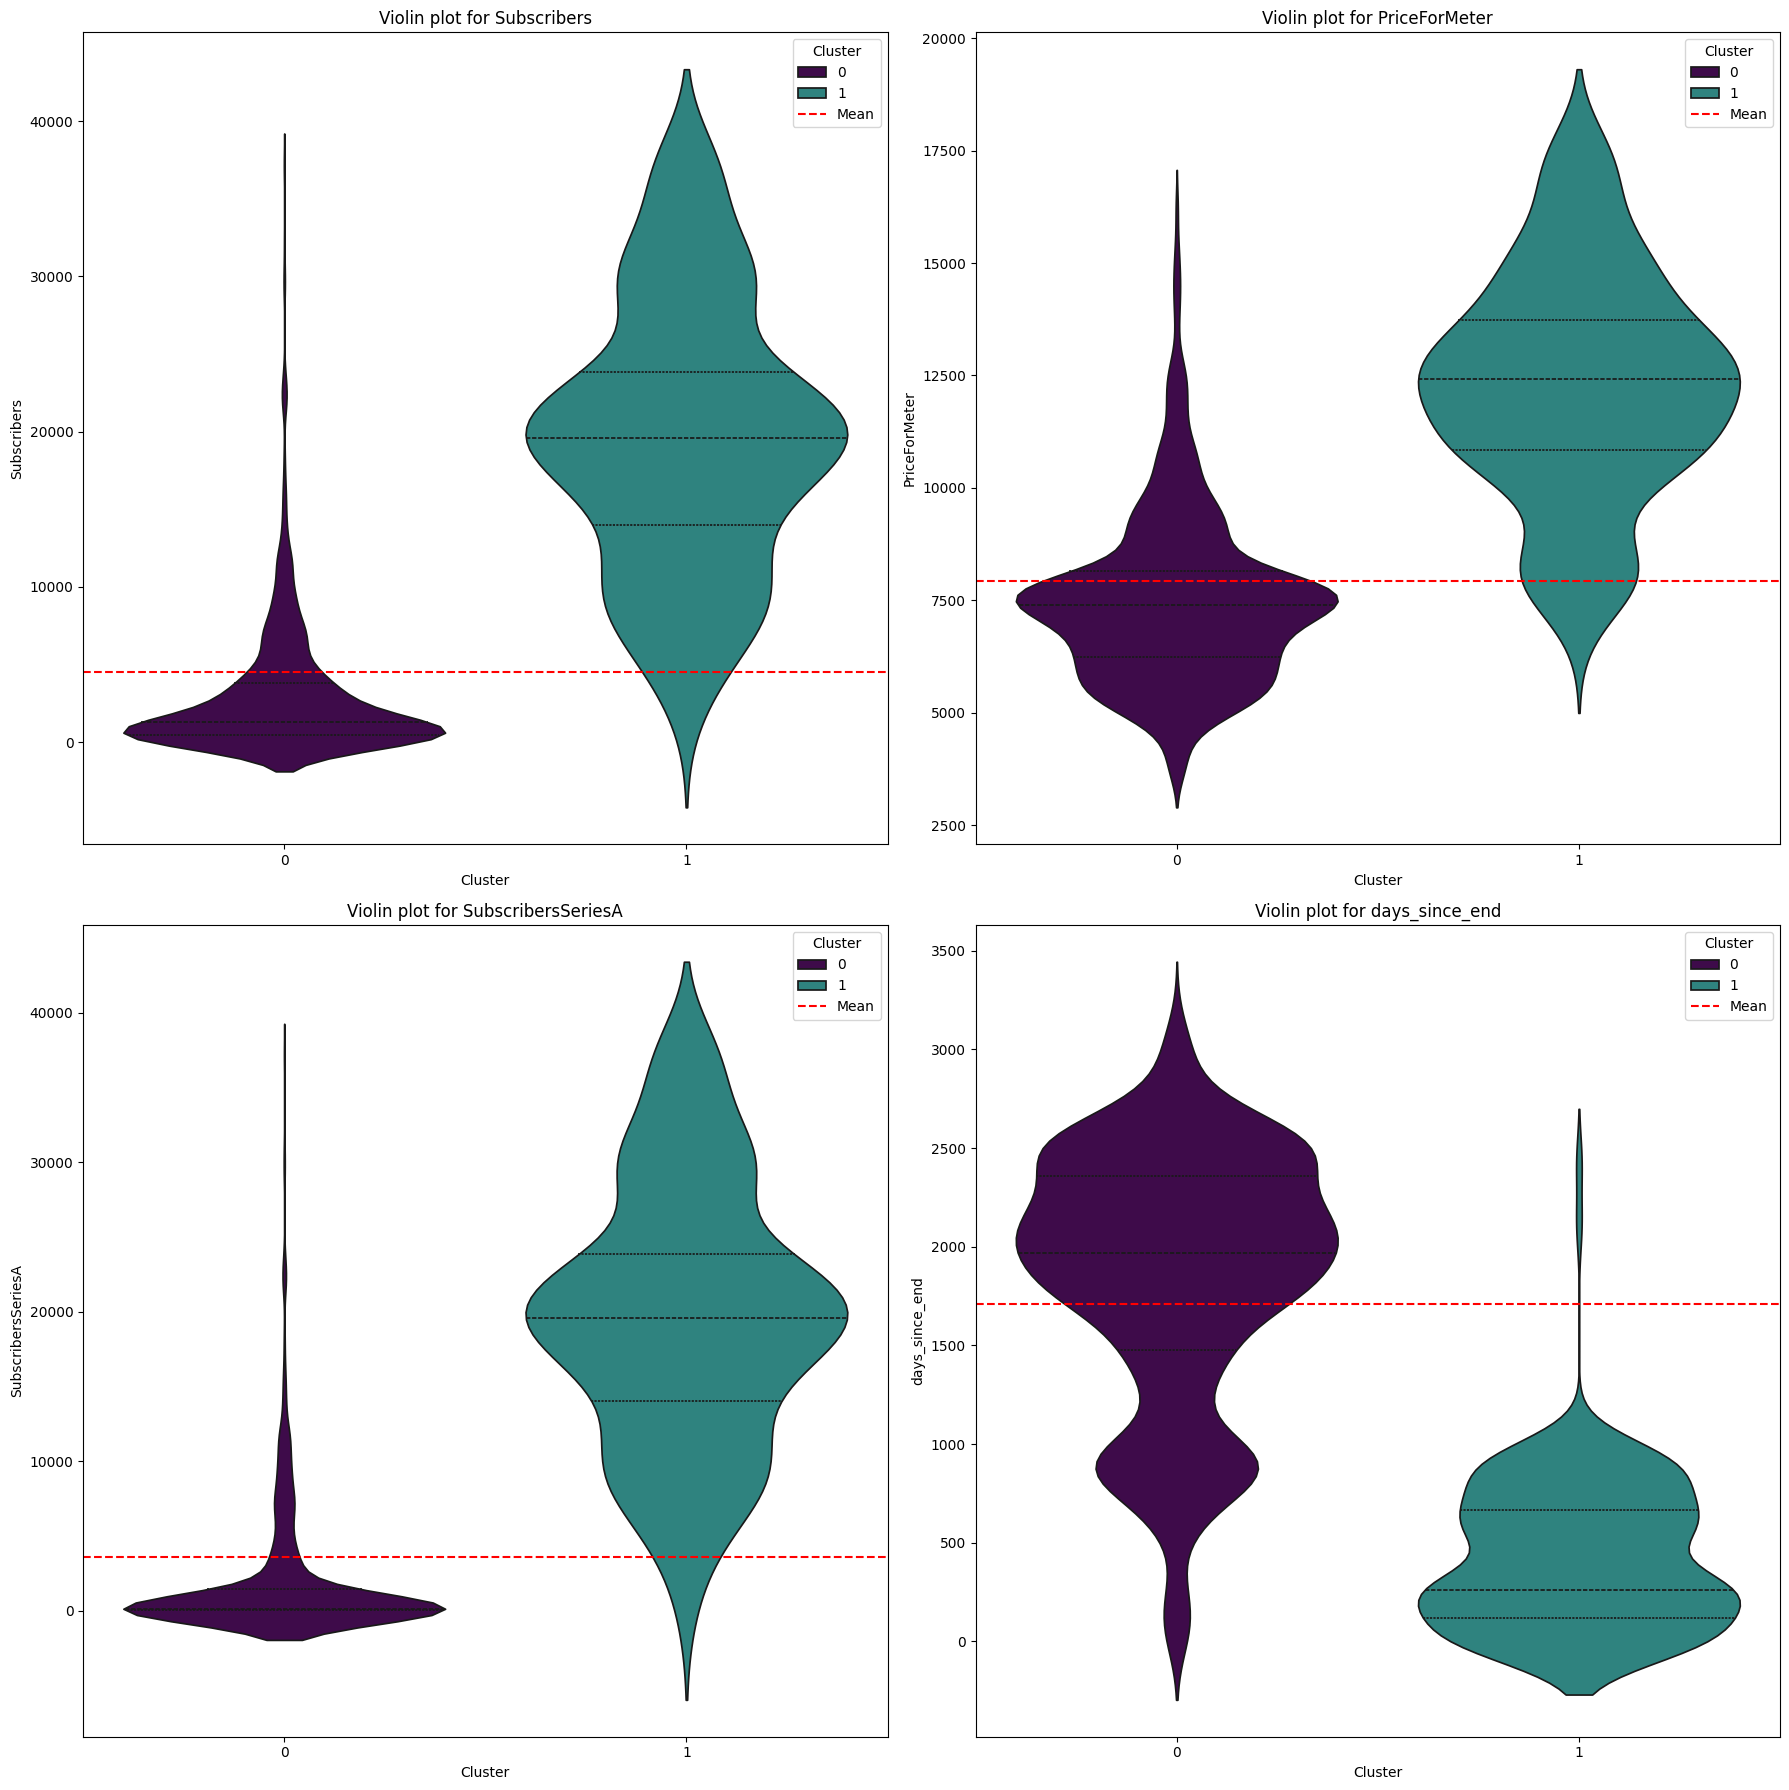

In [159]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE

# נניח ש-`labels` הם הקלאסטרים ו-`tsne_results` הם תוצאות ה-T-SNE
# הקצאת הצבעים לקלאסטרים
unique_labels = np.unique(labels)
cmap = plt.cm.viridis  # השתמש ב-colormap שאתה משתמש בו ב-T-SNE

# שמירה על הצבעים המוקצים לכל קלאסטר
colors = [cmap(label / len(unique_labels)) for label in unique_labels]

# המרת הצבעים לערכים HEX
hex_colors = [mcolors.rgb2hex(color) for color in colors]

# עכשיו תוכל להשתמש ב-hex_colors בגרפים שלך
# בחר את 4 הפיצ'רים הכי חשובים
top_features = [X.columns[i] for i in indices[:4]]

# הגדרת גרפים
plt.figure(figsize=(18, 18))

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    
    # אם הפיצ'ר הוא בינארי, השתמש בקאונטפלוט
    if encoded_data[feature].nunique() == 2:  # בודק אם הפיצ'ר הוא בינארי
        ax = sns.countplot(x=encoded_data[feature], hue=labels, palette=hex_colors)
        plt.title(f'Count plot for {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Count')
    
    # אם הפיצ'ר הוא מספרי, השתמש בויולין
    else:
        ax = sns.violinplot(x=labels, y=encoded_data[feature], inner="quart", hue=labels, 
                            palette=hex_colors)
        plt.axhline(encoded_data[feature].mean(), color='r', linestyle='--', label="Mean")
        plt.title(f'Violin plot for {feature}')
        plt.xlabel("Cluster")
        plt.ylabel(f'{feature}')
    
    # הוספת קלאסטרים ללגנד
    plt.legend(title="Cluster")

plt.tight_layout()
plt.show()




## T-test for the most importent features:

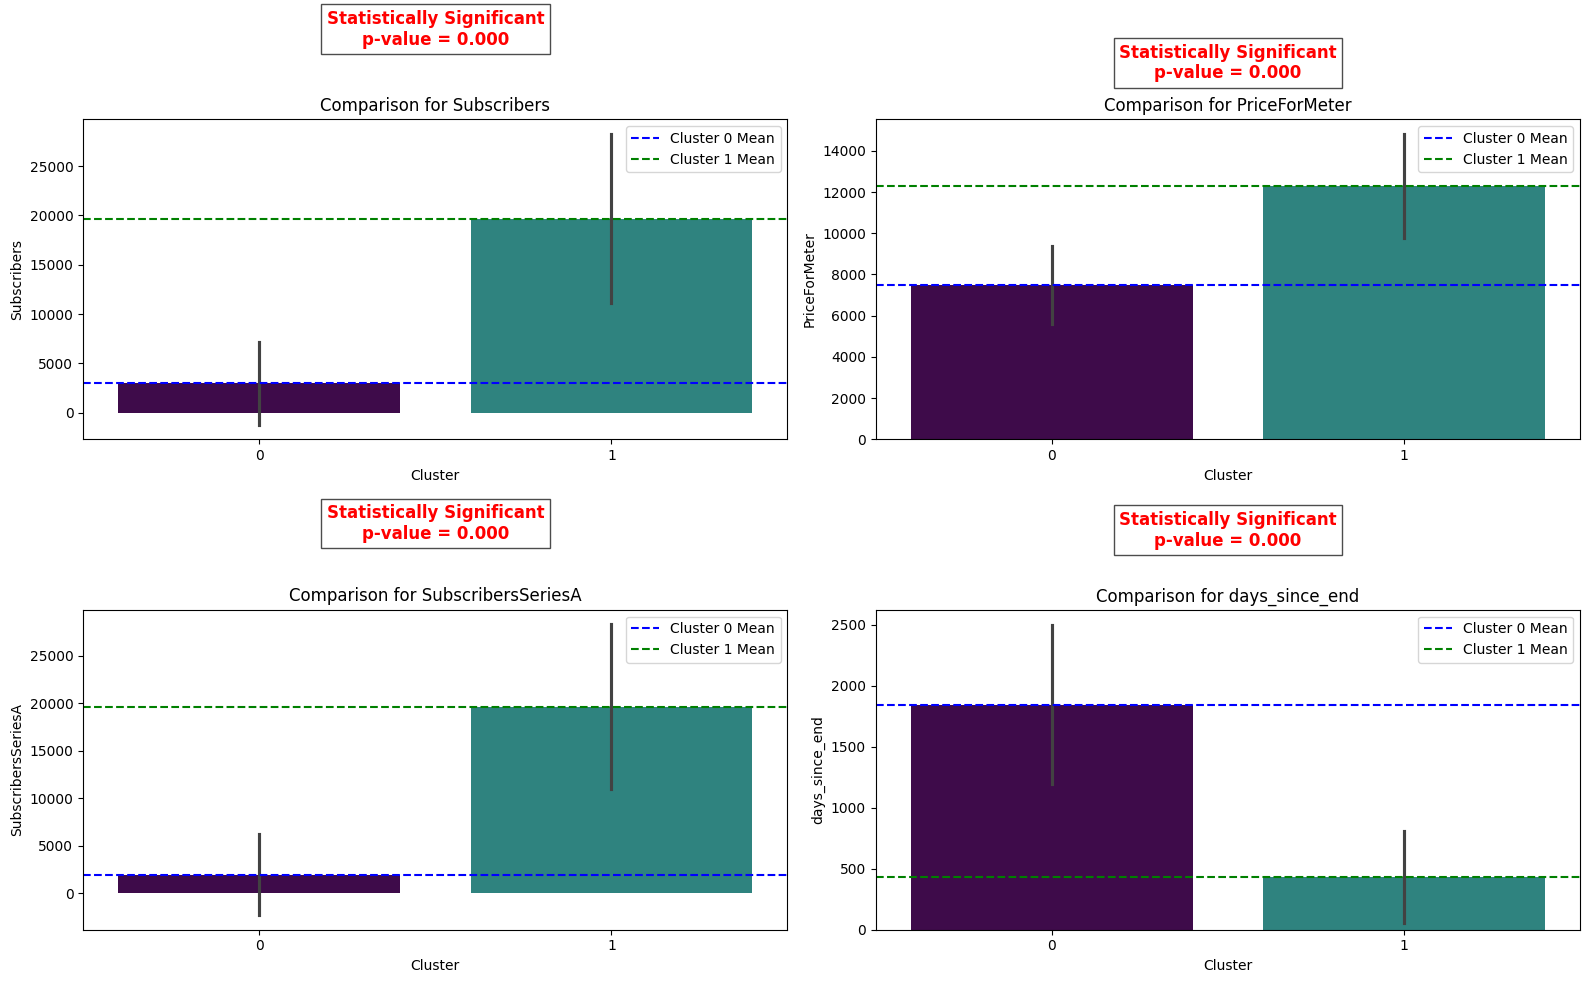

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# בחר את 4 הפיצ'רים הכי חשובים
top_features = [X.columns[i] for i in indices[:4]]

# יצירת רשימה לשמירת התוצאות של ה-T-test
ttest_results = {}

# יצירת גרף ברור
plt.figure(figsize=(16, 10))

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    
    # חישוב ה-T-test עבור שני קלאסטרים
    cluster_0_data = encoded_data[labels == 0][feature]
    cluster_1_data = encoded_data[labels == 1][feature]
    
    # חישוב ה-T-test בין קלאסטר 0 ו-1
    t_stat, p_value = stats.ttest_ind(cluster_0_data, cluster_1_data)
    
    # שמירת התוצאות
    ttest_results[feature] = {'t-statistic': t_stat, 'p-value': p_value}
    
    # יצירת barplot של הממוצעים בקלאסטרים
    sns.barplot(x=labels, y=encoded_data[feature], ci="sd", palette=hex_colors)
    
    # הוספת קו הממוצע של כל קלאסטר
    plt.axhline(cluster_0_data.mean(), color='blue', linestyle='--', label=f"Cluster 0 Mean")
    plt.axhline(cluster_1_data.mean(), color='green', linestyle='--', label=f"Cluster 1 Mean")
    
    # הוספת כותרת ותגיות
    plt.title(f'Comparison for {feature}')
    plt.xlabel("Cluster")
    plt.ylabel(f'{feature}')
    
    # הוספת מובהקות סטטיסטית אם p-value נמוך מ-0.05
    if p_value < 0.05:
        plt.text(0.5, max(encoded_data[feature]), f'Statistically Significant\np-value = {p_value:.3f}', 
                 ha='center', color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))

    # הצגת תוצאות המובהקות בגרף
    plt.legend()

plt.tight_layout()
plt.show()





## :תובנות ומסקנות

קודם כל ניתן לראות שאכן עבור הפיצרים הכי משפיעים יש הבדל סטטיסטי מובהק בממוצעים בין שני הקלאסטריים שלנו

קלאסטר 0: מדובר בקלאסטר של הגרלות פחות עדכניות אשר כמות הרשומים אליהן הייתה נמוכה ביחס להגרלות היותר עדכניות. הגרלות אלה מאופיינות גם במחירים זולים משמעותית ביחס להגרלות של הקלאסטר השני

קלאסטר 1: מדובר בהגרלות יחסית עדכניות שבוצעו אשר מחירם גבוה ביחס לקלאסטר 0 וכמות הנרשמים גבוהה משמעותית מהקלאסטר השני

קלאסטר 0:הגרלות ישנות וזולות שכמות הנרשמים אליה קטנה
קלאסטר 1: הגרלות עדכניות ויקרות שכמות הנרשמים אליהן גבוהה